# Avocado Prices Dataset

Èric Sánchez López <br>
1523259

## Introducció

Els alvocats són un aliment molt popularitzat els últims anys a tot arreu del món. L'anomenat or verd conté molts nutrients i d'altres beneficis per la salut, el que l'ha fet una fruita indispensable a tot tipus de cuines, des de les veganes fins en forma de guacamole pels natxos. <br><br>
Aquesta base de dades registra les vendes d'alvocats durant 4 anys (2015-2018) de diversos tipus a múltiples regions dels EEUU, amb la quantitat, el format de venda i el preu, entre d'altres. L'objectiu d'aquest estudi serà entendre com ha evolucionat el preu al llarg del temps en funció de les features.<br><br>
Les features són les següents:
 - Index: nombre del 0 al 52, no s'explica el significat *(int)*
 - Date: data de l'observació *(date)*
 - Total Volume: quantitat total d'alvocats venuts *(float)*
 - 4046: nombre total d'alvocats amb codi 4046 venuts *(float)*
 - 4225: nombre total d'alvocats amb codi 4225 venuts *(float)*
 - 4770: nombre total d'alvocats amb codi 4770 venuts *(float)*
 - Total Bags: nombre total de bosses venudes *(float)*
 - Small Bags: nombre de bosses petites venudes *(float)*
 - Large Bags: nombre de bosses grans venudes *(float)*
 - XLarge Bags: nombre de bosses molt grans venudes *(float)*
 - Type: tipus (organic o conventional) (str)
 - Year: any de la venda *(int)*
 - Region: ciutat o regió de la venda *(str)*
 - <font color=blue>**AveragePrice: preu mitjà de venta dels alvocats** ***(int)***</font>

### Objectiu

Predir la **mitjana del preu de venta dels alvocats en funció del tipus** a partir de l'entrenament amb les dades dels anys anteriors. Per dur a terme aquesta tasca estudiarem les relacions entre les variables i les tendències temporals.

### Imports

In [1]:
import warnings
warnings.simplefilter('always', category=UserWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import tqdm
import matplotlib.colors as mc
from matplotlib.cm import ScalarMappable
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Observacions prèvies

Es poden observar alguns valors estranys, com el fet que la quantitat d'alvocats venuts sigui decimal, que el volum total no correspongui a la suma dels alvocats venuts o que el total de bosses no sempre sigui la suma de les tres bosses.<br>

In [2]:
data = pd.read_csv('avocado.csv')

data.head(10)

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   
5           5  2015-11-22          1.26      55979.78  1184.27   48067.99   
6           6  2015-11-15          0.99      83453.76  1368.92   73672.72   
7           7  2015-11-08          0.98     109428.33   703.75  101815.36   
8           8  2015-11-01          1.02      99811.42  1022.15   87315.57   
9           9  2015-10-25          1.07      74338.76   842.40   64757.44   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   
5   43.61     6683.91     6556.47      127.44          0.0  conventional   
6   93.26     8318.86     8196.81      122.05          0.0  conventional   
7   80.00     6829.22     6266.85      562.37          0.0  conventional   
8   85.34    11388.36    11104.53      283.83          0.0  conventional   
9  113.00     8625.92     8061.47      564.45          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany  
5  2015  Albany  
6  2015  Albany  
7  2015  Albany  
8  2015  Albany  
9  2015  Albany

In [3]:
# La suma d'alvocats no correspon amb el total

pd.concat([pd.DataFrame(data['Total Volume']), pd.DataFrame(data['4046'] + data['4225'] + data['4770'])], axis=1).head(10)

Total Volume          0
0      64236.62   55539.75
1      54876.98   45371.42
2     118220.22  110074.87
3      78992.15   73180.99
4      51039.60   44855.65
5      55979.78   49295.87
6      83453.76   75134.90
7     109428.33  102599.11
8      99811.42   88423.06
9      74338.76   65712.84

<AxesSubplot:ylabel='count'>

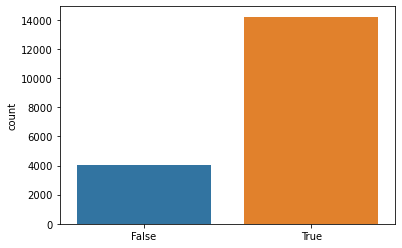

In [4]:
# La suma de bosses no sempre correspon amb el total

bags_sum = data['Small Bags'] + data['Large Bags'] + data['XLarge Bags']
coincidencies = list(data['Total Bags'] == bags_sum)

sns.countplot(x=coincidencies)

En un cas real s'hauria de consultar al creador del dataset i preguntar sobre aquests casos per interpretar el que volen dir realment i saber d'on poden haver sorgit aquests errors. En aquest cas, però, no tenim accés a aquestes explicacions, en canvi a l'apartat de discussions d'aquest dataset a Kaggle hi ha un usuari anomenat Pedro Israel que ha netejat les dades per tal que aquestes tinguin sentit. D'aquesta manera ha creat un nou dataset, més coherent i interpretable.<br>

El <a href="https://www.kaggle.com/datasets/pedroisrael/avocado-sales" >nou dataset</a> ha realitzat els següents canvis al dataset original:
 - Ha canviat a enters totes les quantitats enumeratives, com la quantitat de bosses o alvocats
 - Ha recalculat les columnes dels totals per a que coincidissin amb la suma de les corresponents columnes
 - Ha eliminat les regions "totals" (aquelles que feien recomptes agrupant diverses regions)
 - Ha eliminat els estats, només hi ha ciutats (per tal que les files siguin independents)
 - Ha renombrat les ciutats introduint espais
 
El dataset resultant té un 18% menys de files.

In [5]:
data_clean = pd.read_csv('avocado_clean.csv')

data_clean.head(10)

Sale ID                 Date AveragePrice  Total Avocados  Small 4046  \
0        1  2017-03-05 00:00:00        $0.44            4973         224   
1        1  2017-02-05 00:00:00        $0.46         1750185     1200633   
2        1  2017-03-05 00:00:00        $0.48            4857         718   
3        1  2017-02-26 00:00:00        $0.49            4726         253   
4        1  2015-12-27 00:00:00        $0.49         1036815      738315   
5        1  2017-02-19 00:00:00        $0.51            5959         225   
6        1  2017-01-01 00:00:00        $0.51         1281938      985040   
7        1  2017-03-05 00:00:00        $0.51            2272         482   
8        1  2015-04-19 00:00:00        $0.51         1269280     1097285   
9        1  2016-03-06 00:00:00        $0.51         1312113     1037699   

   Extra Large 4770  Large 4225  Total Bags  Small Bags  Large Bags  \
0                 0        4749       59085         639       58446   
1             18325      531227      450366      113752      330583   
2                 0        4139       46034        1385       44649   
3                 0        4473       39299         600       38699   
4             11642      286858      100892       70749       30143   
5                 0        5734       36028         474       35554   
6              6314      290584      193803       62497      131306   
7                 0        1790       14864         123       14741   
8              7534      164461       97565       44647       52918   
9             14567      259847      130860       76814       54046   

   XLarge Bags          type             Cities  
0            0       organic  Cincinnati Dayton  
1         6031  conventional     Phoenix Tucson  
2            0       organic            Detroit  
3            0       organic  Cincinnati Dayton  
4            0  conventional     Phoenix Tucson  
5            0       organic  Cincinnati Dayton  
6            0  conventional            Houston  
7            0       organic          Nashville  
8            0  conventional     Phoenix Tucson  
9            0  conventional     Phoenix Tucson

In [6]:
data_clean.shape

(14869, 13)

### Nou dataset

Amb els canvis esmentats els atributs del nou dataset són els següents:
 - Sale ID: variable originada per l'original Index, no té sentit, només pren el valor 1 (prescindirem d'ella)
 - Date: dia de la venda *(str)*
 - Total Avocados: quantitat total venuda *(int)*
 - Small 4046: quantital d'alvocats petits 4046 venuts *(int)*
 - Large 4225: quantital d'alvocats grans 4225 venuts *(int)*
 - Extra Large 4770: quantital d'alvocats extra grans 4770 venuts *(int)*
 - Total Bags: quantitat total de bosses d'alvocats venudes *(int)*
 - Small Bags: quantitat de bosses d'alvocats petits venudes *(int)*
 - Large Bags: quantitat de bosses d'alvocats grans venudes *(int)* 
 - XLarge Bags: quantitat de bosses d'alvocats extra grans venudes *(int)*
 - type: tipus d'alvocat *(str)*
 - Cities: ciutats nord-americanes on es produeix la venta *(str)*
 - <font color='blue'>**AveragePrice: preu de venta mitjà per alvocat en format '$xx.xx'** ***(str)***</font>

In [7]:
# Mostrem com la variable Sale ID és 1 per totes les mostres

set(data_clean['Sale ID'])

{1}

---

## Preprocessing

D'acord amb el tipus de variables hem de fer alguns canvis abans de poder treballar amb les dades. Primerament s'ha de canviar el format de la variable ``AveragePrice`` per tal que sigui un float. Per la variable ``type`` s'hauria de fer una dummy variable, ja que només té dos estats, organic o conventional. I finalment eliminar la columna ``Sale ID`` i fer feature engineering amb ``Date``. La variable ``Cities`` es pot canviar de diverses maneres en funció del que volguem veure, per exemple es podria fer mean encoding si el que ens interessa només és predir el cost, es podria estudiar cadascuna de les 44 ciutats per separat i comparar els seus canvis... Un cop estudiat millor el dataset ja es decidirà què és el més adient.

In [8]:
# Canviem el format del preu a float 

data_clean['AveragePrice'] = list(map(lambda x: float(x[1:]), data_clean['AveragePrice']))

In [9]:
# Creem la dummy variable organic: 1 -> organic; 0 -> conventional

type_dummies = pd.get_dummies(data_clean['type'])
data_clean['organic'] = type_dummies['organic']

# Eliminem les variables que ja no serveixen

data_clean.drop(['type', 'Sale ID'], axis=1, inplace=True)

In [10]:
# Feature engineering amb la variable Date
# 
# Canviem el format per poder treballar millor
# Creem una variable amb el dia de la setmana (el dia de venta podria influir en el preu)
# Creem una variable binària que indica si és temporada d'alvocats o no (d'abril a setembre)

data_clean['Date'] = list(map(lambda x: pd.Timestamp(x), data_clean['Date']))
data_clean['Weekday'] = list(map(lambda x: x.day_name(), data_clean['Date']))
data_clean['Season'] = list(map(lambda x: 1 if (x.month > 3) and (x.month < 10) else 0, data_clean['Date']))

In [11]:
set(data_clean['Weekday'])

{'Sunday'}

Podem veure com la totalitat de les dades es recullen els diumenges, per tant ara sabem que corresponen a les ventes setmanals a cada ciutat i no pas diària. La variable ``Weekday`` ja no ens serà de més utilitat.

In [12]:
data_clean.drop('Weekday', axis=1, inplace=True)

### Valors buits

Abans de començar la EDA ens assegurem que el dataset estigui complet

In [13]:
# Comprovem si hi ha nulls

data_clean.isnull().sum()

Date                0
AveragePrice        0
Total Avocados      0
Small 4046          0
Extra Large 4770    0
Large 4225          0
Total Bags          0
Small Bags          0
Large Bags          0
XLarge Bags         0
Cities              0
organic             0
Season              0
dtype: int64

Afortunadament el dataset està compert.

### Outliers

També és important veure que els valors que hi surten son coherents, per això cal buscar si existeixen outliers i què podem fer amb aquests.

In [14]:
# Busquem outliers a cada atribut que en pugui tenir

cols = ['AveragePrice','Total Avocados','Small 4046','Extra Large 4770',
        'Large 4225','Total Bags','Small Bags','Large Bags','XLarge Bags']
weak_outliers = dict()
strong_outliers = dict()

for feat in cols:
    Q1,Q3 = np.percentile(data_clean[feat], [25,75])
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR
    weak_outliers[feat] = [len(data_clean[feat][(data_clean[feat] > ul) | (data_clean[feat] < ll)].values), ll, ul]
    ul = Q3+3*IQR
    ll = Q1-3*IQR
    strong_outliers[feat] = [len(data_clean[feat][(data_clean[feat] > ul) | (data_clean[feat] < ll)].values), ll, ul]
print("Weak outliers:", weak_outliers, "\n")
print("Strong outliers:", strong_outliers)

Weak outliers: {'AveragePrice': [172, 0.23000000000000032, 2.55], 'Total Avocados': [1505, -314087.5, 533204.5], 'Small 4046': [1624, -109484.0, 183916.0], 'Extra Large 4770': [2635, -4900.5, 8167.5], 'Large 4225': [1782, -142186.0, 242502.0], 'Total Bags': [1326, -112913.0, 197639.0], 'Small Bags': [1109, -90581.5, 155758.5], 'Large Bags': [2264, -16148.0, 27020.0], 'XLarge Bags': [3328, -57.0, 95.0]} 

Strong outliers: {'AveragePrice': [0, -0.6399999999999995, 3.4199999999999995], 'Total Avocados': [651, -631822.0, 850939.0], 'Small 4046': [1079, -219509.0, 293941.0], 'Extra Large 4770': [2022, -9801.0, 13068.0], 'Large 4225': [965, -286444.0, 386760.0], 'Total Bags': [710, -229370.0, 314096.0], 'Small Bags': [610, -182959.0, 248136.0], 'Large Bags': [1549, -32336.0, 43208.0], 'XLarge Bags': [3090, -114.0, 152.0]}


El mètode IQR troba milers de possibles outliers, però aquests poden ser valors corresponents a compres molt grans i a preus molt elevats, fets completament raonables. Per aquesta raó provarem a visualitzar-ho.

<AxesSubplot:xlabel='AveragePrice', ylabel='organic'>

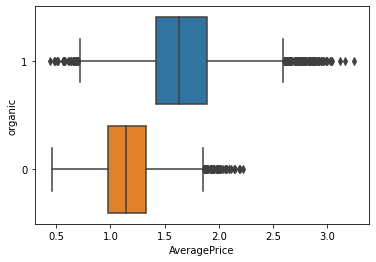

In [15]:
# Box plot del preu en funció del tipus

sns.boxplot(data=data_clean, x="AveragePrice", y="organic", order=[1,0] , orient="h")

Els valors semblen normals, no hi ha res que ens pugui semblar un error. Es pot observar que els valors més grans d'alvocat convencional segueixen dins del Q3 dels alvocats orgànics, el que ens demostra la diferència notable de preu entre ambdós tipus.

C:\Users\erics\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

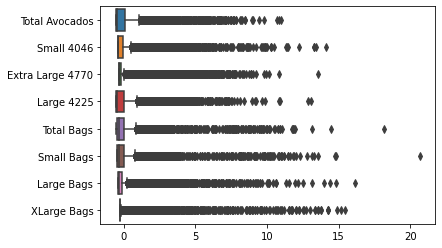

In [16]:
# Box plot de les variables numèriques normalitzades (per una millor representació)

cols = ['Total Avocados','Small 4046','Extra Large 4770','Large 4225','Total Bags','Small Bags','Large Bags','XLarge Bags']
data_norm = data_clean.copy()
data_norm[cols] = (data_norm[cols] - data_norm[cols].mean()) / data_norm[cols].std()

sns.boxplot(data=data_norm[cols], orient='h', dodge=False)

En aquesta segona gràfica veiem que existeixen centenars de valors molt més enllà del percentil 95 (1.96) que es poden considerar outliers molt forts (compres massives de restaurants o supermercats) que no expliquen el comportament habitual dels compradors i poden malmetre les prediccions dels models. Per aquesta raó limitarem el valor d'aquestes variables al percentil 95.

In [17]:
for feat in cols:
    P5, P95 = np.percentile(data_clean[feat], [5,95])
    print(P95, feat)
    data_clean.loc[data_clean[feat] > P95, feat] = P95
    data_clean.loc[data_clean[feat] < P5,  feat] = P5

802991.5999999999 Total Avocados
463308.9999999999 Small 4046
38362.799999999974 Extra Large 4770
438357.99999999965 Large 4225
306920.99999999994 Total Bags
208722.59999999971 Small Bags
82914.79999999999 Large Bags
4647.19999999999 XLarge Bags


C:\Users\erics\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

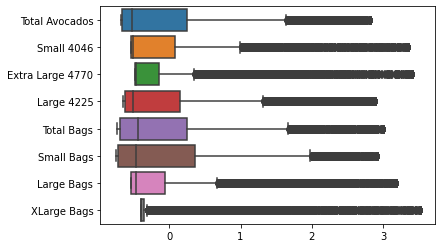

In [18]:
# Repetim el boxplot després de limitar els outliers

cols = ['Total Avocados','Small 4046','Extra Large 4770','Large 4225','Total Bags','Small Bags','Large Bags','XLarge Bags']
data_norm = data_clean.copy()
data_norm[cols] = (data_norm[cols] - data_norm[cols].mean()) / data_norm[cols].std()

sns.boxplot(data=data_norm[cols], orient='h', dodge=False)

Tot i que segueixin existint molts valors atípics aquests estan molt més limitats que abans i no ens duran tants problemes.

In [19]:
data_clean = data_clean.sort_values(by='Date')
data_clean.reset_index(inplace=True, drop=True)
data_clean

Date  AveragePrice  Total Avocados  Small 4046  Extra Large 4770  \
0     2015-01-04          1.49         16817.0      1189.0               0.0   
1     2015-01-04          1.05        269334.0      4967.0              15.0   
2     2015-01-04          1.05        154987.0     32680.0            1286.0   
3     2015-01-04          1.42         10124.0      3199.0               8.0   
4     2015-01-04          1.20        165422.0     53316.0           38362.8   
...          ...           ...             ...         ...               ...   
14864 2018-03-25          1.01        802991.6    198289.0            2203.0   
14865 2018-03-25          1.43          3417.0       687.0               0.0   
14866 2018-03-25          1.63           330.4        13.0               0.0   
14867 2018-03-25          1.82          3878.0      1426.0               0.0   
14868 2018-03-25          1.56          4412.0       469.0               0.0   

       Large 4225  Total Bags  Small Bags  Large Bags  XLarge Bags  \
0         15628.0       906.0       906.0         0.0          0.0   
1        264352.0     52490.0     52490.0         0.0          0.0   
2        121021.0     48953.0     47584.0      1369.0          0.0   
3          6917.0     12357.0      1077.0     11280.0          0.0   
4         72178.0     55664.0     44041.0     11623.0          0.0   
...           ...         ...         ...         ...          ...   
14864    438358.0    106985.0    103034.0       186.0       3765.0   
14865      2730.0     16887.0     13920.0      2967.0          0.0   
14866       258.0     22329.0     22329.0         0.0          0.0   
14867      2452.0      4332.0      3428.0       904.0          0.0   
14868      3943.0     14305.0      9398.0      4907.0          0.0   

                     Cities  organic  Season  
0                   Chicago        1       0  
1      Northern New England        0       0  
2       Harrisburg Scranton        0       0  
3                    Denver        1       0  
4        Raleigh Greensboro        0       0  
...                     ...      ...     ...  
14864         San Francisco        0       0  
14865               Detroit        1       0  
14866  Northern New England        1       0  
14867              St Louis        1       0  
14868               Atlanta        1       0  

[14869 rows x 13 columns]

---

## EDA

Comencem a visualitzar com es distribueixen les dades i com es relacionen les variables amb diverses gràfiques.

## Balanceig

Mirem com de balancejades estan les variables categòriques. En el nostre cas no cal fer la mateixa comprovació amb la variable resultat ja que és continua: tenim un problema de regressió.

<AxesSubplot:xlabel='Cities', ylabel='Count'>

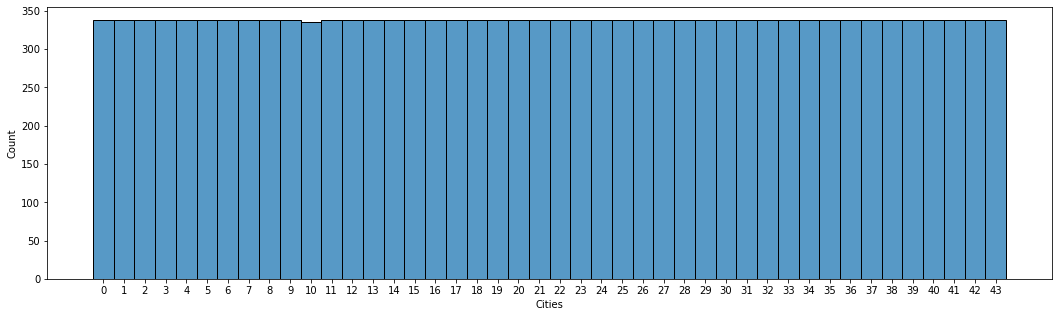

In [20]:
# Quantes mostres hi ha de cada ciutat

fig, ax = plt.subplots(figsize=(18,5)) 
g = sns.histplot(data_clean['Cities'], ax=ax)
g.set_xticks(range(len(np.unique(data_clean['Cities']))))
g.set_xticklabels(range(len(np.unique(data_clean['Cities']))))
g

<AxesSubplot:xlabel='organic', ylabel='Count'>

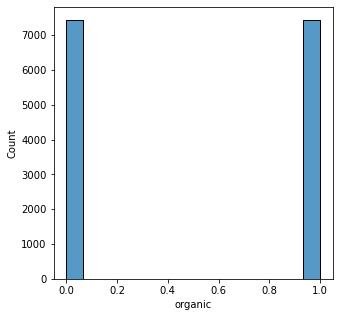

In [21]:
# Quantes mostres hi ha de cada tipus d'alvocat

fig, ax = plt.subplots(figsize=(5,5)) 
sns.histplot(data_clean['organic'], ax=ax)

Les variables categòriques estan perfectament balancejades, no tindrem problemes de biaix en aquest sentit.

### Correlacions

Gràfiques multivariables per veure relacions entre features.

#### Heatmap

<AxesSubplot:>

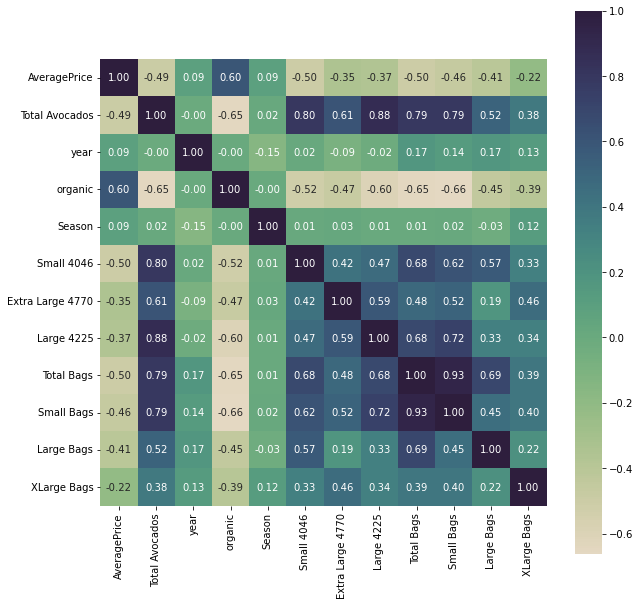

In [22]:
data_clean['year'] = list(map(lambda x: x.year, data_clean['Date']))
fig, ax = plt.subplots(figsize=(10,10)) 
cols = ['AveragePrice','Total Avocados','year','organic',
        'Season','Small 4046','Extra Large 4770','Large 4225','Total Bags','Small Bags','Large Bags','XLarge Bags']
sns.heatmap(np.corrcoef(data_clean[cols].values.T), annot=True, ax=ax, 
            cmap=sns.cubehelix_palette(start=.6, rot=-.9, as_cmap=True),
            fmt = '.2f', xticklabels = cols, yticklabels = cols, square = True)

La variable objectiu té diverses correlacions notables:
 1. Correlació positiva de <font color='blue'>**0.60**</font> amb la variable **organic**: preus més alts si l'alvocat és orgànic
 2. Correlació negativa de <font color='blue'>**0.50**</font> amb la variable **Total Bags**: la gent compra més bosses d'alvocats quan més barats estan (semblant al punt 2)
 3. Correlació negativa de <font color='blue'>**0.49**</font> amb la variable **Total Avocados**: la gent compra més alvocats quan més barats estan

Altres correlacions notables entre variables:
 1. Correlació positiva de <font color='blue'>**0.93**</font> entre **Total Bags** i **Small Bags**: les bosses més comprades son les bosses petites.
 2. Correlació positiva de <font color='blue'>**0.88**</font> entre **Large 4225** i **Total Avocados**: les setmanes amb més ventes coincideixen amb les setmanes amb més alvocats grans venuts.
 3. Correlació positiva de <font color='blue'>**0.80**</font> entre **Small 4046** i **Total Avocados**: les setmanes amb més ventes coincideixen amb les setmanes amb més alvocats petits venuts.
 
Les variables ``year`` i ``Season`` tenen molt poca correlació amb tota la resta de les variables, especialment aquesta segona, generada amb feature engineering. Tenim evidència suficient per eliminar-les i evitar overfitting.

In [23]:
data_clean.drop(['year','Season'], axis=1, inplace=True)

#### Pairplot

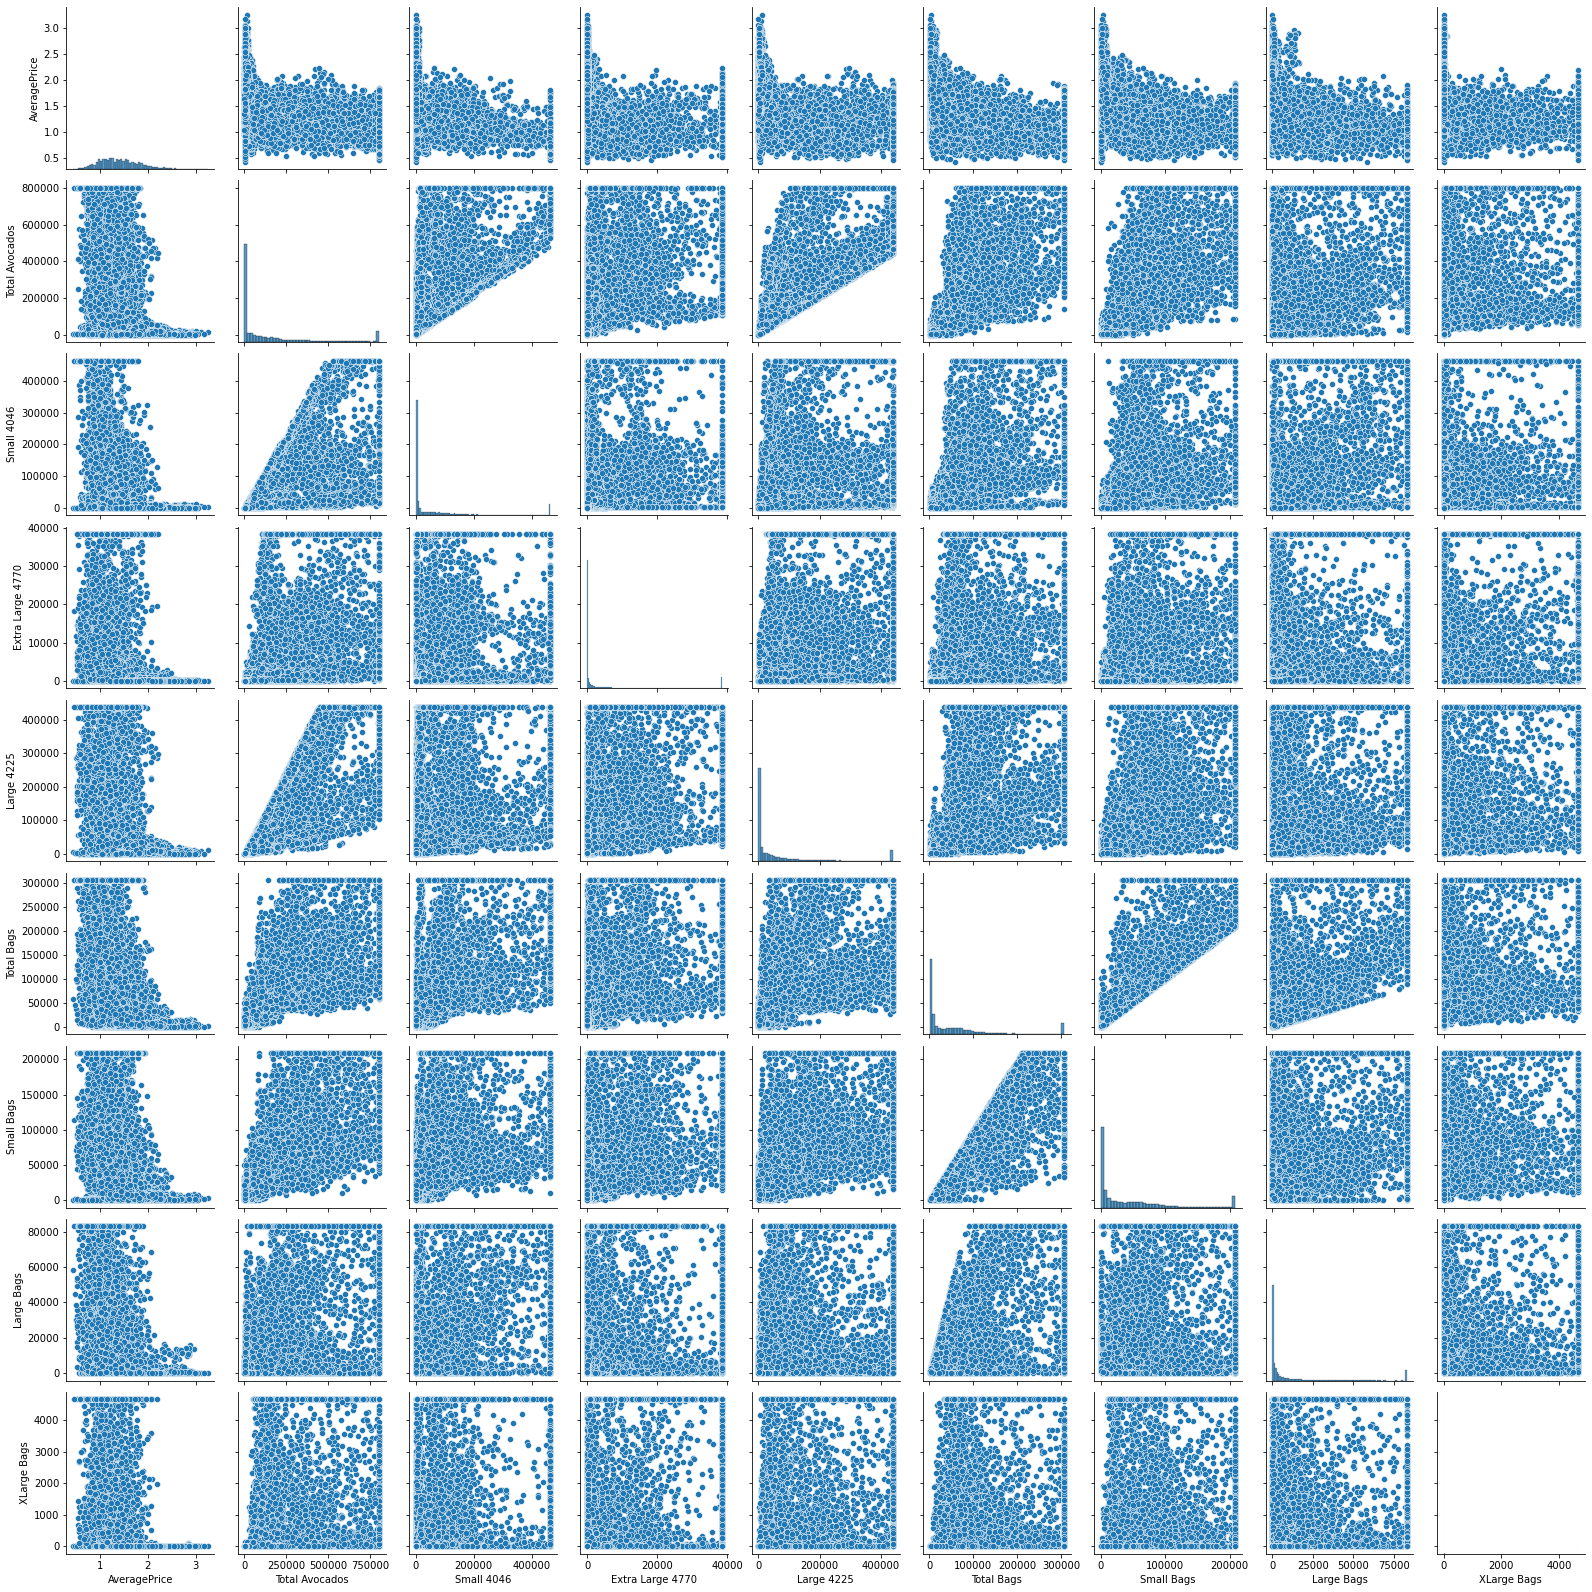

In [24]:
cols = ['AveragePrice','Total Avocados','Small 4046','Extra Large 4770',
        'Large 4225','Total Bags','Small Bags','Large Bags','XLarge Bags']

sns.pairplot(data_clean[cols])

Aquest pairplot ens mostra que les variables no tenen correlacions notables en general, però les variables que el heatmap ens afirmava que estaven correlacionades tenen una certa tendència a la diagonal.

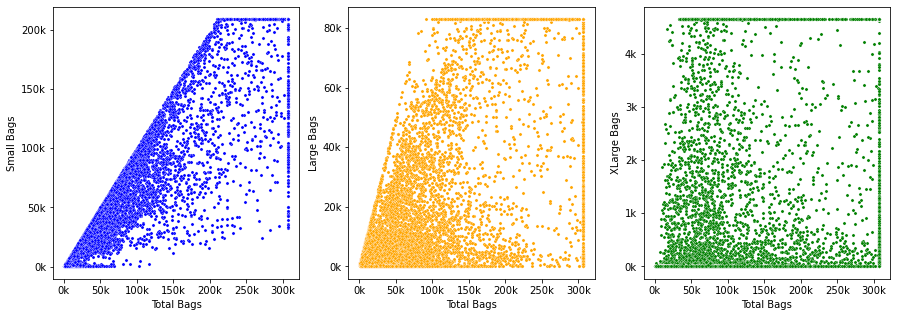

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=data_clean['Total Bags'], y=data_clean['Small Bags'],
            color="blue", s=10, ax=axs[0])
sns.scatterplot(x=data_clean['Total Bags'], y=data_clean['Large Bags'],
            color="orange", s=10, ax=axs[1])
sns.scatterplot(x=data_clean['Total Bags'], y=data_clean['XLarge Bags'],
            color="green", s=10, ax=axs[2])
for i in range(3):
    axs[i].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'k'))
    axs[i].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'k'))

La majoria de les bosses són bosses petites, tal i com mostra el primer gràfic (la concentració de punts està a la diagonal), tot i que per una quantitat petita de bosses totals les bosses grans també contribueixen en gran part. Per altra banda les bosses extra grans representen una petita quantitat del total.

### Total Avocados
A partir d'un histograma en escala logarítmica observem com es distribueix el nombre d'alvocats venuts setmanalment.

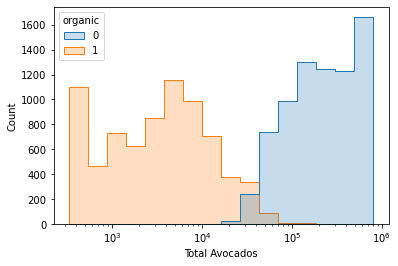

In [26]:
ax = sns.histplot(data=data_clean, x='Total Avocados', 
             hue='organic', bins=16, element="step",  log_scale=True)
sns.move_legend(ax, "upper left")

Aquí veiem un fet interessant, i és que setmanalment es compren molts més alvocats convencionals que orgànics. És un fet que podíem arribar a imaginar, ja que aquest segon és més car i no se'n produeixen tantes unitats.

### Small, Large and Extra Large avocados

Volem veure la diferència entre les vendes dels diferents tipus d'alvocats i com aquests poden afectar a la variable objectiu.

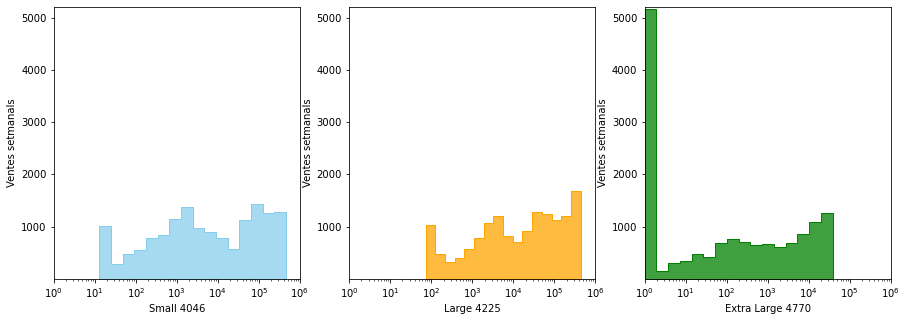

In [27]:
# Creem un dataset auxiliar amb els alvocats 4770 perquè tenim dades que son 0 i no es poden plotejar amb una escala logarítmica
# Canviem aquells valors per 1 (log1 = 0)

aux = data_clean['Extra Large 4770'] + 1
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=data_clean, x='Small 4046', 
             bins=16, element="step", color="skyblue", label="Small 4046",
             log_scale=True, ax=axs[0])
sns.histplot(data=data_clean, x='Large 4225', 
             bins=16, element="step", color="orange", label="Large 4225",
             log_scale=True, ax=axs[1])
sns.histplot(data=aux, 
             bins=16, element="step", color="green",
             log_scale=True, ax=axs[2])
for i in range(3):
    axs[i].set_xlim(1, 10**6)
    axs[i].set_ylim(1, 5200)
    axs[i].set(ylabel='Ventes setmanals')

plt.show()

### Bags

Fem el mateix amb les variables de bosses d'alvocats

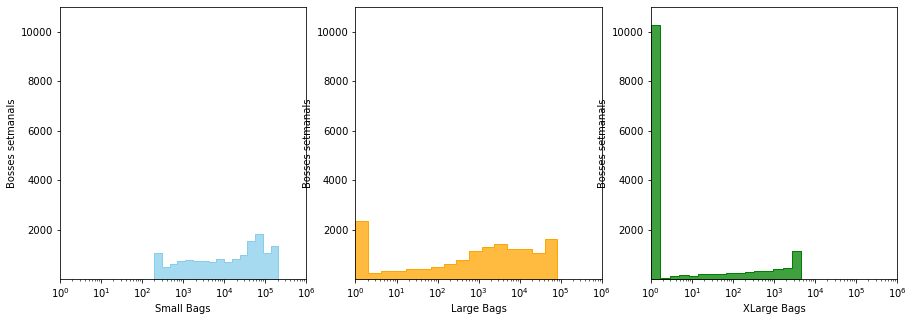

In [28]:
# Creem un dataset auxiliar amb les bosses grans i molt grans perquè tenim dades que son 0 i 
# no es poden plotejar amb una escala logarítmica. Canviem aquells valors per 1 (log1 = 0)

aux0 = data_clean['Large Bags'] + 1
aux1 = data_clean['XLarge Bags'] + 1
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=data_clean, x='Small Bags', 
             bins=16, element="step", color="skyblue", label="Small Bags",
             log_scale=True, ax=axs[0])
sns.histplot(data=aux0, 
             bins=16, element="step", color="orange",
             log_scale=True, ax=axs[1])
sns.histplot(data=aux1, 
             bins=16, element="step", color="green",
             log_scale=True, ax=axs[2])
for i in range(3):
    axs[i].set_xlim(1, 10**6)
    axs[i].set_ylim(1, 11000)
    axs[i].set(ylabel='Bosses setmanals')
plt.show()

### Average Price (variable objectiu)

Veurem la distribució de la variable objectiu i la graficarem conjuntament amb les variables amb les que té una major correlació.

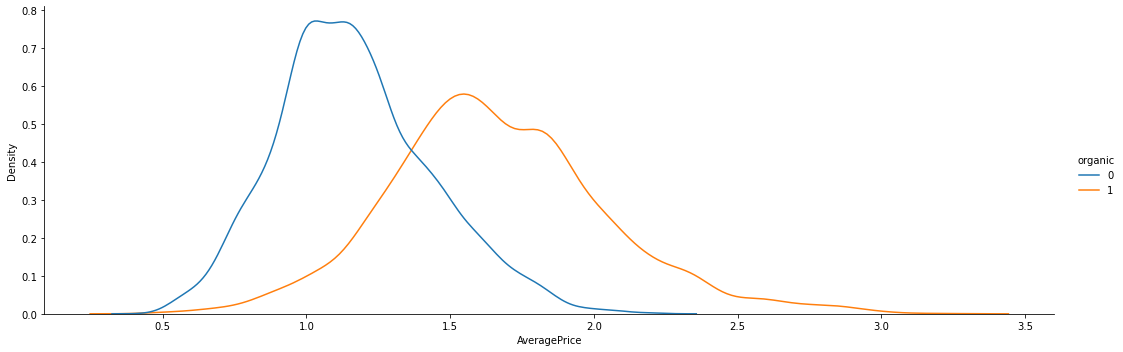

In [29]:
sns.displot(data=data_clean, x='AveragePrice', hue="organic", kind="kde", aspect=3)

Es pot observar com el preu dels alvocats convencionals té una desviació menor i el preu es concentra al voltant de \\$1, arribant al pitjor dels casos fins a \\$2. En canvi el preu dels alvocats orgànics, degut a la seva producció més complexa i conscient amb el medi ambient, tenen un preu més elevat, concentrant-se al voltant de \\$1.7, amb una desviació major (el preu es veu més influenciat per altres fenòmens degut a la naturalesa del cultiu orgànic), veient pics de preu de fins a \\$3 i cues de \\$0.5

Fixem-nos ara en els canvis al preu mitjà en funció del temps a les diverses ciutats

In [30]:
MIN_COST = data_clean["AveragePrice"].min()
MAX_COST = data_clean["AveragePrice"].max()
NUM_CITIES = len(set(data_clean["Cities"]))
MIN_MONTH = data_clean.sort_values(by='Date').iloc[0]['Date'].month
MIN_YEAR = data_clean.sort_values(by='Date').iloc[0]['Date'].year
MAX_MONTH = data_clean.sort_values(by='Date').iloc[-1]['Date'].month
MAX_YEAR = data_clean.sort_values(by='Date').iloc[-1]['Date'].year
NUM_MONTHS = (13 - MIN_MONTH) + (MAX_YEAR - MIN_YEAR - 1)*12 + MAX_MONTH 

Text(0.5, 0.95, "Preu mitjà mensual de l'alvocat a diferents ciutats d'EEUU")

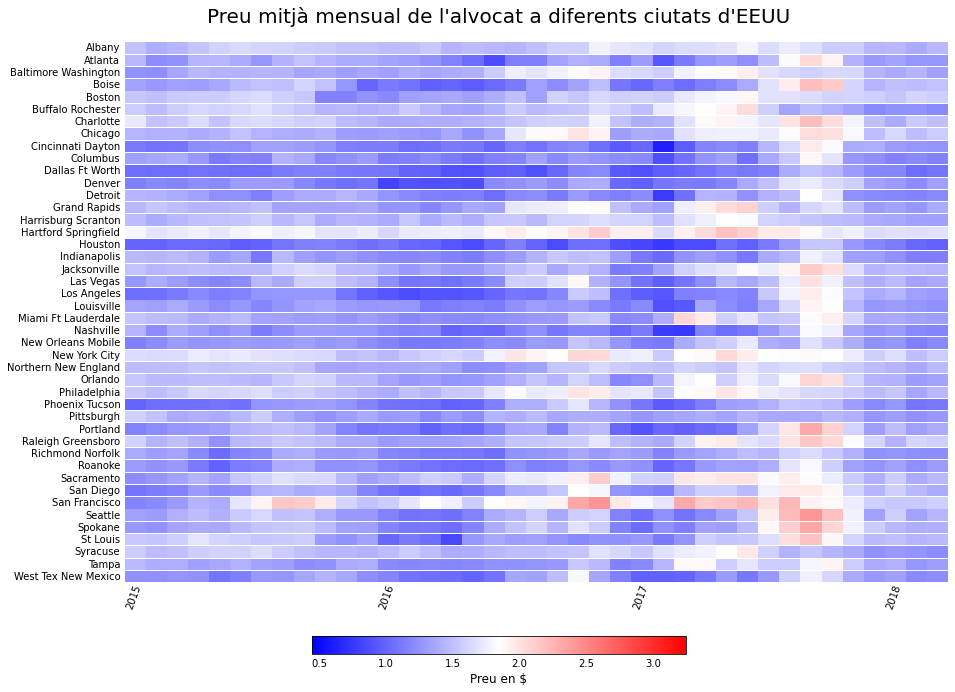

In [31]:
def single_plot(data, city, ax, i):
    data = data[data["Cities"] == city]
    
    means = []
    for y in range(MIN_YEAR, MAX_YEAR+1):
        for m in range(1,13):
            if y == MIN_YEAR and m < MIN_MONTH:
                continue
            elif y == MAX_YEAR and m > MAX_MONTH:
                continue
                
            aux = data["AveragePrice"][(data["Date"].dt.year == y) & (data["Date"].dt.month == m)]
            
            if aux.empty:
                means.append(MIN_COST)
                continue
            means.append(aux.mean())
            
    means = [means]
    xgrid = np.arange(NUM_MONTHS + 1) + 1
    ygrid = np.arange(1 + 1) + 1
    
    ax.pcolormesh(xgrid, ygrid, means, cmap="bwr", vmin=MIN_COST, vmax=MAX_COST)
    
    # Set tick positions for both axes
    ax.yaxis.set_ticks([0])
    ax.xaxis.set_ticks([0])
    
    if i == 43:
        ax.text(1,-1.2, 2015, rotation=70, fontsize=10)
        ax.text(13,-1.2, 2016, rotation=70, fontsize=10)
        ax.text(25,-1.2, 2017, rotation=70, fontsize=10)
        ax.text(37,-1.2, 2018, rotation=70, fontsize=10)

    ax.text(0.8, 1.1, city, verticalalignment='bottom', horizontalalignment='right', fontsize=10)
        
    # Remove ticks by setting their length to 0
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    
    # Remove all spines
    ax.set_frame_on(False)

fig, axes = plt.subplots(44, 1, figsize=(13, 10), sharey=True)

cities = list(set(data_clean["Cities"]))
cities.sort()
for i, city in enumerate(cities):
    single_plot(data_clean, city, axes[i], i)

fig.subplots_adjust(left=0.1, right=0.98, top=0.9, hspace=0.08, wspace=0.04)

fig.subplots_adjust(bottom=0.15)
cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.025])

norm = mc.Normalize(MIN_COST, MAX_COST)

cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap="bwr"), 
    cax=cbar_ax, # Pass the new axis
    orientation = "horizontal"
)

cb.ax.xaxis.set_tick_params(size=0)
cb.set_label("Preu en \\$", size=12)
fig.suptitle("Preu mitjà mensual de l'alvocat a diferents ciutats d'EEUU", fontsize=20, y=0.95)

La gràfica ens mostra diversos fenòmens molt interessants:
 - Encariment a la segona meitat de 2017: el fet més destacable de la gràfica són les taques vermelles predominants a la segona meitat del 2017. En aquest periode hi va haver una escassetat d'alvocats que va fer disparar el seu preu que va superar de mitjana els 3\\$ en algunes ciutats com San Francisco i Seattle.
 - Peridiocitat dels preus: es pot observar també com els preus tendeixen a pujar en unes certes dates de manera anual, coincidint amb la segona meitat de l'any. Es repeteix el fenòmen el 2015, 2016 i 2017 sobretot a les ciutats de New York City, San Francisco i Hartford Springfield.
 - Disparitat entre ciutats: l'últim fet a destacar és la notable diferència entre algunes ciutats; mentre unes tenen els preus al voltant de 3\\$ d'altres els mantenen per sota del dòlar, com podria ser el cas Nashville i San Francisco el març del 2017.

En resum, queda força clar que les tendències són disparells entre ciutats i que una mitjana no explica tot el que està passant per sota, cada ciutat té el seu comportament particular, com l'extraordinari cas de San Francisco.

## Normalització

Un pas important per eliminar biaixos a les prediccions per culpa de l'escala de les variables.

In [32]:
x = data_clean.drop('AveragePrice', axis=1)
y = data_clean[['Date','AveragePrice']]

data_std = StandardScaler().fit_transform(x.drop(['Date','Cities','organic'], axis=1)) 
data_std = pd.DataFrame(data_std, columns=x.drop(['Date','Cities','organic'], axis=1).columns)

In [33]:
data_std['Date'] = data_clean['Date']
data_std['Cities'] = data_clean['Cities']
data_std['organic'] = data_clean['organic']

data_std = data_std.sort_values('Date')
x = data_std

In [34]:
data_std

Total Avocados  Small 4046  Extra Large 4770  Large 4225  Total Bags  \
0           -0.609750   -0.531005         -0.478083   -0.517541   -0.724430   
63          -0.603475   -0.394110         -0.477780   -0.637544   -0.725366   
62           1.719955    0.443473          0.083378    2.817449    0.668530   
61          -0.181860   -0.294395          3.400061   -0.262975   -0.118280   
60           0.509333   -0.487430         -0.461403    1.512718   -0.030040   
...               ...         ...               ...         ...         ...   
14805       -0.680184   -0.537853         -0.477072   -0.641540   -0.461496   
14804        2.809186    3.342265          0.171226    1.125886    2.993424   
14803        2.809186    3.342265          3.400061    2.888679    2.993424   
14823       -0.656322   -0.540242         -0.468176   -0.595741   -0.647088   
14868       -0.663697   -0.537040         -0.478083   -0.611695   -0.561643   

       Small Bags  Large Bags  XLarge Bags       Date                Cities  \
0       -0.739902   -0.540524    -0.390620 2015-01-04               Chicago   
63      -0.741256   -0.540524    -0.390620 2015-01-04             San Diego   
62       0.438578    1.599793    -0.387258 2015-01-04                Denver   
61       0.024013   -0.250026    -0.390620 2015-01-04             Charlotte   
60       0.218796   -0.421073    -0.390620 2015-01-04  Hartford Springfield   
...           ...         ...          ...        ...                   ...   
14805   -0.359220   -0.540389    -0.390620 2018-03-25   Harrisburg Scranton   
14804    2.916092    3.182861     3.515605 2018-03-25       Dallas Ft Worth   
14803    2.916092    0.665745     3.515605 2018-03-25           Los Angeles   
14823   -0.634770   -0.523010    -0.390620 2018-03-25    Raleigh Greensboro   
14868   -0.590507   -0.320169    -0.390620 2018-03-25               Atlanta   

       organic  
0            1  
63           1  
62           0  
61           0  
60           0  
...        ...  
14805        1  
14804        0  
14803        0  
14823        1  
14868        1  

[14869 rows x 11 columns]

---

## Reducció dimensionalitat

El nostre dataset actual compta amb 9 variables numèriques (sense comptar la variable objectiu). És segur dir que no és una prioritat reduir la dimensionalitat en aquest sentit, però ja hem vist que diverses variables tenen una alta correlació, per tant els algorismes com PCA o TSNE ens poden ajudar.

### Train test split

Per tal d'aplicar el PCA hem de fer ja el train test split. En el nostre cas, per tal de conservar el factor temporal que hi ha darrere usarem un k-fold. D'aquesta manera conservem l'ordre.<br>

El percentatge de test és un 10%. Inicialment només agafarem l'últim split (90% train, 10% test), quan fem la cross-validation ja usarem tots els folds.

In [35]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=3, test_size=int(len(data_std)*0.1))
*_, last = tscv.split(data_std)

train_index = last[0]
test_index = last[1]

x_train = x.iloc[train_index]
x_test =  x.iloc[test_index]

y_train = pd.DataFrame(y.iloc[train_index])
y_test =  pd.DataFrame(y.iloc[test_index])

### PCA

Comencem amb el mètode PCA. L'aplicarem sobre x_train i analitzarem els resultats.

In [36]:
pca_out = PCA().fit(x_train.drop(['Date','Cities'], axis=1))

np.cumsum(pca_out.explained_variance_ratio_)

array([0.61250495, 0.73753973, 0.83074248, 0.89210956, 0.93993417,
       0.98011775, 0.99511095, 0.99785697, 1.        ])

Amb només 5 de les 9 variables numèriques ja podem explicar fins el 94% de la variància del dataset!!<br>
Veiem quines són les variables usades per aquestes 5 noves features.

<AxesSubplot:ylabel='variable'>

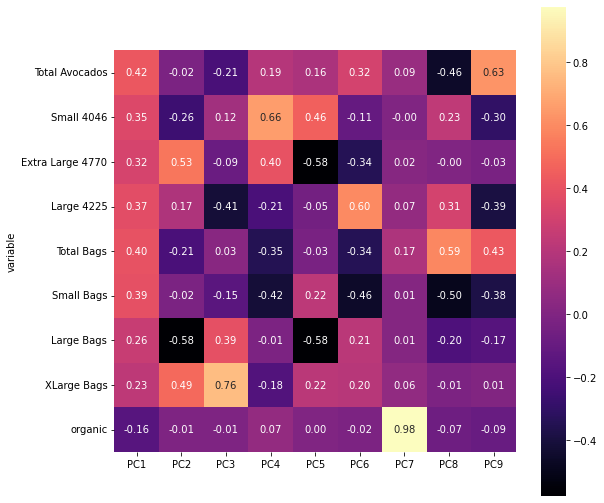

In [37]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = data_std.drop(['Date','Cities'],axis=1).columns.values
loadings_df = loadings_df.set_index('variable')

fig, ax = plt.subplots(figsize=(9,9)) 
sns.heatmap(loadings_df, annot=True, cmap='magma', fmt='.2f', ax=ax, square=True)

Observem que totes les variables aporten força informació a cada nova feature del PCA, destacant ``Total Avocados`` amb 0.43 i la que menys ``XLarge Bags`` amb 0.23.<br>

Aquests resultats són molt interessants des d'un punt de vista de la qualitat de les features, però com que la quantitat de variables ja és força reduïda i la transformació ens treuria interpretabilitat al model, decidim no fer el canvi. Tot i això, aquestes noves 5 features s'usaran en el millor dels models que trobem al final després de fer la cross-validation per comparar amb el dataset inicial.

In [38]:
# Guardem el dataset del PCA

x_tr_pca = pca_out.fit_transform(x_train.drop(['Cities','Date'], axis=1))
x_tr_pca = pd.DataFrame(x_tr_pca, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
x_tr_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -1.647638  0.062763 -0.083337  0.100043  0.044577  0.092669  0.233514   
1     -1.642865  0.006559 -0.017906  0.217179  0.113684  0.009061  0.225167   
2      2.843054 -0.909044 -1.184436 -0.348983 -0.626421  1.993425 -0.018656   
3      0.719421  1.801217 -0.578481  1.218793 -2.039451 -1.452317 -0.488319   
4      0.449439  0.159371 -1.230265 -0.779038  0.262999  1.019825 -0.374100   
...         ...       ...       ...       ...       ...       ...       ...   
13378  1.272787 -1.652018  0.711347 -0.370842 -1.453263  0.543317 -0.298178   
13379 -1.608091  0.014307 -0.042979  0.019933  0.066231 -0.084457  0.240445   
13380 -1.692476  0.037292 -0.025874  0.074331  0.044406 -0.033440  0.225259   
13381 -1.119945 -0.058778 -0.204237 -0.312884  0.216812 -0.331643  0.330969   
13382  4.449523 -1.111158 -1.998115 -2.683869  0.410568  0.377514  0.439559   

            PC8       PC9  
0      0.012186  0.002315  
1      0.003915  0.012087  
2      0.084191 -0.258446  
3     -0.065793  0.006554  
4      0.117109 -0.093606  
...         ...       ...  
13378 -0.070879 -0.160618  
13379 -0.007801 -0.005112  
13380  0.000207  0.003995  
13381 -0.046578 -0.058384  
13382 -0.035829  0.486463  

[13383 rows x 9 columns]

### Feature Selection

La PCA ens ha indicat que hi ha variables que ens aporten molt poca informació, fins a 4 si fem les combinacions lineals apropiades. Això pot ser un problema a l'hora de modelar, ja que la informació es pot sol·lapar. Per tant procedim a fer una selecció de variables. El nombre de variables que esperem tenir després d'aquesta selecció és major al nombre de variables que ens deia la PCA que tindríem amb un 94% de variància, ja que no fem combinacions lineals de les features, només les seleccionem.

El mètode que seguirem per triar les variables s'anomena ``SelectKBest``. L'algorisme compara cadascuna de les variables i es queda amb les k millors d'acord amb la funció score que li passem. En el nostre cas ens interessa trobar variables rellevants per a la regressió, per tant usarem la funció score ``f_regression``, que retorna els F-values d'una regressió lineal univariant amb la variable objectiu i la seleccionada. Aquesta funció és la més extesa per a feature selection de problemes de regressió.

C:\Users\erics\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


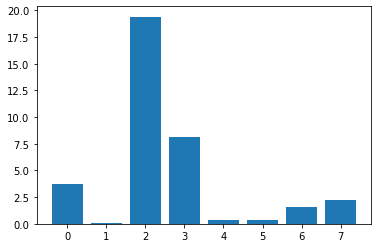

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k=6)
fs.fit(x_train.drop(['Date','Cities','organic'],axis=1), y_train.drop('Date',axis=1))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [40]:
feat = list(fs.get_feature_names_out())

Per tant, les variables numèriques que tindrem per entrenar els models són:
 - ``Total Avocados``
 - ``Extra Large 4770``
 - ``Large 4225``  
 - ``Total Bags``
 - ``Large Bags``
 - ``XLarge Bags``

I ens desfem de:
 - ``Small 4046``
 - ``Small Bags``

In [41]:
data_clean.drop(['Small 4046','Small Bags'],axis=1,inplace=True)

---

## Model learning

Recordem que el nostre dataset és un dataset temporal amb una variable objectiu numèrica, per tant usarem models que tenen en compte el factor temporal i d'altres que no estan dissenyats només per això.<br>

Abans de començar a entrenar models cal saber quin preu és el que volem predir. El nostre dataset conté fins a 44 preus diferents per la mateixa data (recordem que cada ciutat té el seu preu), i no els podem predir tots alhora, per tant cal fer un canvi al dataset. <br>

Les prediccions es faran sobre la **mitjana de preu** dels alvocats a totes les ciutats en funció del tipus.

In [42]:
# Creació dels datasets de les mitjanes de preu en funció del tipus

aux = data_clean.drop('Cities', axis=1)
data_mean = data_clean.groupby(['Date','organic'], as_index=False).agg({'AveragePrice':'mean', 'Total Avocados':'sum',
                                                                        'Extra Large 4770':'sum', 'Large Bags':'sum',
                                                                        'Large 4225':'sum', 'Total Bags':'sum',
                                                                        'XLarge Bags':'sum'})
data_mean_org = data_mean[data_mean['organic'] == 1].reset_index(drop=True)
data_mean_org.drop('organic', axis=1, inplace=True)
data_mean_con = data_mean[data_mean['organic'] == 0].reset_index(drop=True)
data_mean_con.drop('organic', axis=1, inplace=True)

x_std_org = (data_mean_org.drop(['AveragePrice','Date'],axis=1)-
             data_mean_org.drop(['AveragePrice','Date'],axis=1).mean())/data_mean_org.drop(['AveragePrice','Date'],axis=1).std()
x_std_con = (data_mean_con.drop(['AveragePrice','Date'],axis=1)-
             data_mean_con.drop(['AveragePrice','Date'],axis=1).mean())/data_mean_con.drop(['AveragePrice','Date'],axis=1).std()
data_std_org = x_std_org.copy()
data_std_org['AveragePrice'], data_std_org['Date'] = [data_mean_org['AveragePrice'], data_mean_org['Date']]
data_std_con = x_std_con.copy()
data_std_con['AveragePrice'], data_std_con['Date'] = [data_mean_con['AveragePrice'], data_mean_con['Date']]

In [43]:
data_std_org

Total Avocados  Extra Large 4770  Large Bags  Large 4225  Total Bags  \
0         -0.049928         -0.139303   -1.152030   -1.137612   -1.324337   
1          0.572210         -0.264718   -1.327920   -0.655622   -1.370553   
2          0.702895         -0.204244   -1.151055   -0.124062   -1.346152   
3         -0.495705         -0.031756   -1.215780   -1.294140   -1.375669   
4          0.740785          0.196053   -1.125534   -0.695796   -1.222509   
..              ...               ...         ...         ...         ...   
164        0.158687         -0.853996    0.956608    0.500909    1.723348   
165        0.820010         -0.838534    0.887363    1.146909    2.172425   
166        0.662384         -0.767065    0.165467    1.129533    2.145483   
167        1.506817         -0.888700    0.723415    1.712947    1.909375   
168        0.149592         -0.856401    0.493318    0.522099    2.177153   

     XLarge Bags  AveragePrice       Date  
0      -0.338798      1.597500 2015-01-04  
1      -0.338798      1.638182 2015-01-11  
2      -0.338798      1.657500 2015-01-18  
3      -0.338798      1.685000 2015-01-25  
4      -0.338798      1.544545 2015-02-01  
..           ...           ...        ...  
164     4.134669      1.585455 2018-02-25  
165     2.625548      1.569091 2018-03-04  
166    -0.338798      1.542727 2018-03-11  
167     2.643514      1.535455 2018-03-18  
168     2.338096      1.551591 2018-03-25  

[169 rows x 8 columns]

<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

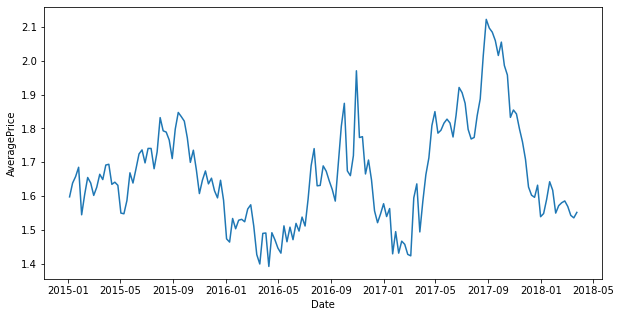

In [44]:
# Veiem el preu dels alvocats orgànics en funció del temps

fig, ax = plt.subplots(figsize=(10,5)) 
sns.lineplot(data=data_mean_org, x='Date', y='AveragePrice')

<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

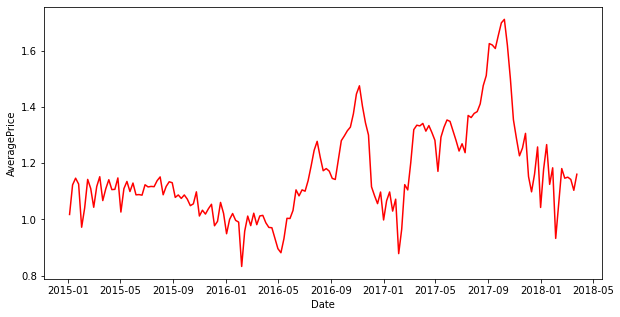

In [45]:
# Veiem el preu dels alvocats convencionals en funció del temps

fig, ax = plt.subplots(figsize=(10,5)) 
sns.lineplot(data=data_mean_con, x='Date', y='AveragePrice', color='red')

Aprofitem la creació del dataset per fer la gràfica de les mitjanes de preu dels dos tipus d'alvocats. Veiem que les tendències són similars, excepte el pic al preu de l'alvocat orgànic a finals del 2015.

A continuació fem tots els train-test split necessaris per entrenar els diversos models (els models són de llibreries diferents i funcionen de manera diferent, el que fa que necessitin dades en formats diferents).

In [82]:
# Train test split amb 10% de test

tscv = TimeSeriesSplit(n_splits=3, test_size=int(len(data_mean_org)*0.1))
*_, last = tscv.split(data_mean_org)

train_index = last[0]
test_index = last[1]

x_train_cat = data_clean.iloc[train_index].drop(['AveragePrice','Date'],axis=1)
x_test_cat  = data_clean.iloc[test_index].drop(['AveragePrice','Date'],axis=1)

y_train_cat = data_clean.iloc[train_index]['AveragePrice']
y_test_cat  = data_clean.iloc[test_index]['AveragePrice']

train_org = data_mean_org.iloc[train_index]
test_org  = data_mean_org.iloc[test_index]

train_con = data_mean_con.iloc[train_index]
test_con  = data_mean_con.iloc[test_index]

x_train_org = data_mean_org.iloc[train_index].drop('AveragePrice',axis=1)
x_test_org  = data_mean_org.iloc[test_index].drop('AveragePrice',axis=1)

y_train_org = data_mean_org.iloc[train_index]['AveragePrice']
y_test_org  = data_mean_org.iloc[test_index]['AveragePrice']

x_train_con = data_mean_con.iloc[train_index].drop('AveragePrice',axis=1)
x_test_con  = data_mean_con.iloc[test_index].drop('AveragePrice',axis=1)

y_train_con = data_mean_con.iloc[train_index]['AveragePrice']
y_test_con  = data_mean_con.iloc[test_index]['AveragePrice']

x_std_train_org = x_std_org.iloc[train_index]
x_std_test_org  = x_std_org.iloc[test_index]

x_std_train_con = x_std_con.iloc[train_index]
x_std_test_con  = x_std_con.iloc[test_index]

### Models escollits

Els models escollits els podem diferenciar en dos tipus:
 - Temporals
  - Python Automatic Forecasting (PyAF)
  - AutoARIMA de StatsForecast
  - Prophet
 - Generals
  - Regressió lineal multivariable
  - Random Forest $\quad\quad$ *(amb hiperparàmetres)*
  - Catboost $\quad\quad\quad\quad$ *(amb hiperparàmetres i variables categòriques)*
  - XGBoost $\quad\quad\quad\quad$ *(amb hiperparàmetres)*
  
En aquesta primera part es presenten els diferents models i es fa una primera execució amb una partició inicial de train test sense cross-validation. L'objectiu és veure a petita escala les diferències entre models i tenir els primers resultats preliminars.

#### Python Automatic Forecasting (PyAF)

La libreria PyAF està especialitzada en modelització per a series temporals. El model que usarem en aquesta pràctica és el ``cForecastEngine``. Aquest model ens permet obtenir prediccions futures de la variable objectiu a partir només de les dates. Aquest model no seria l'òptim, ja que estem perdent molta informació sobre les bosses i la quantitat d'alvocats venuts, però pot ser un bon començament.

In [47]:
import pyaf.ForecastEngine as autof

lEngine = autof.cForecastEngine()
lEngine.train(train_org, 'Date' , 'AveragePrice', len(test_org))

INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['AveragePrice'], 'Transformations': [('AveragePrice', 'None', '_', 'T+S+R'), ('AveragePrice', 'None', 'Diff_', 'T+S+R'), ('AveragePrice', 'None', 'RelDiff_', 'T+S+R'), ('AveragePrice', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 5.312, ('SIGNAL_TRAINING', {'Signals': ['AveragePrice'], 'Transformations': [('AveragePrice', 'None', '_', 'T+S+R'), ('AveragePrice', 'None', 'Diff_', 'T+S+R'), ('AveragePrice', 'None', 'RelDiff_', 'T+S+R'), ('AveragePrice', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['AveragePrice'], 'Transformations': [('AveragePrice', [('AveragePrice', 'None', 'CumSum_', 'T+S+R'), ('AveragePrice', 'None', 'Diff_', 'T+S+R'), ('AveragePrice', 'None', 'RelDiff_', 'T+S+R'), ('AveragePrice', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 

INFO:pyaf.timing:('OPERATION_START', ('PLOTTING', {'Signals': ['AveragePrice']}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.985, ('PLOTTING', {'Signals': ['AveragePrice']}))


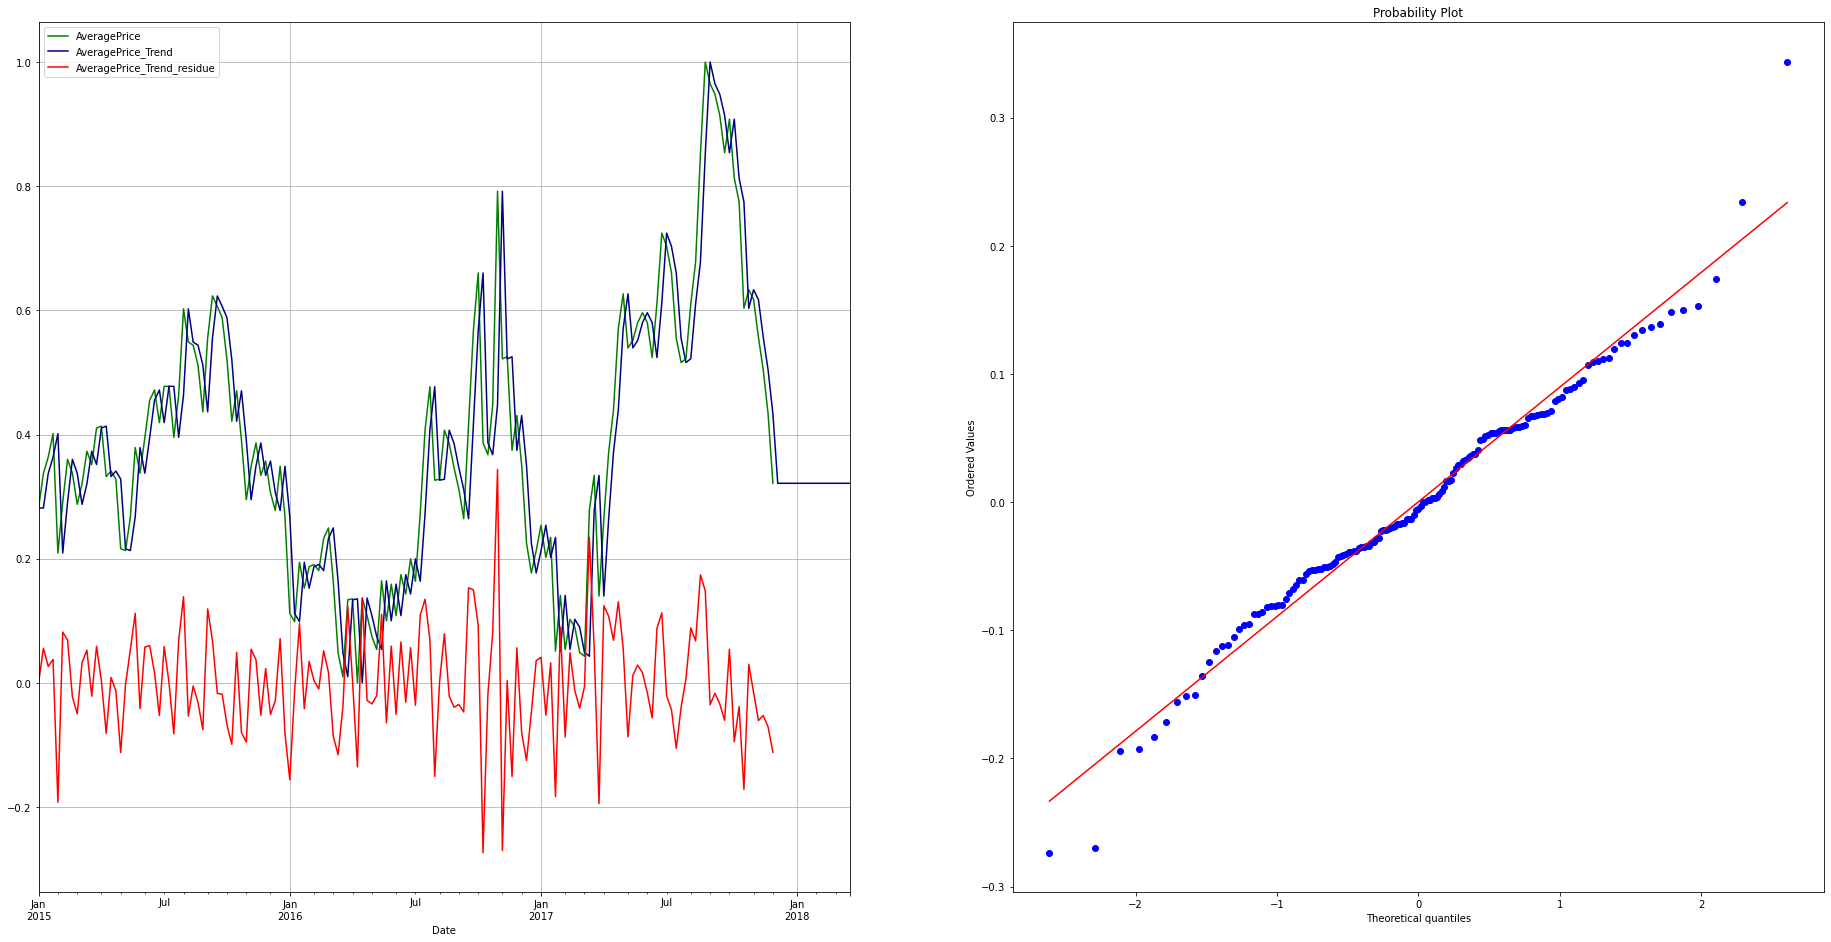

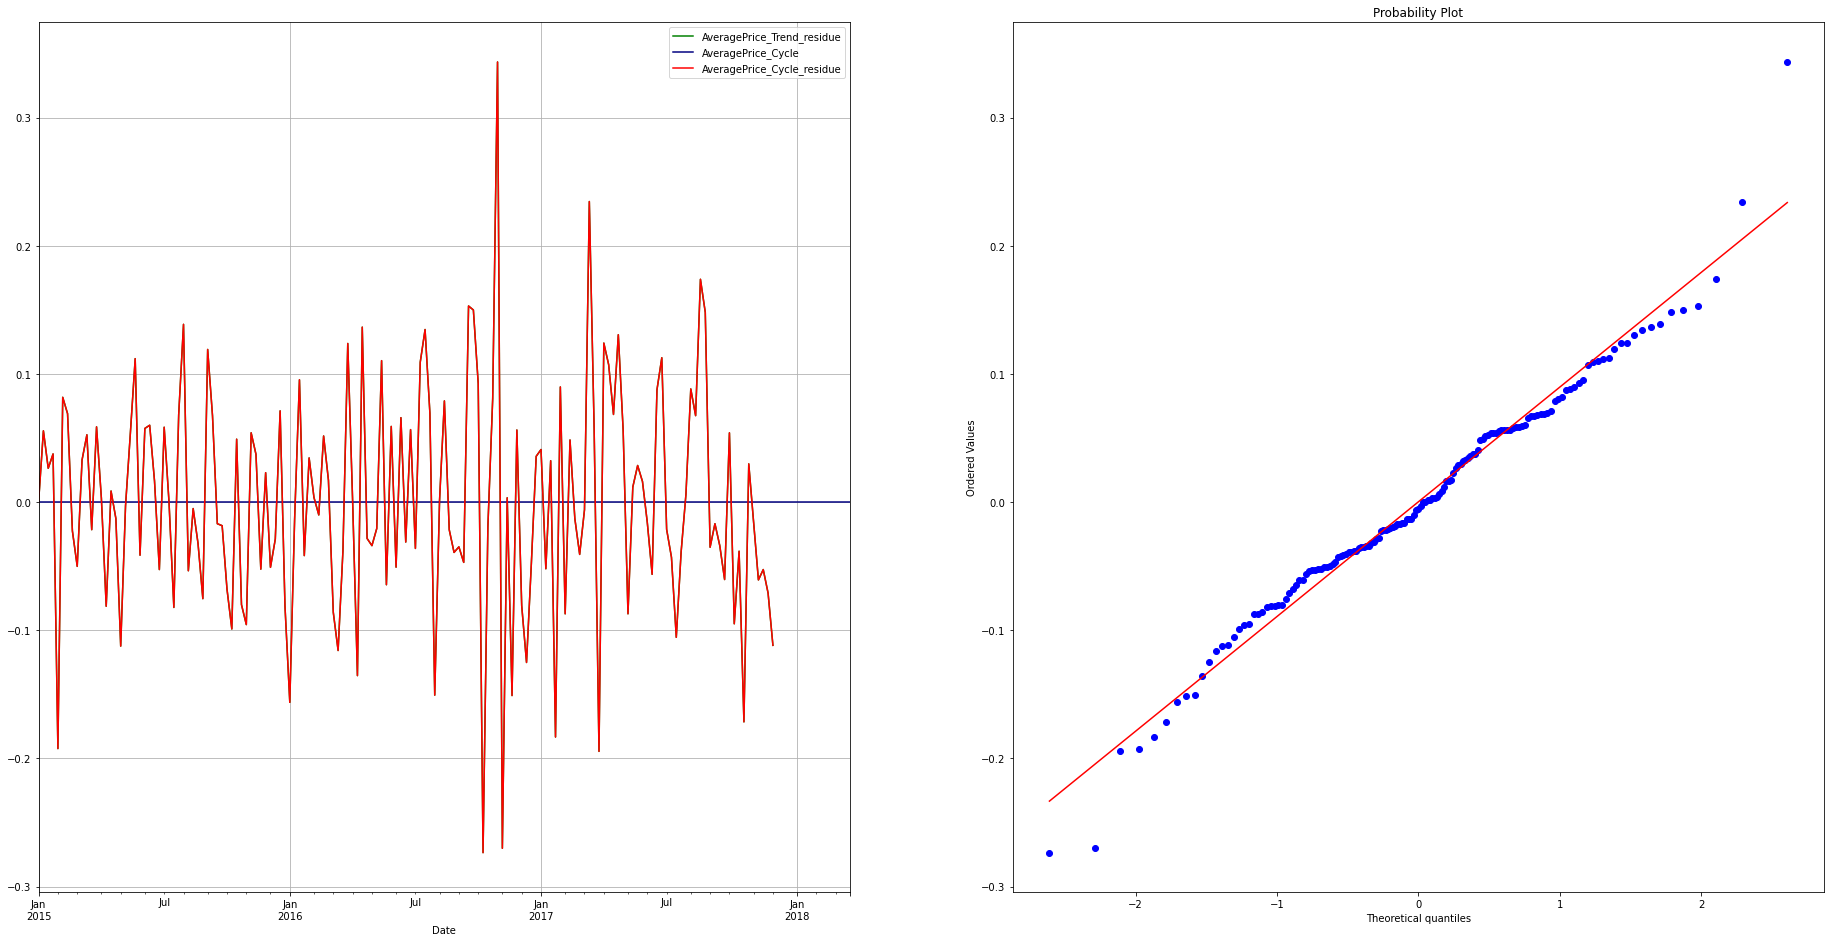

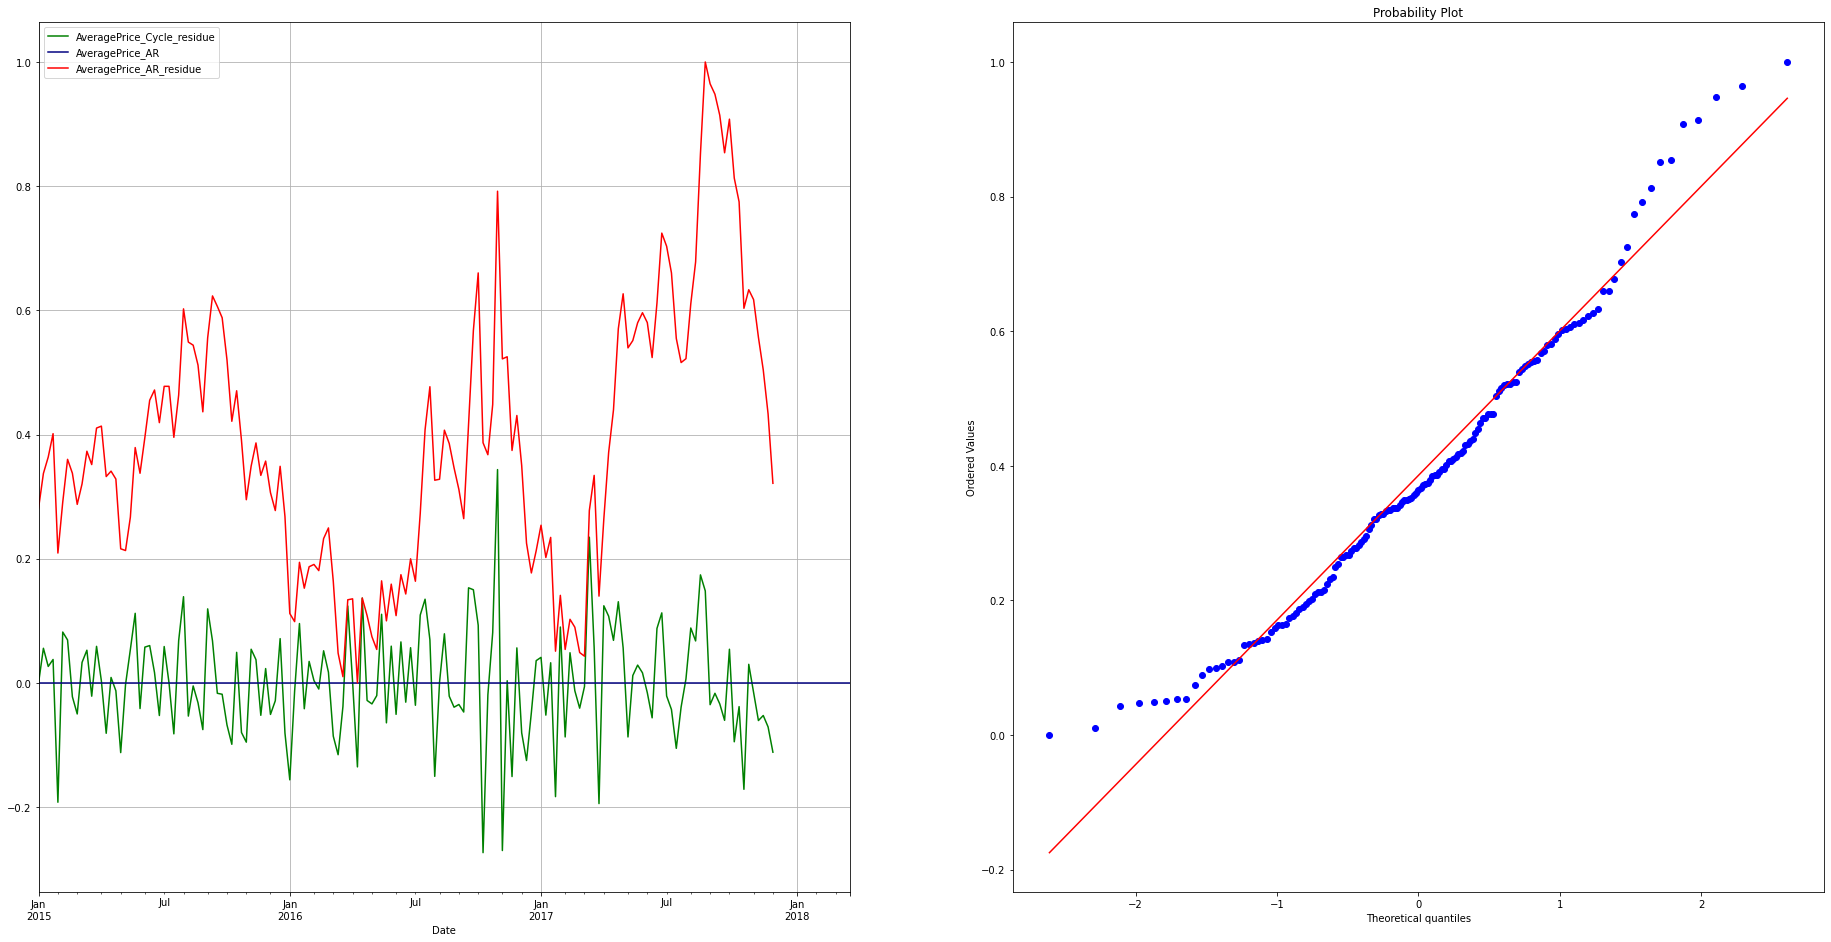

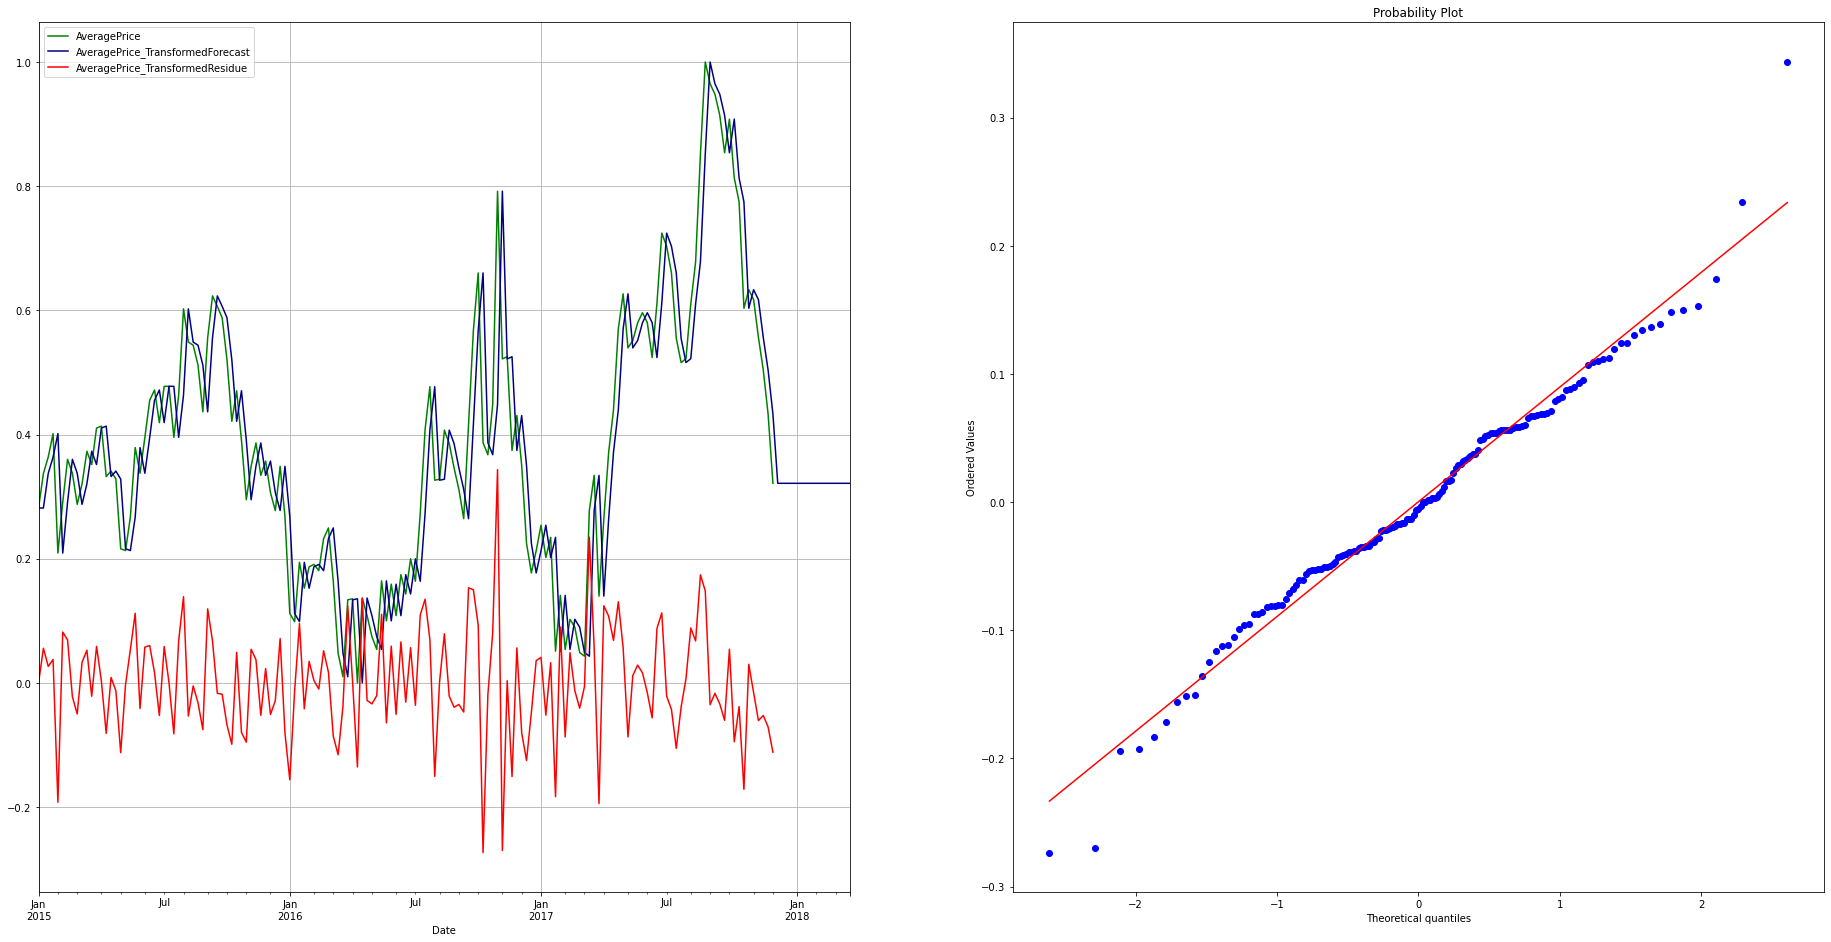

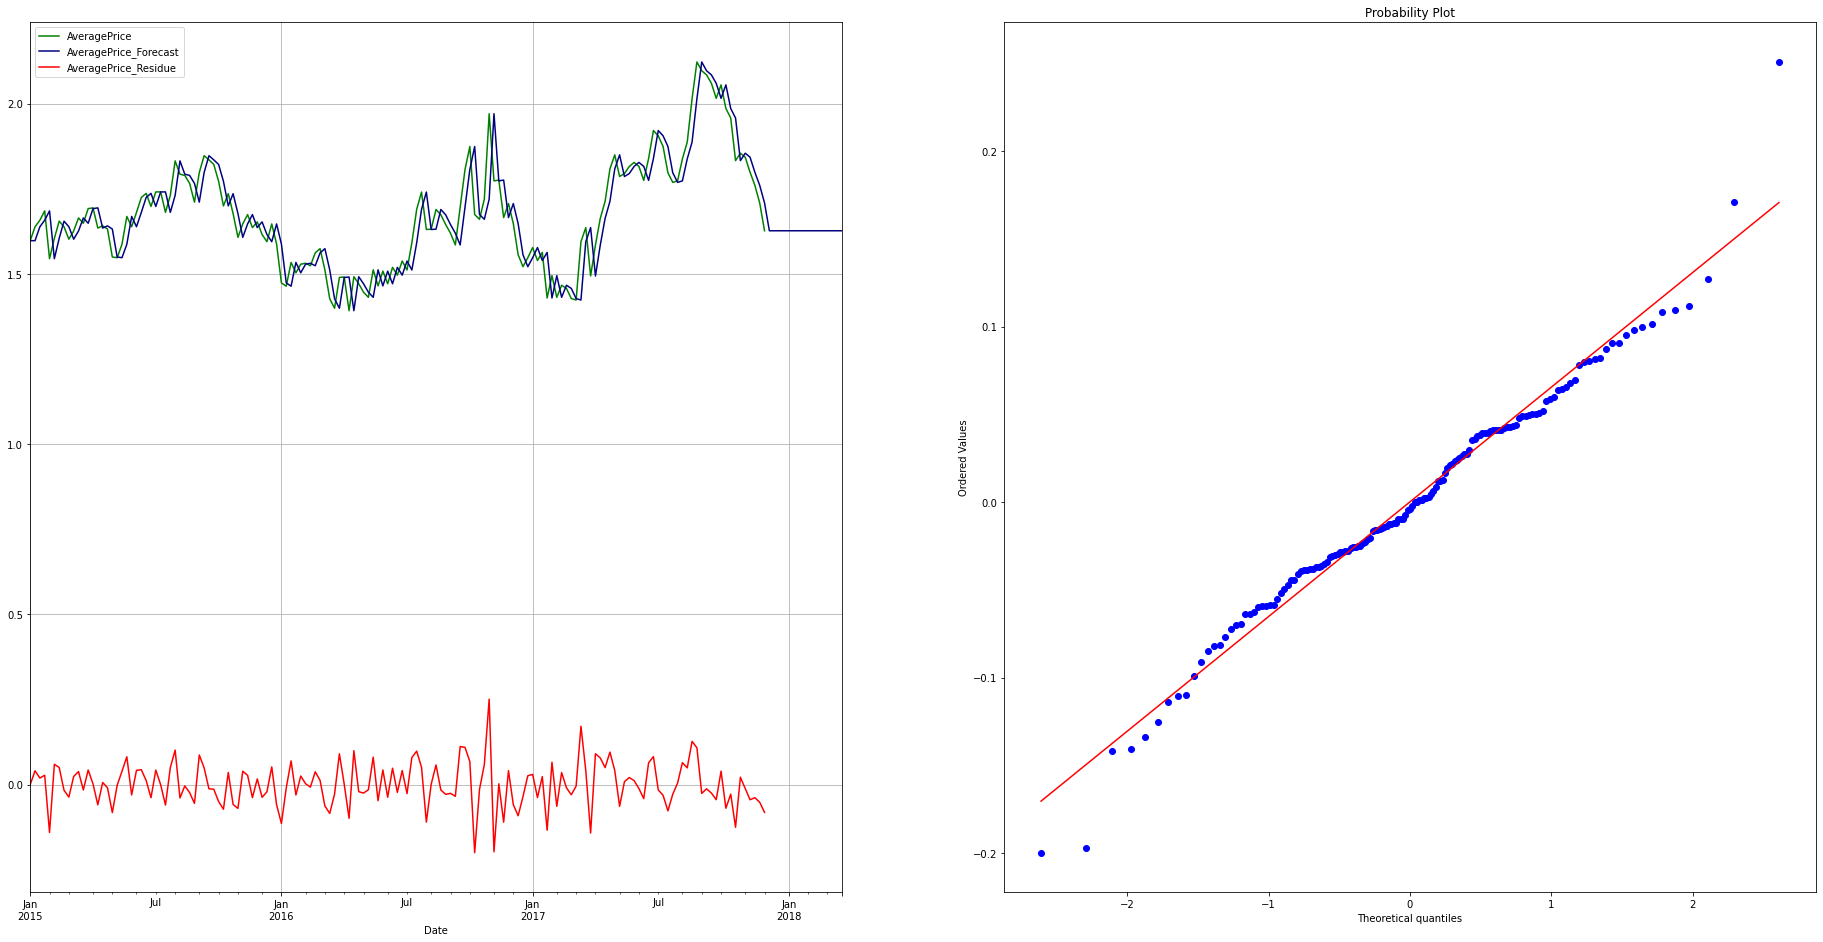

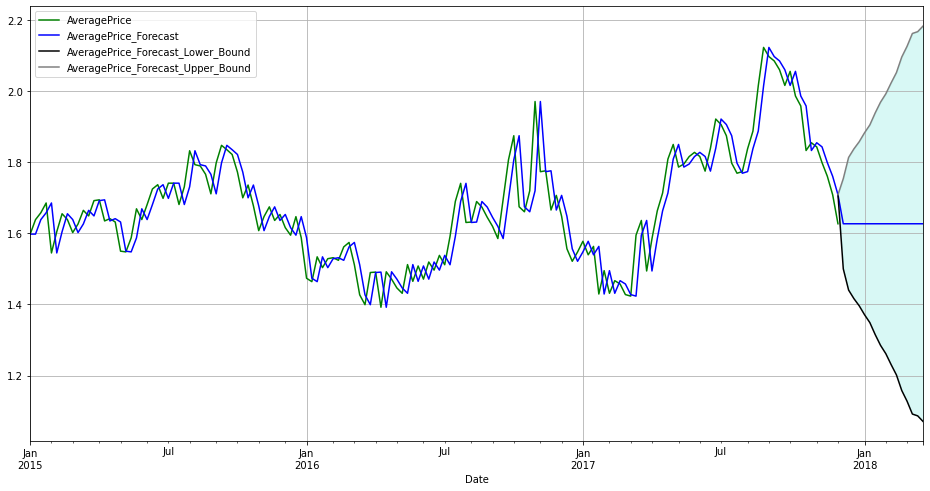

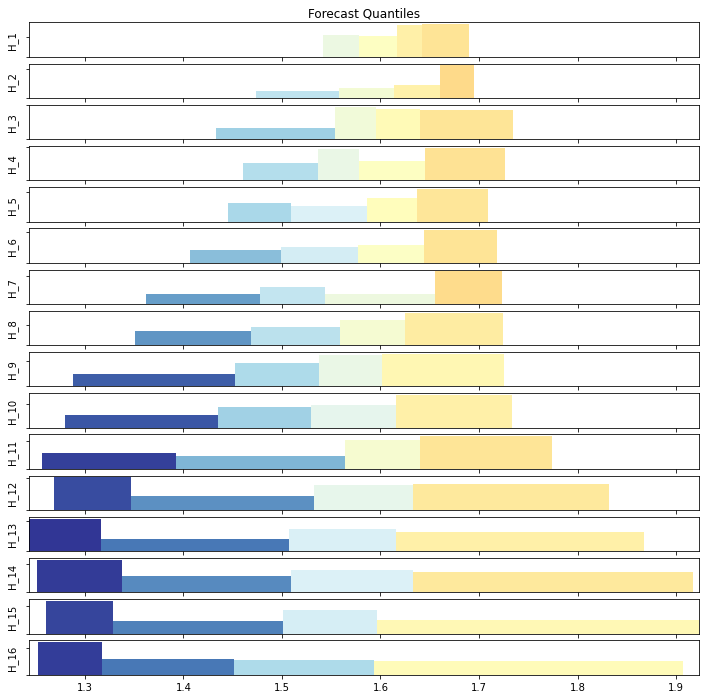

In [48]:
lEngine.standardPlots()

In [49]:
# Predicció  

df_forecast = lEngine.forecast(iInputDS = train_org, iHorizon = len(test_org))
pyaf_pred = df_forecast['AveragePrice_Forecast']
print(df_forecast[['Date','AveragePrice_Forecast']])

INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['AveragePrice'], 'Horizon': 16}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.116, ('FORECASTING', {'Signals': ['AveragePrice'], 'Horizon': 16}))


          Date  AveragePrice_Forecast
0   2015-01-04               1.597500
1   2015-01-11               1.597500
2   2015-01-18               1.638182
3   2015-01-25               1.657500
4   2015-02-01               1.685000
..         ...                    ...
164 2018-02-25               1.626591
165 2018-03-04               1.626591
166 2018-03-11               1.626591
167 2018-03-18               1.626591
168 2018-03-25               1.626591

[169 rows x 2 columns]


Tot i la gran quantitat de gràfiques que ens mostra el model, la predicció en sí deixa molt a desitjar. El model ens ha predit una recta sense pendent, amb unes cotes superior i inferior molt grans. Per tant no ens està aportant massa informació sobre el que pot passar en un futur. Aquesta predicció es pot deure a una quantitat de mostres massa escassa, ja que l'inicialització i l'entrenament del model semblen estar en regla amb el que ens demana la llibreria.

#### Auto ARIMA, ETS i Naive

Els models Auto ARIMA, ETS i Naive són models de la llibreria de sèries temporals Stats Forecast. Aquesta llibreria conté +16 models de predicció per a series temporals, però per aquest treball s'han triat aquests 3 models. <br>

Auto ARIMA és un model de predicció per a series temporals amb optimització de model automàtic. La funció tria el millor model ARIMA pel nostre dataset usant un criteri determinat. El model ETS i el model Naive funcionen de manera similar però sense aquest factor automàtic d'optimització, per tant en podem esperar pitjors resultats. De la mateixa manera que amb el cas anterior, només predirem la variable objectiu a partir del temps, perdent la informació que ens aportava la resta de variables. Per aquests models cal crear un dataframe auxiliar amb els noms de columnes ``ds`` per la data, ``unique_id`` per localitzar de manera inequívoca les mostres (en el nostre cas la data ja és un localitzador inequívoc, és per això que direm que totes les id siguin 1) i ``y`` per la variable objectiu.

In [50]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, ETS, Naive

season_length = 4
horizon = len(test_org)

models = [
    AutoARIMA(season_length=season_length),
    ETS(season_length=season_length),
    Naive()
]

aux_org = pd.DataFrame()
aux_org['y'] = train_org['AveragePrice']
aux_org['ds'] = train_org['Date']
aux_org['unique_id'] = 1

model = StatsForecast(
    df=aux_org,
    models=models,
    freq='W',
    n_jobs=-1
)

C:\Users\erics\AppData\Roaming\Python\Python39\site-packages\statsforecast\models.py:526: FutureWarning: `ETS` will be deprecated in future versions of `StatsForecast`. Please use `AutoETS` instead.
  ETS._warn()


In [51]:
y_pred = model.forecast(horizon).reset_index()
y_pred

unique_id         ds  AutoARIMA       ETS     Naive
0           1 2017-12-10   1.617290  1.633541  1.626591
1           1 2017-12-17   1.614231  1.633541  1.626591
2           1 2017-12-24   1.601884  1.633541  1.626591
3           1 2017-12-31   1.583172  1.633541  1.626591
4           1 2018-01-07   1.583172  1.633541  1.626591
5           1 2018-01-14   1.583172  1.633541  1.626591
6           1 2018-01-21   1.583172  1.633541  1.626591
7           1 2018-01-28   1.583172  1.633541  1.626591
8           1 2018-02-04   1.583172  1.633541  1.626591
9           1 2018-02-11   1.583172  1.633541  1.626591
10          1 2018-02-18   1.583172  1.633541  1.626591
11          1 2018-02-25   1.583172  1.633541  1.626591
12          1 2018-03-04   1.583172  1.633541  1.626591
13          1 2018-03-11   1.583172  1.633541  1.626591
14          1 2018-03-18   1.583172  1.633541  1.626591
15          1 2018-03-25   1.583172  1.633541  1.626591

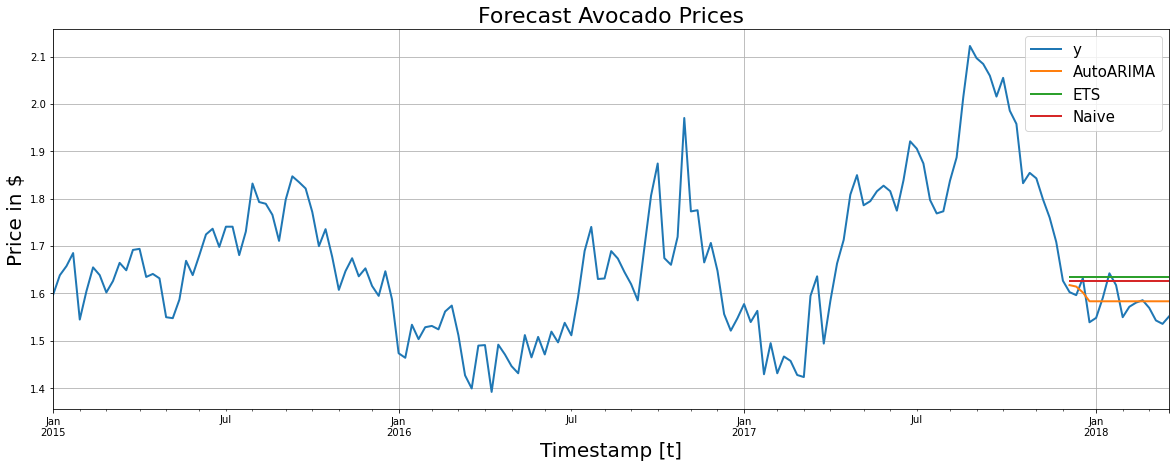

In [52]:
aux1_org = pd.DataFrame()
aux1_org['y'] = test_org['AveragePrice']
aux1_org['ds'] = test_org['Date']
aux1_org['unique_id'] = 1
y_pred = aux1_org.merge(y_pred, how='left', on=['unique_id', 'ds'])

fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df = pd.concat([aux_org, y_pred]).set_index('ds')
plot_df[['y', 'AutoARIMA', 'ETS', 'Naive']].plot(ax=ax, linewidth=2)
ax.set_title('Forecast Avocado Prices', fontsize=22)
ax.set_ylabel('Price in \\$', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [53]:
stf_pred = y_pred['AutoARIMA']

El resultat final és pràcticament igual de decebedor que el model anterior, amb una predicció pràcticament recta. Els problemes suposem que venen del mateix lloc que en el cas anterior, escasetat de mostres, tot i que no hi ha manera de demostrar-ho. Haurem de seguir buscant models.

#### Prophet

Prophet és un model de series temporals creat per Facebook. Utilitza moltes columnes amb informació sobre períodes, informació dels dies anteriors, etc. Es considera un dels millors models per a series temporals actuals.

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:Adding TBB (C:\Users\erics\anaconda3\lib\site-packages\prophet\stan_model\cmdstan-2.26.1\stan\lib\stan_math\lib\tbb) to PATH
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\erics\AppData\Local\Temp\tmpinzzzcrr\8mrehric.json
DEBUG:cmdstanpy:input tempfile: C:\Users\erics\AppData\Local\Temp\tmpinzzzcrr\_834q48o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\erics\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=70897', 'data', 'file=C:\\Users\\erics\\AppData\\Local\\Temp\\tmpinzzzcrr\\8mrehric.json', 'init=C:\\Users\\erics\\AppData\\Local\\Temp\\tmpinzzzcrr\\_834q48o.json', 'output', 'file=C:\\Users\\erics\\AppData\\Loca

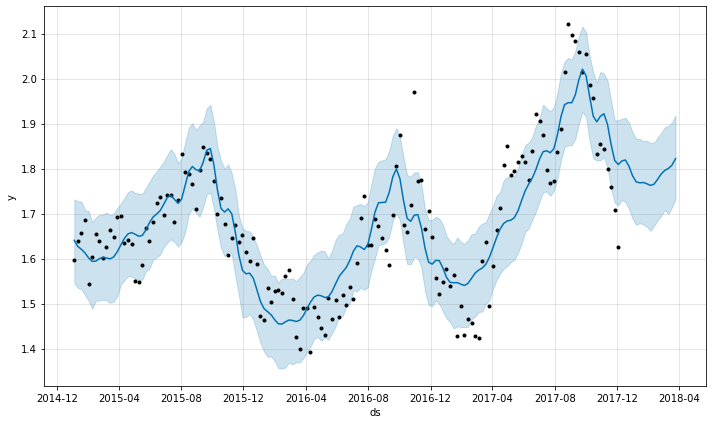

In [54]:
from prophet import Prophet

aux_org.drop('unique_id', axis=1, inplace=True)

m = Prophet()
m.fit(aux_org)
future = m.make_future_dataframe(periods=len(test_org), freq='W')
fcst = m.predict(future)
fig = m.plot(fcst)
prt_pred = fcst['yhat']

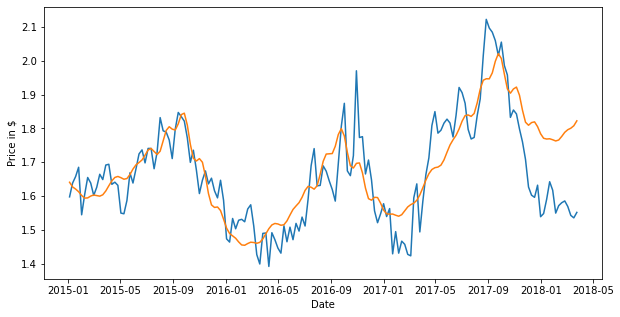

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=data_mean_org, x='Date', y='AveragePrice')
sns.lineplot(data=fcst, x='ds', y='yhat')
ax.set(ylabel='Price in \\$', xlabel='Date')
plt.show()

El model Prophet ens dona la primera predicció no plana! Aquesta llibreria és molt fàcil d'usar i està molt ben documentada, la gràfica resultat és molt ilustrativa, però la predicció podria ser millorable. El model de Facebook ens ha predit els preus tirant a l'alça, tot i això és el millor model fins al moment.

#### Regressió lineal

El model més senzill que podem usar és una regressió lineal multivariable. En funció de les variables, sense tenir en compte al temps, intentem predir els preus. Els resultats poden ser molt dolents

In [56]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_std_train_org,y_train_org)
lin_pred = reg.predict(x_std_test_org)

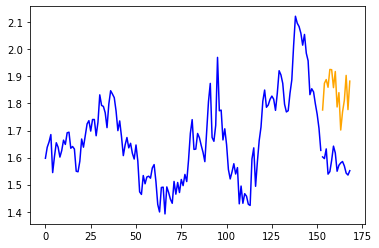

In [57]:
plt.plot(y_train_org, color='blue')
plt.plot(y_test_org, color='blue')
index = pd.Index(range(153,169))
plt.plot(pd.DataFrame(lin_pred).set_index(index), color='orange')

La regressió lineal multivariada ens ha fet una predicció força desviada de la realitat, com esperàvem. Tot i la distància, la tendència dels preus és força similar.

#### Random Forest

Un dels mètodes de Machine Learning més populars és el Random Forest. Aquest mètode classifica les observacions en fulles i les assigna un valor, el qual és el resultat dels valors d'entrenament que gan acabat en aquella mateixa fulla. A més, l'implementació de scikit-learn ens permet veure quines variables són les més importants per al mètode, molt útil a l'hora d'interpretar els resultats.

In [58]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(x_std_train_org, y_train_org)

rf_pred = regr.predict(x_std_test_org)

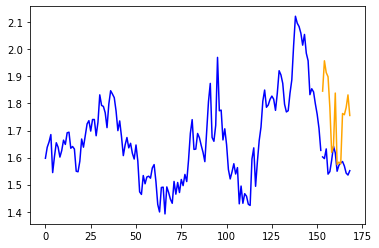

In [59]:
plt.plot(y_train_org, color='blue')
plt.plot(y_test_org, color='blue')
index = pd.Index(range(153,169))
plt.plot(pd.DataFrame(rf_pred).set_index(index), color='orange')

La predicció del Random Forest és... curiosa. Tot i coincidir amb el preu exacte un parell o tres de setmanes, la resta de preus estan molt lluny, fent que la tendència sigui molt caòtica. Per tant no és un bon model pel nostre problema.

In [60]:
print("Feature Importance:")
for feat, imp in zip(x_std_train_org.columns, regr.feature_importances_):
    print(feat+":", imp)

Feature Importance:
Total Avocados: 0.10507168861219815
Extra Large 4770: 0.42172432867474646
Large Bags: 0.1686704183695876
Large 4225: 0.13540578849086207
Total Bags: 0.1581318793908306
XLarge Bags: 0.010995896461775193


Sorprenentment la variable més important per al Random Forest és ``Extra Large 4770``, variable que havíem obervat que tenia poca correlació amb la variable objectiu, seguida de ``Large Bags`` i ``Total Bags``.

A continació optmitzarem els hiperparàmetres. Per aquest mètode i tots aquells que permetin optimització d'hiperparàmetres usarem la funció BayesSearchCV. BayesSearchCV és una funció d'optimització d'hiperparàmetres que usa optimització bayesiana, és a dir, va reduint l'espai de possibles variables fins a obtenir aquelles que minimitzen la funció loss triada.

In [61]:
from skopt import BayesSearchCV

# Optimització d'hiperparàmetres

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

rf_opt = BayesSearchCV(
    RandomForestRegressor(),
    {
        'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap
    },
    n_iter=32,
    cv=5
)

rf_opt.fit(x_std_train_org, y_train_org)

print("val. score: %s" % rf_opt.best_score_)
print("test score: %s" % rf_opt.score(x_std_test_org, y_test_org))
print("best params: %s" % str(rf_opt.best_params_))

C:\Users\erics\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\erics\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\erics\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\erics\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


val. score: -1.2565352815513802
test score: -44.30214801886428
best params: OrderedDict([('bootstrap', True), ('max_depth', 20), ('max_features', 'sqrt'), ('min_samples_leaf', 4), ('min_samples_split', 10), ('n_estimators', 200)])


Els millors paràmetres són:<br>
``('bootstrap', True), 
('max_depth', 100), 
('max_features', 'sqrt'), 
('min_samples_leaf', 4), 
('min_samples_split', 2), 
('n_estimators', 400)``

#### Catboost

CatBoost és un mètode de gradient boosting adaptat per poder usar variables categòriques. Treurem avantatge d'aquest fet i l'entrenarem amb el nom de les ciutats, obtenint així un model que pot predir el preu en funció de les ciutats, a diferència de la resta de models que s'han entrenat amb la mitjana dels preus a totes les ciutats.<br>

Aquest model té hiperparàmetres que podem optimitzar i per fer-ho usarem una funció que ja ve implementada a la llibreria catboost anomenada ``grid_search``, ja que les dades que introduïm al model han de passar una transformació no compatible amb la funció ``BayesSearchCV``.

In [62]:
import catboost as cb

cb_model = cb.CatBoostRegressor(loss_function='RMSE')

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

categorical_features_indices = np.where(x_train_cat.dtypes != np.float)[0]
cb_train = cb.Pool(x_train_cat, y_train_cat, cat_features=categorical_features_indices) 
cb_test = cb.Pool(x_test_cat, y_test_cat, cat_features=categorical_features_indices)

cb_model.grid_search(grid, cb_train)

C:\Users\erics\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\erics\AppData\Local\Temp/ipykernel_8376/3285686720.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(x_train_cat.dtypes != np.float)[0]


0:	learn: 1.3362438	test: 1.3590272	best: 1.3590272 (0)	total: 144ms	remaining: 14.3s
1:	learn: 1.2971539	test: 1.3216762	best: 1.3216762 (1)	total: 153ms	remaining: 7.51s
2:	learn: 1.2597624	test: 1.2840866	best: 1.2840866 (2)	total: 158ms	remaining: 5.09s
3:	learn: 1.2240289	test: 1.2474252	best: 1.2474252 (3)	total: 162ms	remaining: 3.88s
4:	learn: 1.1888325	test: 1.2119280	best: 1.2119280 (4)	total: 169ms	remaining: 3.21s
5:	learn: 1.1546340	test: 1.1783969	best: 1.1783969 (5)	total: 176ms	remaining: 2.75s
6:	learn: 1.1223841	test: 1.1471986	best: 1.1471986 (6)	total: 182ms	remaining: 2.41s
7:	learn: 1.0907633	test: 1.1157859	best: 1.1157859 (7)	total: 188ms	remaining: 2.16s
8:	learn: 1.0600440	test: 1.0858037	best: 1.0858037 (8)	total: 194ms	remaining: 1.96s
9:	learn: 1.0301688	test: 1.0559819	best: 1.0559819 (9)	total: 199ms	remaining: 1.79s
10:	learn: 1.0017794	test: 1.0278176	best: 1.0278176 (10)	total: 206ms	remaining: 1.66s
11:	learn: 0.9741761	test: 1.0002260	best: 1.0002260

94:	learn: 0.1920028	test: 0.2690594	best: 0.2690594 (94)	total: 689ms	remaining: 36.3ms
95:	learn: 0.1906055	test: 0.2683535	best: 0.2683535 (95)	total: 695ms	remaining: 28.9ms
96:	learn: 0.1892224	test: 0.2677646	best: 0.2677646 (96)	total: 700ms	remaining: 21.6ms
97:	learn: 0.1880680	test: 0.2668219	best: 0.2668219 (97)	total: 706ms	remaining: 14.4ms
98:	learn: 0.1867337	test: 0.2658506	best: 0.2658506 (98)	total: 711ms	remaining: 7.18ms
99:	learn: 0.1852042	test: 0.2653611	best: 0.2653611 (99)	total: 716ms	remaining: 0us

bestTest = 0.2653611343
bestIteration = 99

0:	loss: 0.2653611	best: 0.2653611 (0)	total: 762ms	remaining: 1m 12s
0:	learn: 1.2439947	test: 1.2665491	best: 1.2665491 (0)	total: 4.15ms	remaining: 411ms
1:	learn: 1.1231095	test: 1.1514101	best: 1.1514101 (1)	total: 11.6ms	remaining: 566ms
2:	learn: 1.0163300	test: 1.0441669	best: 1.0441669 (2)	total: 15.3ms	remaining: 496ms
3:	learn: 0.9217319	test: 0.9472389	best: 0.9472389 (3)	total: 18.5ms	remaining: 444ms
4:	lea

92:	learn: 0.1223026	test: 0.2295661	best: 0.2295661 (92)	total: 523ms	remaining: 39.4ms
93:	learn: 0.1212859	test: 0.2253616	best: 0.2253616 (93)	total: 529ms	remaining: 33.7ms
94:	learn: 0.1203194	test: 0.2249751	best: 0.2249751 (94)	total: 534ms	remaining: 28.1ms
95:	learn: 0.1201215	test: 0.2248893	best: 0.2248893 (95)	total: 540ms	remaining: 22.5ms
96:	learn: 0.1198272	test: 0.2244579	best: 0.2244579 (96)	total: 548ms	remaining: 16.9ms
97:	learn: 0.1194507	test: 0.2243811	best: 0.2243811 (97)	total: 555ms	remaining: 11.3ms
98:	learn: 0.1193070	test: 0.2245750	best: 0.2243811 (97)	total: 561ms	remaining: 5.67ms
99:	learn: 0.1192765	test: 0.2245293	best: 0.2243811 (97)	total: 567ms	remaining: 0us

bestTest = 0.2243810616
bestIteration = 97

1:	loss: 0.2243811	best: 0.2243811 (1)	total: 1.34s	remaining: 1m 3s
0:	learn: 1.3365094	test: 1.3592714	best: 1.3592714 (0)	total: 3.25ms	remaining: 322ms
1:	learn: 1.2976892	test: 1.3221756	best: 1.3221756 (1)	total: 8.83ms	remaining: 433ms
2:	

18:	learn: 0.2800193	test: 0.3277443	best: 0.3277443 (18)	total: 92ms	remaining: 392ms
19:	learn: 0.2630587	test: 0.3171859	best: 0.3171859 (19)	total: 97.3ms	remaining: 389ms
20:	learn: 0.2511953	test: 0.3059370	best: 0.3059370 (20)	total: 102ms	remaining: 385ms
21:	learn: 0.2392576	test: 0.2975328	best: 0.2975328 (21)	total: 107ms	remaining: 381ms
22:	learn: 0.2276946	test: 0.2912565	best: 0.2912565 (22)	total: 112ms	remaining: 376ms
23:	learn: 0.2175044	test: 0.2837021	best: 0.2837021 (23)	total: 118ms	remaining: 372ms
24:	learn: 0.2106187	test: 0.2789655	best: 0.2789655 (24)	total: 125ms	remaining: 375ms
25:	learn: 0.2031613	test: 0.2750441	best: 0.2750441 (25)	total: 132ms	remaining: 375ms
26:	learn: 0.1956906	test: 0.2704830	best: 0.2704830 (26)	total: 137ms	remaining: 371ms
27:	learn: 0.1911195	test: 0.2672579	best: 0.2672579 (27)	total: 143ms	remaining: 367ms
28:	learn: 0.1879468	test: 0.2640535	best: 0.2640535 (28)	total: 149ms	remaining: 364ms
29:	learn: 0.1851921	test: 0.261

17:	learn: 0.8310172	test: 0.8552309	best: 0.8552309 (17)	total: 93.7ms	remaining: 427ms
18:	learn: 0.8083990	test: 0.8332368	best: 0.8332368 (18)	total: 100ms	remaining: 426ms
19:	learn: 0.7870482	test: 0.8120840	best: 0.8120840 (19)	total: 105ms	remaining: 420ms
20:	learn: 0.7658487	test: 0.7906873	best: 0.7906873 (20)	total: 111ms	remaining: 419ms
21:	learn: 0.7457818	test: 0.7709538	best: 0.7709538 (21)	total: 117ms	remaining: 415ms
22:	learn: 0.7263179	test: 0.7514230	best: 0.7514230 (22)	total: 123ms	remaining: 412ms
23:	learn: 0.7073631	test: 0.7319445	best: 0.7319445 (23)	total: 128ms	remaining: 406ms
24:	learn: 0.6888666	test: 0.7136522	best: 0.7136522 (24)	total: 134ms	remaining: 401ms
25:	learn: 0.6707117	test: 0.6961481	best: 0.6961481 (25)	total: 139ms	remaining: 396ms
26:	learn: 0.6537158	test: 0.6792846	best: 0.6792846 (26)	total: 144ms	remaining: 390ms
27:	learn: 0.6366769	test: 0.6628960	best: 0.6628960 (27)	total: 150ms	remaining: 385ms
28:	learn: 0.6201775	test: 0.64

12:	learn: 0.4220060	test: 0.4588908	best: 0.4588908 (12)	total: 70.8ms	remaining: 474ms
13:	learn: 0.3920916	test: 0.4300594	best: 0.4300594 (13)	total: 76ms	remaining: 467ms
14:	learn: 0.3643537	test: 0.4029701	best: 0.4029701 (14)	total: 82ms	remaining: 464ms
15:	learn: 0.3412894	test: 0.3799826	best: 0.3799826 (15)	total: 87.6ms	remaining: 460ms
16:	learn: 0.3203671	test: 0.3603159	best: 0.3603159 (16)	total: 93ms	remaining: 454ms
17:	learn: 0.3020836	test: 0.3435465	best: 0.3435465 (17)	total: 99.2ms	remaining: 452ms
18:	learn: 0.2862895	test: 0.3290145	best: 0.3290145 (18)	total: 104ms	remaining: 445ms
19:	learn: 0.2687326	test: 0.3180716	best: 0.3180716 (19)	total: 109ms	remaining: 438ms
20:	learn: 0.2568488	test: 0.3068127	best: 0.3068127 (20)	total: 116ms	remaining: 437ms
21:	learn: 0.2437249	test: 0.2966690	best: 0.2966690 (21)	total: 121ms	remaining: 430ms
22:	learn: 0.2321781	test: 0.2903199	best: 0.2903199 (22)	total: 127ms	remaining: 426ms
23:	learn: 0.2212449	test: 0.283

6:	learn: 1.1359343	test: 1.1601234	best: 1.1601234 (6)	total: 31.5ms	remaining: 419ms
7:	learn: 1.1054846	test: 1.1298829	best: 1.1298829 (7)	total: 36.8ms	remaining: 423ms
8:	learn: 1.0771303	test: 1.1016052	best: 1.1016052 (8)	total: 41.7ms	remaining: 422ms
9:	learn: 1.0485849	test: 1.0730872	best: 1.0730872 (9)	total: 46.8ms	remaining: 421ms
10:	learn: 1.0210948	test: 1.0457616	best: 1.0457616 (10)	total: 51.9ms	remaining: 420ms
11:	learn: 0.9941920	test: 1.0187239	best: 1.0187239 (11)	total: 57.5ms	remaining: 422ms
12:	learn: 0.9677012	test: 0.9916922	best: 0.9916922 (12)	total: 63.5ms	remaining: 425ms
13:	learn: 0.9425041	test: 0.9665478	best: 0.9665478 (13)	total: 69.4ms	remaining: 426ms
14:	learn: 0.9173765	test: 0.9410180	best: 0.9410180 (14)	total: 75.2ms	remaining: 426ms
15:	learn: 0.8940072	test: 0.9174812	best: 0.9174812 (15)	total: 81ms	remaining: 425ms
16:	learn: 0.8705574	test: 0.8941023	best: 0.8941023 (16)	total: 88.6ms	remaining: 433ms
17:	learn: 0.8480337	test: 0.87

99:	learn: 0.1973741	test: 0.2703015	best: 0.2703015 (99)	total: 583ms	remaining: 0us

bestTest = 0.2703015028
bestIteration = 99

6:	loss: 0.2703015	best: 0.2243811 (1)	total: 4.29s	remaining: 54.6s
0:	learn: 1.2516567	test: 1.2736806	best: 1.2736806 (0)	total: 2.93ms	remaining: 290ms
1:	learn: 1.1375882	test: 1.1649559	best: 1.1649559 (1)	total: 8.09ms	remaining: 396ms
2:	learn: 1.0357849	test: 1.0628530	best: 1.0628530 (2)	total: 11.3ms	remaining: 364ms
3:	learn: 0.9455839	test: 0.9696179	best: 0.9696179 (3)	total: 14.2ms	remaining: 341ms
4:	learn: 0.8619274	test: 0.8846547	best: 0.8846547 (4)	total: 20ms	remaining: 379ms
5:	learn: 0.7862232	test: 0.8113015	best: 0.8113015 (5)	total: 25.2ms	remaining: 394ms
6:	learn: 0.7190015	test: 0.7475122	best: 0.7475122 (6)	total: 30.6ms	remaining: 406ms
7:	learn: 0.6583777	test: 0.6877555	best: 0.6877555 (7)	total: 36.4ms	remaining: 419ms
8:	learn: 0.6064916	test: 0.6371850	best: 0.6371850 (8)	total: 41.6ms	remaining: 420ms
9:	learn: 0.5579405

1:	learn: 1.2971539	test: 1.3216762	best: 1.3216762 (1)	total: 10.4ms	remaining: 771ms
2:	learn: 1.2597624	test: 1.2840866	best: 1.2840866 (2)	total: 14.1ms	remaining: 693ms
3:	learn: 1.2240289	test: 1.2474252	best: 1.2474252 (3)	total: 17.6ms	remaining: 641ms
4:	learn: 1.1888325	test: 1.2119280	best: 1.2119280 (4)	total: 23.4ms	remaining: 679ms
5:	learn: 1.1546340	test: 1.1783969	best: 1.1783969 (5)	total: 29ms	remaining: 696ms
6:	learn: 1.1223841	test: 1.1471986	best: 1.1471986 (6)	total: 35.1ms	remaining: 718ms
7:	learn: 1.0907633	test: 1.1157859	best: 1.1157859 (7)	total: 43.3ms	remaining: 769ms
8:	learn: 1.0600440	test: 1.0858037	best: 1.0858037 (8)	total: 50.2ms	remaining: 787ms
9:	learn: 1.0301688	test: 1.0559819	best: 1.0559819 (9)	total: 55.9ms	remaining: 783ms
10:	learn: 1.0017794	test: 1.0278176	best: 1.0278176 (10)	total: 61.3ms	remaining: 774ms
11:	learn: 0.9741761	test: 1.0002260	best: 1.0002260 (11)	total: 66.2ms	remaining: 761ms
12:	learn: 0.9468705	test: 0.9724728	best

100:	learn: 0.1844144	test: 0.2646450	best: 0.2646450 (100)	total: 563ms	remaining: 273ms
101:	learn: 0.1833164	test: 0.2638043	best: 0.2638043 (101)	total: 568ms	remaining: 268ms
102:	learn: 0.1826321	test: 0.2633193	best: 0.2633193 (102)	total: 574ms	remaining: 262ms
103:	learn: 0.1816442	test: 0.2628523	best: 0.2628523 (103)	total: 580ms	remaining: 257ms
104:	learn: 0.1805392	test: 0.2620082	best: 0.2620082 (104)	total: 585ms	remaining: 251ms
105:	learn: 0.1798185	test: 0.2613112	best: 0.2613112 (105)	total: 591ms	remaining: 245ms
106:	learn: 0.1785926	test: 0.2608031	best: 0.2608031 (106)	total: 597ms	remaining: 240ms
107:	learn: 0.1778596	test: 0.2602084	best: 0.2602084 (107)	total: 602ms	remaining: 234ms
108:	learn: 0.1767142	test: 0.2599457	best: 0.2599457 (108)	total: 608ms	remaining: 229ms
109:	learn: 0.1756041	test: 0.2597945	best: 0.2597945 (109)	total: 613ms	remaining: 223ms
110:	learn: 0.1746017	test: 0.2594132	best: 0.2594132 (110)	total: 618ms	remaining: 217ms
111:	learn

50:	learn: 0.1473332	test: 0.2456281	best: 0.2456281 (50)	total: 279ms	remaining: 542ms
51:	learn: 0.1469112	test: 0.2451512	best: 0.2451512 (51)	total: 286ms	remaining: 538ms
52:	learn: 0.1457921	test: 0.2457950	best: 0.2451512 (51)	total: 291ms	remaining: 532ms
53:	learn: 0.1450593	test: 0.2461602	best: 0.2451512 (51)	total: 296ms	remaining: 526ms
54:	learn: 0.1445911	test: 0.2454080	best: 0.2451512 (51)	total: 301ms	remaining: 520ms
55:	learn: 0.1439691	test: 0.2458089	best: 0.2451512 (51)	total: 306ms	remaining: 514ms
56:	learn: 0.1432533	test: 0.2453943	best: 0.2451512 (51)	total: 311ms	remaining: 508ms
57:	learn: 0.1421930	test: 0.2468577	best: 0.2451512 (51)	total: 316ms	remaining: 502ms
58:	learn: 0.1415663	test: 0.2466902	best: 0.2451512 (51)	total: 322ms	remaining: 496ms
59:	learn: 0.1410606	test: 0.2461517	best: 0.2451512 (51)	total: 327ms	remaining: 490ms
60:	learn: 0.1405822	test: 0.2459967	best: 0.2451512 (51)	total: 332ms	remaining: 484ms
61:	learn: 0.1397598	test: 0.245

9:	loss: 0.2128280	best: 0.2128280 (9)	total: 6.54s	remaining: 56.2s
0:	learn: 1.3365094	test: 1.3592714	best: 1.3592714 (0)	total: 3.07ms	remaining: 457ms
1:	learn: 1.2976892	test: 1.3221756	best: 1.3221756 (1)	total: 8.81ms	remaining: 652ms
2:	learn: 1.2605360	test: 1.2848336	best: 1.2848336 (2)	total: 12.6ms	remaining: 617ms
3:	learn: 1.2250675	test: 1.2483906	best: 1.2483906 (3)	total: 15.9ms	remaining: 579ms
4:	learn: 1.1901085	test: 1.2130595	best: 1.2130595 (4)	total: 21.1ms	remaining: 613ms
5:	learn: 1.1560961	test: 1.1797308	best: 1.1797308 (5)	total: 26.5ms	remaining: 636ms
6:	learn: 1.1239930	test: 1.1486832	best: 1.1486832 (6)	total: 31.5ms	remaining: 643ms
7:	learn: 1.0925122	test: 1.1174300	best: 1.1174300 (7)	total: 36.6ms	remaining: 650ms
8:	learn: 1.0621299	test: 1.0876383	best: 1.0876383 (8)	total: 42ms	remaining: 658ms
9:	learn: 1.0323988	test: 1.0579569	best: 1.0579569 (9)	total: 47.3ms	remaining: 662ms
10:	learn: 1.0041209	test: 1.0298947	best: 1.0298947 (10)	total

97:	learn: 0.1889301	test: 0.2699215	best: 0.2699215 (97)	total: 554ms	remaining: 294ms
98:	learn: 0.1875747	test: 0.2689322	best: 0.2689322 (98)	total: 559ms	remaining: 288ms
99:	learn: 0.1860836	test: 0.2684154	best: 0.2684154 (99)	total: 565ms	remaining: 282ms
100:	learn: 0.1852543	test: 0.2676605	best: 0.2676605 (100)	total: 570ms	remaining: 276ms
101:	learn: 0.1841272	test: 0.2667988	best: 0.2667988 (101)	total: 575ms	remaining: 271ms
102:	learn: 0.1834363	test: 0.2662854	best: 0.2662854 (102)	total: 580ms	remaining: 265ms
103:	learn: 0.1824236	test: 0.2657954	best: 0.2657954 (103)	total: 585ms	remaining: 259ms
104:	learn: 0.1813013	test: 0.2649407	best: 0.2649407 (104)	total: 590ms	remaining: 253ms
105:	learn: 0.1805417	test: 0.2642002	best: 0.2642002 (105)	total: 597ms	remaining: 248ms
106:	learn: 0.1793286	test: 0.2636785	best: 0.2636785 (106)	total: 602ms	remaining: 242ms
107:	learn: 0.1785584	test: 0.2630554	best: 0.2630554 (107)	total: 607ms	remaining: 236ms
108:	learn: 0.17

53:	learn: 0.1479922	test: 0.2467578	best: 0.2457437 (51)	total: 271ms	remaining: 482ms
54:	learn: 0.1476069	test: 0.2466265	best: 0.2457437 (51)	total: 276ms	remaining: 477ms
55:	learn: 0.1469301	test: 0.2470471	best: 0.2457437 (51)	total: 282ms	remaining: 473ms
56:	learn: 0.1463843	test: 0.2466575	best: 0.2457437 (51)	total: 286ms	remaining: 467ms
57:	learn: 0.1457951	test: 0.2457199	best: 0.2457199 (57)	total: 292ms	remaining: 463ms
58:	learn: 0.1452654	test: 0.2455826	best: 0.2455826 (58)	total: 297ms	remaining: 457ms
59:	learn: 0.1447623	test: 0.2450980	best: 0.2450980 (59)	total: 302ms	remaining: 453ms
60:	learn: 0.1431386	test: 0.2441176	best: 0.2441176 (60)	total: 307ms	remaining: 447ms
61:	learn: 0.1427937	test: 0.2437384	best: 0.2437384 (61)	total: 312ms	remaining: 444ms
62:	learn: 0.1425369	test: 0.2433879	best: 0.2433879 (62)	total: 318ms	remaining: 439ms
63:	learn: 0.1422166	test: 0.2435634	best: 0.2433879 (62)	total: 323ms	remaining: 434ms
64:	learn: 0.1416994	test: 0.243

8:	learn: 1.0654142	test: 1.0905981	best: 1.0905981 (8)	total: 41.3ms	remaining: 646ms
9:	learn: 1.0359237	test: 1.0611519	best: 1.0611519 (9)	total: 46.4ms	remaining: 649ms
10:	learn: 1.0078224	test: 1.0332529	best: 1.0332529 (10)	total: 51.7ms	remaining: 654ms
11:	learn: 0.9804227	test: 1.0058165	best: 1.0058165 (11)	total: 57.3ms	remaining: 659ms
12:	learn: 0.9533510	test: 0.9782666	best: 0.9782666 (12)	total: 62.3ms	remaining: 656ms
13:	learn: 0.9274816	test: 0.9524706	best: 0.9524706 (13)	total: 67.4ms	remaining: 655ms
14:	learn: 0.9017905	test: 0.9264267	best: 0.9264267 (14)	total: 72.3ms	remaining: 651ms
15:	learn: 0.8776055	test: 0.9017063	best: 0.9017063 (15)	total: 77.5ms	remaining: 649ms
16:	learn: 0.8536899	test: 0.8778560	best: 0.8778560 (16)	total: 82.7ms	remaining: 647ms
17:	learn: 0.8310172	test: 0.8552309	best: 0.8552309 (17)	total: 88.1ms	remaining: 646ms
18:	learn: 0.8083990	test: 0.8332368	best: 0.8332368 (18)	total: 92.9ms	remaining: 641ms
19:	learn: 0.7870482	test

113:	learn: 0.1750220	test: 0.2616239	best: 0.2616239 (113)	total: 595ms	remaining: 188ms
114:	learn: 0.1741905	test: 0.2614891	best: 0.2614891 (114)	total: 601ms	remaining: 183ms
115:	learn: 0.1730990	test: 0.2609136	best: 0.2609136 (115)	total: 606ms	remaining: 178ms
116:	learn: 0.1726180	test: 0.2605729	best: 0.2605729 (116)	total: 611ms	remaining: 172ms
117:	learn: 0.1717902	test: 0.2606065	best: 0.2605729 (116)	total: 616ms	remaining: 167ms
118:	learn: 0.1714965	test: 0.2603306	best: 0.2603306 (118)	total: 621ms	remaining: 162ms
119:	learn: 0.1712013	test: 0.2601323	best: 0.2601323 (119)	total: 627ms	remaining: 157ms
120:	learn: 0.1706688	test: 0.2596204	best: 0.2596204 (120)	total: 632ms	remaining: 151ms
121:	learn: 0.1699454	test: 0.2591291	best: 0.2591291 (121)	total: 637ms	remaining: 146ms
122:	learn: 0.1696309	test: 0.2590546	best: 0.2590546 (122)	total: 644ms	remaining: 141ms
123:	learn: 0.1691962	test: 0.2588427	best: 0.2588427 (123)	total: 649ms	remaining: 136ms
124:	learn

62:	learn: 0.1435966	test: 0.2389165	best: 0.2389165 (62)	total: 355ms	remaining: 490ms
63:	learn: 0.1432737	test: 0.2390822	best: 0.2389165 (62)	total: 360ms	remaining: 484ms
64:	learn: 0.1426842	test: 0.2386651	best: 0.2386651 (64)	total: 366ms	remaining: 479ms
65:	learn: 0.1421544	test: 0.2378840	best: 0.2378840 (65)	total: 372ms	remaining: 473ms
66:	learn: 0.1414820	test: 0.2380250	best: 0.2378840 (65)	total: 377ms	remaining: 467ms
67:	learn: 0.1402162	test: 0.2370760	best: 0.2370760 (67)	total: 383ms	remaining: 462ms
68:	learn: 0.1400491	test: 0.2364078	best: 0.2364078 (68)	total: 388ms	remaining: 456ms
69:	learn: 0.1396241	test: 0.2363792	best: 0.2363792 (69)	total: 393ms	remaining: 449ms
70:	learn: 0.1391836	test: 0.2363610	best: 0.2363610 (70)	total: 398ms	remaining: 443ms
71:	learn: 0.1386191	test: 0.2365109	best: 0.2363610 (70)	total: 404ms	remaining: 438ms
72:	learn: 0.1382937	test: 0.2364473	best: 0.2363610 (70)	total: 409ms	remaining: 432ms
73:	learn: 0.1381518	test: 0.236

16:	learn: 0.8705574	test: 0.8941023	best: 0.8941023 (16)	total: 89.7ms	remaining: 702ms
17:	learn: 0.8480337	test: 0.8715262	best: 0.8715262 (17)	total: 95.4ms	remaining: 699ms
18:	learn: 0.8258146	test: 0.8498994	best: 0.8498994 (18)	total: 101ms	remaining: 694ms
19:	learn: 0.8044921	test: 0.8287366	best: 0.8287366 (19)	total: 106ms	remaining: 687ms
20:	learn: 0.7836256	test: 0.8075684	best: 0.8075684 (20)	total: 111ms	remaining: 684ms
21:	learn: 0.7636664	test: 0.7877630	best: 0.7877630 (21)	total: 116ms	remaining: 678ms
22:	learn: 0.7444687	test: 0.7684380	best: 0.7684380 (22)	total: 122ms	remaining: 674ms
23:	learn: 0.7256517	test: 0.7489498	best: 0.7489498 (23)	total: 128ms	remaining: 674ms
24:	learn: 0.7074220	test: 0.7308450	best: 0.7308450 (24)	total: 134ms	remaining: 671ms
25:	learn: 0.6894444	test: 0.7135175	best: 0.7135175 (25)	total: 140ms	remaining: 666ms
26:	learn: 0.6724688	test: 0.6966399	best: 0.6966399 (26)	total: 145ms	remaining: 660ms
27:	learn: 0.6559537	test: 0.6

118:	learn: 0.1786434	test: 0.2607612	best: 0.2607612 (118)	total: 639ms	remaining: 167ms
119:	learn: 0.1782835	test: 0.2604688	best: 0.2604688 (119)	total: 644ms	remaining: 161ms
120:	learn: 0.1774293	test: 0.2599888	best: 0.2599888 (120)	total: 649ms	remaining: 156ms
121:	learn: 0.1768035	test: 0.2597741	best: 0.2597741 (121)	total: 654ms	remaining: 150ms
122:	learn: 0.1763829	test: 0.2594589	best: 0.2594589 (122)	total: 659ms	remaining: 145ms
123:	learn: 0.1758283	test: 0.2591904	best: 0.2591904 (123)	total: 664ms	remaining: 139ms
124:	learn: 0.1754841	test: 0.2588306	best: 0.2588306 (124)	total: 669ms	remaining: 134ms
125:	learn: 0.1750463	test: 0.2588350	best: 0.2588306 (124)	total: 674ms	remaining: 128ms
126:	learn: 0.1742503	test: 0.2582127	best: 0.2582127 (126)	total: 679ms	remaining: 123ms
127:	learn: 0.1735555	test: 0.2576744	best: 0.2576744 (127)	total: 684ms	remaining: 118ms
128:	learn: 0.1729581	test: 0.2575382	best: 0.2575382 (128)	total: 689ms	remaining: 112ms
129:	learn

75:	learn: 0.1468998	test: 0.2435384	best: 0.2425500 (71)	total: 390ms	remaining: 380ms
76:	learn: 0.1466450	test: 0.2439340	best: 0.2425500 (71)	total: 397ms	remaining: 376ms
77:	learn: 0.1456242	test: 0.2435354	best: 0.2425500 (71)	total: 402ms	remaining: 371ms
78:	learn: 0.1453609	test: 0.2435012	best: 0.2425500 (71)	total: 407ms	remaining: 366ms
79:	learn: 0.1450537	test: 0.2434877	best: 0.2425500 (71)	total: 413ms	remaining: 361ms
80:	learn: 0.1448083	test: 0.2434773	best: 0.2425500 (71)	total: 420ms	remaining: 357ms
81:	learn: 0.1445967	test: 0.2432394	best: 0.2425500 (71)	total: 425ms	remaining: 353ms
82:	learn: 0.1442539	test: 0.2429877	best: 0.2425500 (71)	total: 431ms	remaining: 348ms
83:	learn: 0.1439808	test: 0.2428680	best: 0.2425500 (71)	total: 436ms	remaining: 343ms
84:	learn: 0.1437253	test: 0.2428602	best: 0.2425500 (71)	total: 442ms	remaining: 338ms
85:	learn: 0.1434489	test: 0.2429908	best: 0.2425500 (71)	total: 447ms	remaining: 332ms
86:	learn: 0.1423958	test: 0.242

21:	learn: 0.7344779	test: 0.7656516	best: 0.7656516 (21)	total: 117ms	remaining: 946ms
22:	learn: 0.7154507	test: 0.7471822	best: 0.7471822 (22)	total: 122ms	remaining: 940ms
23:	learn: 0.6957037	test: 0.7276938	best: 0.7276938 (23)	total: 127ms	remaining: 933ms
24:	learn: 0.6762819	test: 0.7094578	best: 0.7094578 (24)	total: 132ms	remaining: 927ms
25:	learn: 0.6577059	test: 0.6910280	best: 0.6910280 (25)	total: 138ms	remaining: 922ms
26:	learn: 0.6403957	test: 0.6739932	best: 0.6739932 (26)	total: 143ms	remaining: 917ms
27:	learn: 0.6238289	test: 0.6579657	best: 0.6579657 (27)	total: 149ms	remaining: 914ms
28:	learn: 0.6077437	test: 0.6421246	best: 0.6421246 (28)	total: 154ms	remaining: 907ms
29:	learn: 0.5919204	test: 0.6268399	best: 0.6268399 (29)	total: 159ms	remaining: 901ms
30:	learn: 0.5766894	test: 0.6120931	best: 0.6120931 (30)	total: 164ms	remaining: 895ms
31:	learn: 0.5615518	test: 0.5973384	best: 0.5973384 (31)	total: 169ms	remaining: 889ms
32:	learn: 0.5470446	test: 0.584

119:	learn: 0.1725770	test: 0.2606150	best: 0.2606150 (119)	total: 676ms	remaining: 451ms
120:	learn: 0.1719636	test: 0.2599288	best: 0.2599288 (120)	total: 683ms	remaining: 446ms
121:	learn: 0.1717433	test: 0.2597225	best: 0.2597225 (121)	total: 689ms	remaining: 441ms
122:	learn: 0.1713322	test: 0.2592938	best: 0.2592938 (122)	total: 696ms	remaining: 435ms
123:	learn: 0.1710414	test: 0.2590521	best: 0.2590521 (123)	total: 702ms	remaining: 430ms
124:	learn: 0.1703281	test: 0.2589708	best: 0.2589708 (124)	total: 709ms	remaining: 426ms
125:	learn: 0.1699570	test: 0.2587625	best: 0.2587625 (125)	total: 715ms	remaining: 420ms
126:	learn: 0.1693313	test: 0.2585217	best: 0.2585217 (126)	total: 720ms	remaining: 414ms
127:	learn: 0.1689496	test: 0.2580777	best: 0.2580777 (127)	total: 726ms	remaining: 408ms
128:	learn: 0.1686648	test: 0.2579016	best: 0.2579016 (128)	total: 732ms	remaining: 403ms
129:	learn: 0.1684660	test: 0.2576944	best: 0.2576944 (129)	total: 738ms	remaining: 397ms
130:	learn

32:	learn: 0.1756364	test: 0.2724609	best: 0.2724609 (32)	total: 182ms	remaining: 923ms
33:	learn: 0.1737314	test: 0.2705364	best: 0.2705364 (33)	total: 189ms	remaining: 924ms
34:	learn: 0.1727797	test: 0.2697525	best: 0.2697525 (34)	total: 195ms	remaining: 920ms
35:	learn: 0.1704703	test: 0.2696007	best: 0.2696007 (35)	total: 202ms	remaining: 920ms
36:	learn: 0.1694074	test: 0.2686840	best: 0.2686840 (36)	total: 209ms	remaining: 919ms
37:	learn: 0.1671488	test: 0.2667130	best: 0.2667130 (37)	total: 214ms	remaining: 914ms
38:	learn: 0.1662508	test: 0.2661332	best: 0.2661332 (38)	total: 220ms	remaining: 909ms
39:	learn: 0.1644512	test: 0.2625871	best: 0.2625871 (39)	total: 226ms	remaining: 904ms
40:	learn: 0.1632845	test: 0.2606595	best: 0.2606595 (40)	total: 232ms	remaining: 898ms
41:	learn: 0.1623492	test: 0.2590718	best: 0.2590718 (41)	total: 238ms	remaining: 894ms
42:	learn: 0.1614314	test: 0.2599068	best: 0.2590718 (41)	total: 243ms	remaining: 889ms
43:	learn: 0.1608297	test: 0.259

125:	learn: 0.1106885	test: 0.2377093	best: 0.2377093 (125)	total: 734ms	remaining: 431ms
126:	learn: 0.1102212	test: 0.2375442	best: 0.2375442 (126)	total: 741ms	remaining: 426ms
127:	learn: 0.1097000	test: 0.2372607	best: 0.2372607 (127)	total: 746ms	remaining: 420ms
128:	learn: 0.1094424	test: 0.2372546	best: 0.2372546 (128)	total: 751ms	remaining: 414ms
129:	learn: 0.1086284	test: 0.2333897	best: 0.2333897 (129)	total: 756ms	remaining: 407ms
130:	learn: 0.1085152	test: 0.2335363	best: 0.2333897 (129)	total: 762ms	remaining: 401ms
131:	learn: 0.1076358	test: 0.2330924	best: 0.2330924 (131)	total: 767ms	remaining: 395ms
132:	learn: 0.1075480	test: 0.2332097	best: 0.2330924 (131)	total: 773ms	remaining: 389ms
133:	learn: 0.1066425	test: 0.2329318	best: 0.2329318 (133)	total: 778ms	remaining: 383ms
134:	learn: 0.1064678	test: 0.2327961	best: 0.2327961 (134)	total: 783ms	remaining: 377ms
135:	learn: 0.1060968	test: 0.2327026	best: 0.2327026 (135)	total: 788ms	remaining: 371ms
136:	learn

24:	learn: 0.6798274	test: 0.7126186	best: 0.7126186 (24)	total: 150ms	remaining: 1.05s
25:	learn: 0.6612630	test: 0.6941949	best: 0.6941949 (25)	total: 157ms	remaining: 1.05s
26:	learn: 0.6439500	test: 0.6771440	best: 0.6771440 (26)	total: 164ms	remaining: 1.05s
27:	learn: 0.6273831	test: 0.6611050	best: 0.6611050 (27)	total: 172ms	remaining: 1.05s
28:	learn: 0.6112754	test: 0.6452319	best: 0.6452319 (28)	total: 180ms	remaining: 1.06s
29:	learn: 0.5954662	test: 0.6299502	best: 0.6299502 (29)	total: 188ms	remaining: 1.06s
30:	learn: 0.5802344	test: 0.6151827	best: 0.6151827 (30)	total: 195ms	remaining: 1.06s
31:	learn: 0.5650721	test: 0.6003965	best: 0.6003965 (31)	total: 202ms	remaining: 1.06s
32:	learn: 0.5505533	test: 0.5874502	best: 0.5874502 (32)	total: 208ms	remaining: 1.05s
33:	learn: 0.5370259	test: 0.5744557	best: 0.5744557 (33)	total: 215ms	remaining: 1.05s
34:	learn: 0.5241300	test: 0.5620003	best: 0.5620003 (34)	total: 221ms	remaining: 1.04s
35:	learn: 0.5107763	test: 0.549

139:	learn: 0.1657138	test: 0.2568212	best: 0.2565093 (138)	total: 887ms	remaining: 380ms
140:	learn: 0.1655773	test: 0.2567790	best: 0.2565093 (138)	total: 893ms	remaining: 374ms
141:	learn: 0.1649746	test: 0.2568018	best: 0.2565093 (138)	total: 899ms	remaining: 367ms
142:	learn: 0.1647791	test: 0.2566278	best: 0.2565093 (138)	total: 906ms	remaining: 361ms
143:	learn: 0.1646835	test: 0.2565503	best: 0.2565093 (138)	total: 913ms	remaining: 355ms
144:	learn: 0.1640577	test: 0.2561574	best: 0.2561574 (144)	total: 919ms	remaining: 348ms
145:	learn: 0.1635479	test: 0.2558058	best: 0.2558058 (145)	total: 924ms	remaining: 342ms
146:	learn: 0.1634080	test: 0.2559545	best: 0.2558058 (145)	total: 929ms	remaining: 335ms
147:	learn: 0.1632234	test: 0.2556909	best: 0.2556909 (147)	total: 935ms	remaining: 328ms
148:	learn: 0.1631244	test: 0.2555200	best: 0.2555200 (148)	total: 940ms	remaining: 322ms
149:	learn: 0.1629846	test: 0.2554112	best: 0.2554112 (149)	total: 945ms	remaining: 315ms
150:	learn

37:	learn: 0.1685603	test: 0.2671914	best: 0.2671914 (37)	total: 214ms	remaining: 912ms
38:	learn: 0.1676755	test: 0.2666623	best: 0.2666623 (38)	total: 220ms	remaining: 909ms
39:	learn: 0.1660251	test: 0.2634456	best: 0.2634456 (39)	total: 227ms	remaining: 907ms
40:	learn: 0.1648467	test: 0.2615226	best: 0.2615226 (40)	total: 233ms	remaining: 904ms
41:	learn: 0.1638566	test: 0.2606956	best: 0.2606956 (41)	total: 240ms	remaining: 903ms
42:	learn: 0.1629691	test: 0.2615057	best: 0.2606956 (41)	total: 247ms	remaining: 902ms
43:	learn: 0.1623783	test: 0.2612749	best: 0.2606956 (41)	total: 255ms	remaining: 905ms
44:	learn: 0.1622528	test: 0.2610893	best: 0.2606956 (41)	total: 261ms	remaining: 901ms
45:	learn: 0.1618190	test: 0.2608763	best: 0.2606956 (41)	total: 268ms	remaining: 897ms
46:	learn: 0.1616311	test: 0.2605435	best: 0.2605435 (46)	total: 275ms	remaining: 895ms
47:	learn: 0.1610230	test: 0.2605828	best: 0.2605435 (46)	total: 282ms	remaining: 891ms
48:	learn: 0.1589640	test: 0.259

132:	learn: 0.1117091	test: 0.2456688	best: 0.2456492 (131)	total: 767ms	remaining: 386ms
133:	learn: 0.1111871	test: 0.2454631	best: 0.2454631 (133)	total: 773ms	remaining: 381ms
134:	learn: 0.1107970	test: 0.2453920	best: 0.2453920 (134)	total: 779ms	remaining: 375ms
135:	learn: 0.1101442	test: 0.2448729	best: 0.2448729 (135)	total: 785ms	remaining: 369ms
136:	learn: 0.1093779	test: 0.2449544	best: 0.2448729 (135)	total: 790ms	remaining: 363ms
137:	learn: 0.1086038	test: 0.2414856	best: 0.2414856 (137)	total: 795ms	remaining: 357ms
138:	learn: 0.1077757	test: 0.2414931	best: 0.2414856 (137)	total: 800ms	remaining: 351ms
139:	learn: 0.1074346	test: 0.2413597	best: 0.2413597 (139)	total: 805ms	remaining: 345ms
140:	learn: 0.1069989	test: 0.2410641	best: 0.2410641 (140)	total: 811ms	remaining: 339ms
141:	learn: 0.1065773	test: 0.2411002	best: 0.2410641 (140)	total: 816ms	remaining: 333ms
142:	learn: 0.1064166	test: 0.2408748	best: 0.2408748 (142)	total: 821ms	remaining: 327ms
143:	learn

25:	learn: 0.6670149	test: 0.6993858	best: 0.6993858 (25)	total: 149ms	remaining: 998ms
26:	learn: 0.6497015	test: 0.6823129	best: 0.6823129 (26)	total: 157ms	remaining: 1.01s
27:	learn: 0.6331362	test: 0.6662578	best: 0.6662578 (27)	total: 164ms	remaining: 1.01s
28:	learn: 0.6169966	test: 0.6503364	best: 0.6503364 (28)	total: 171ms	remaining: 1.01s
29:	learn: 0.6012132	test: 0.6350621	best: 0.6350621 (29)	total: 177ms	remaining: 1s
30:	learn: 0.5859828	test: 0.6202647	best: 0.6202647 (30)	total: 184ms	remaining: 1s
31:	learn: 0.5707848	test: 0.6054312	best: 0.6054312 (31)	total: 191ms	remaining: 1s
32:	learn: 0.5562466	test: 0.5924159	best: 0.5924159 (32)	total: 197ms	remaining: 997ms
33:	learn: 0.5426743	test: 0.5793634	best: 0.5793634 (33)	total: 203ms	remaining: 989ms
34:	learn: 0.5297232	test: 0.5668412	best: 0.5668412 (34)	total: 208ms	remaining: 981ms
35:	learn: 0.5163635	test: 0.5547525	best: 0.5547525 (35)	total: 215ms	remaining: 979ms
36:	learn: 0.5036178	test: 0.5426718	best

119:	learn: 0.1743062	test: 0.2622778	best: 0.2622778 (119)	total: 697ms	remaining: 465ms
120:	learn: 0.1736515	test: 0.2615845	best: 0.2615845 (120)	total: 704ms	remaining: 459ms
121:	learn: 0.1734072	test: 0.2613584	best: 0.2613584 (121)	total: 711ms	remaining: 454ms
122:	learn: 0.1729727	test: 0.2609264	best: 0.2609264 (122)	total: 716ms	remaining: 448ms
123:	learn: 0.1726233	test: 0.2607659	best: 0.2607659 (123)	total: 722ms	remaining: 442ms
124:	learn: 0.1719854	test: 0.2606625	best: 0.2606625 (124)	total: 727ms	remaining: 436ms
125:	learn: 0.1715898	test: 0.2603180	best: 0.2603180 (125)	total: 732ms	remaining: 430ms
126:	learn: 0.1712133	test: 0.2598078	best: 0.2598078 (126)	total: 738ms	remaining: 424ms
127:	learn: 0.1708212	test: 0.2593579	best: 0.2593579 (127)	total: 743ms	remaining: 418ms
128:	learn: 0.1705249	test: 0.2590202	best: 0.2590202 (128)	total: 748ms	remaining: 412ms
129:	learn: 0.1703164	test: 0.2588059	best: 0.2588059 (129)	total: 754ms	remaining: 406ms
130:	learn

17:	learn: 0.2957181	test: 0.3590728	best: 0.3590728 (17)	total: 104ms	remaining: 1.05s
18:	learn: 0.2796512	test: 0.3443237	best: 0.3443237 (18)	total: 111ms	remaining: 1.06s
19:	learn: 0.2632571	test: 0.3352361	best: 0.3352361 (19)	total: 117ms	remaining: 1.05s
20:	learn: 0.2492448	test: 0.3245881	best: 0.3245881 (20)	total: 122ms	remaining: 1.04s
21:	learn: 0.2389874	test: 0.3155376	best: 0.3155376 (21)	total: 127ms	remaining: 1.03s
22:	learn: 0.2312563	test: 0.3091860	best: 0.3091860 (22)	total: 133ms	remaining: 1.02s
23:	learn: 0.2226565	test: 0.3016634	best: 0.3016634 (23)	total: 139ms	remaining: 1.02s
24:	learn: 0.2130113	test: 0.2958421	best: 0.2958421 (24)	total: 144ms	remaining: 1.01s
25:	learn: 0.2059770	test: 0.2905833	best: 0.2905833 (25)	total: 149ms	remaining: 999ms
26:	learn: 0.1996509	test: 0.2881000	best: 0.2881000 (26)	total: 154ms	remaining: 989ms
27:	learn: 0.1947435	test: 0.2837951	best: 0.2837951 (27)	total: 160ms	remaining: 982ms
28:	learn: 0.1901306	test: 0.280

121:	learn: 0.1213528	test: 0.2481424	best: 0.2481424 (121)	total: 660ms	remaining: 422ms
122:	learn: 0.1212028	test: 0.2483301	best: 0.2481424 (121)	total: 666ms	remaining: 417ms
123:	learn: 0.1209525	test: 0.2485442	best: 0.2481424 (121)	total: 673ms	remaining: 413ms
124:	learn: 0.1202349	test: 0.2455343	best: 0.2455343 (124)	total: 679ms	remaining: 408ms
125:	learn: 0.1200399	test: 0.2456403	best: 0.2455343 (124)	total: 685ms	remaining: 402ms
126:	learn: 0.1196147	test: 0.2449701	best: 0.2449701 (126)	total: 691ms	remaining: 397ms
127:	learn: 0.1183758	test: 0.2446176	best: 0.2446176 (127)	total: 697ms	remaining: 392ms
128:	learn: 0.1182537	test: 0.2445558	best: 0.2445558 (128)	total: 703ms	remaining: 387ms
129:	learn: 0.1176549	test: 0.2444015	best: 0.2444015 (129)	total: 708ms	remaining: 381ms
130:	learn: 0.1171596	test: 0.2441096	best: 0.2441096 (130)	total: 713ms	remaining: 376ms
131:	learn: 0.1160679	test: 0.2435558	best: 0.2435558 (131)	total: 718ms	remaining: 370ms
132:	learn

17:	learn: 0.8484759	test: 0.8768359	best: 0.8768359 (17)	total: 94.6ms	remaining: 957ms
18:	learn: 0.8266241	test: 0.8553706	best: 0.8553706 (18)	total: 102ms	remaining: 969ms
19:	learn: 0.8053212	test: 0.8340448	best: 0.8340448 (19)	total: 108ms	remaining: 969ms
20:	learn: 0.7839719	test: 0.8129336	best: 0.8129336 (20)	total: 113ms	remaining: 964ms
21:	learn: 0.7641782	test: 0.7929473	best: 0.7929473 (21)	total: 118ms	remaining: 956ms
22:	learn: 0.7453490	test: 0.7745730	best: 0.7745730 (22)	total: 124ms	remaining: 951ms
23:	learn: 0.7258273	test: 0.7552737	best: 0.7552737 (23)	total: 129ms	remaining: 943ms
24:	learn: 0.7067559	test: 0.7373859	best: 0.7373859 (24)	total: 134ms	remaining: 939ms
25:	learn: 0.6883559	test: 0.7190822	best: 0.7190822 (25)	total: 140ms	remaining: 934ms
26:	learn: 0.6710803	test: 0.7019681	best: 0.7019681 (26)	total: 144ms	remaining: 926ms
27:	learn: 0.6545379	test: 0.6858771	best: 0.6858771 (27)	total: 150ms	remaining: 919ms
28:	learn: 0.6383168	test: 0.66

118:	learn: 0.1813163	test: 0.2659243	best: 0.2659243 (118)	total: 644ms	remaining: 438ms
119:	learn: 0.1804239	test: 0.2654274	best: 0.2654274 (119)	total: 651ms	remaining: 434ms
120:	learn: 0.1796745	test: 0.2647572	best: 0.2647572 (120)	total: 657ms	remaining: 429ms
121:	learn: 0.1793638	test: 0.2644795	best: 0.2644795 (121)	total: 662ms	remaining: 423ms
122:	learn: 0.1789608	test: 0.2640805	best: 0.2640805 (122)	total: 667ms	remaining: 418ms
123:	learn: 0.1785302	test: 0.2638856	best: 0.2638856 (123)	total: 672ms	remaining: 412ms
124:	learn: 0.1779380	test: 0.2637700	best: 0.2637700 (124)	total: 678ms	remaining: 407ms
125:	learn: 0.1774696	test: 0.2634208	best: 0.2634208 (125)	total: 683ms	remaining: 401ms
126:	learn: 0.1769690	test: 0.2631307	best: 0.2631307 (126)	total: 688ms	remaining: 396ms
127:	learn: 0.1767439	test: 0.2629191	best: 0.2629191 (127)	total: 693ms	remaining: 390ms
128:	learn: 0.1762492	test: 0.2622673	best: 0.2622673 (128)	total: 700ms	remaining: 385ms
129:	learn

20:	learn: 0.2653487	test: 0.3338378	best: 0.3338378 (20)	total: 107ms	remaining: 910ms
21:	learn: 0.2539697	test: 0.3242569	best: 0.3242569 (21)	total: 114ms	remaining: 919ms
22:	learn: 0.2453005	test: 0.3171162	best: 0.3171162 (22)	total: 120ms	remaining: 922ms
23:	learn: 0.2354897	test: 0.3104057	best: 0.3104057 (23)	total: 125ms	remaining: 917ms
24:	learn: 0.2258518	test: 0.3028386	best: 0.3028386 (24)	total: 130ms	remaining: 911ms
25:	learn: 0.2184850	test: 0.2961731	best: 0.2961731 (25)	total: 136ms	remaining: 908ms
26:	learn: 0.2120728	test: 0.2932653	best: 0.2932653 (26)	total: 141ms	remaining: 902ms
27:	learn: 0.2065490	test: 0.2884834	best: 0.2884834 (27)	total: 146ms	remaining: 897ms
28:	learn: 0.2009419	test: 0.2849422	best: 0.2849422 (28)	total: 151ms	remaining: 892ms
29:	learn: 0.1949163	test: 0.2808297	best: 0.2808297 (29)	total: 157ms	remaining: 887ms
30:	learn: 0.1922032	test: 0.2783611	best: 0.2783611 (30)	total: 162ms	remaining: 881ms
31:	learn: 0.1891785	test: 0.275

121:	learn: 0.1296504	test: 0.2487001	best: 0.2486209 (119)	total: 655ms	remaining: 419ms
122:	learn: 0.1294906	test: 0.2487680	best: 0.2486209 (119)	total: 662ms	remaining: 414ms
123:	learn: 0.1291413	test: 0.2487416	best: 0.2486209 (119)	total: 668ms	remaining: 410ms
124:	learn: 0.1291188	test: 0.2486988	best: 0.2486209 (119)	total: 674ms	remaining: 404ms
125:	learn: 0.1290703	test: 0.2486559	best: 0.2486209 (119)	total: 679ms	remaining: 399ms
126:	learn: 0.1288329	test: 0.2490721	best: 0.2486209 (119)	total: 684ms	remaining: 393ms
127:	learn: 0.1283680	test: 0.2490581	best: 0.2486209 (119)	total: 690ms	remaining: 388ms
128:	learn: 0.1277102	test: 0.2488871	best: 0.2486209 (119)	total: 695ms	remaining: 383ms
129:	learn: 0.1276656	test: 0.2488463	best: 0.2486209 (119)	total: 700ms	remaining: 377ms
130:	learn: 0.1273463	test: 0.2489484	best: 0.2486209 (119)	total: 705ms	remaining: 371ms
131:	learn: 0.1270728	test: 0.2489185	best: 0.2486209 (119)	total: 710ms	remaining: 366ms
132:	learn

30:	learn: 0.5696240	test: 0.6121613	best: 0.6121613 (30)	total: 318ms	remaining: 709ms
31:	learn: 0.5548982	test: 0.5975413	best: 0.5975413 (31)	total: 331ms	remaining: 702ms
32:	learn: 0.5400137	test: 0.5839649	best: 0.5839649 (32)	total: 341ms	remaining: 692ms
33:	learn: 0.5257699	test: 0.5710439	best: 0.5710439 (33)	total: 351ms	remaining: 681ms
34:	learn: 0.5118466	test: 0.5582267	best: 0.5582267 (34)	total: 361ms	remaining: 670ms
35:	learn: 0.4982379	test: 0.5454585	best: 0.5454585 (35)	total: 372ms	remaining: 662ms
36:	learn: 0.4857888	test: 0.5333128	best: 0.5333128 (36)	total: 383ms	remaining: 653ms
37:	learn: 0.4731043	test: 0.5218875	best: 0.5218875 (37)	total: 393ms	remaining: 642ms
38:	learn: 0.4607463	test: 0.5108196	best: 0.5108196 (38)	total: 404ms	remaining: 632ms
39:	learn: 0.4489023	test: 0.5003970	best: 0.5003970 (39)	total: 415ms	remaining: 623ms
40:	learn: 0.4374490	test: 0.4908824	best: 0.4908824 (40)	total: 425ms	remaining: 612ms
41:	learn: 0.4266420	test: 0.481

22:	learn: 0.2055937	test: 0.2856365	best: 0.2856365 (22)	total: 234ms	remaining: 783ms
23:	learn: 0.1963057	test: 0.2797310	best: 0.2797310 (23)	total: 245ms	remaining: 776ms
24:	learn: 0.1881008	test: 0.2753009	best: 0.2753009 (24)	total: 255ms	remaining: 765ms
25:	learn: 0.1806107	test: 0.2700159	best: 0.2700159 (25)	total: 266ms	remaining: 756ms
26:	learn: 0.1744558	test: 0.2651451	best: 0.2651451 (26)	total: 276ms	remaining: 745ms
27:	learn: 0.1700568	test: 0.2613772	best: 0.2613772 (27)	total: 287ms	remaining: 739ms
28:	learn: 0.1649432	test: 0.2590995	best: 0.2590995 (28)	total: 298ms	remaining: 729ms
29:	learn: 0.1615522	test: 0.2550446	best: 0.2550446 (29)	total: 308ms	remaining: 718ms
30:	learn: 0.1581722	test: 0.2517195	best: 0.2517195 (30)	total: 318ms	remaining: 708ms
31:	learn: 0.1554034	test: 0.2504632	best: 0.2504632 (31)	total: 328ms	remaining: 697ms
32:	learn: 0.1511124	test: 0.2478014	best: 0.2478014 (32)	total: 338ms	remaining: 686ms
33:	learn: 0.1485811	test: 0.246

14:	learn: 0.8951785	test: 0.9294225	best: 0.9294225 (14)	total: 148ms	remaining: 839ms
15:	learn: 0.8703578	test: 0.9048524	best: 0.9048524 (15)	total: 159ms	remaining: 836ms
16:	learn: 0.8463669	test: 0.8805795	best: 0.8805795 (16)	total: 170ms	remaining: 830ms
17:	learn: 0.8225483	test: 0.8572360	best: 0.8572360 (17)	total: 182ms	remaining: 829ms
18:	learn: 0.7998920	test: 0.8346999	best: 0.8346999 (18)	total: 193ms	remaining: 821ms
19:	learn: 0.7780593	test: 0.8129540	best: 0.8129540 (19)	total: 203ms	remaining: 812ms
20:	learn: 0.7568275	test: 0.7919274	best: 0.7919274 (20)	total: 213ms	remaining: 802ms
21:	learn: 0.7361174	test: 0.7722550	best: 0.7722550 (21)	total: 223ms	remaining: 791ms
22:	learn: 0.7159085	test: 0.7539075	best: 0.7539075 (22)	total: 234ms	remaining: 784ms
23:	learn: 0.6969036	test: 0.7351010	best: 0.7351010 (23)	total: 242ms	remaining: 765ms
24:	learn: 0.6780120	test: 0.7171293	best: 0.7171293 (24)	total: 254ms	remaining: 763ms
25:	learn: 0.6599722	test: 0.699

22:	learn: 0.2101354	test: 0.2909396	best: 0.2909396 (22)	total: 247ms	remaining: 826ms
23:	learn: 0.2007796	test: 0.2847830	best: 0.2847830 (23)	total: 259ms	remaining: 819ms
24:	learn: 0.1923564	test: 0.2801155	best: 0.2801155 (24)	total: 269ms	remaining: 806ms
25:	learn: 0.1845774	test: 0.2746800	best: 0.2746800 (25)	total: 279ms	remaining: 793ms
26:	learn: 0.1787188	test: 0.2704471	best: 0.2704471 (26)	total: 289ms	remaining: 782ms
27:	learn: 0.1740760	test: 0.2663869	best: 0.2663869 (27)	total: 299ms	remaining: 769ms
28:	learn: 0.1688115	test: 0.2640089	best: 0.2640089 (28)	total: 309ms	remaining: 757ms
29:	learn: 0.1652364	test: 0.2598656	best: 0.2598656 (29)	total: 319ms	remaining: 744ms
30:	learn: 0.1612787	test: 0.2573514	best: 0.2573514 (30)	total: 329ms	remaining: 732ms
31:	learn: 0.1584306	test: 0.2559234	best: 0.2559234 (31)	total: 339ms	remaining: 720ms
32:	learn: 0.1541853	test: 0.2532896	best: 0.2532896 (32)	total: 349ms	remaining: 709ms
33:	learn: 0.1512861	test: 0.251

31:	learn: 0.5728479	test: 0.6147922	best: 0.6147922 (31)	total: 323ms	remaining: 686ms
32:	learn: 0.5578454	test: 0.6010666	best: 0.6010666 (32)	total: 333ms	remaining: 676ms
33:	learn: 0.5438518	test: 0.5881792	best: 0.5881792 (33)	total: 343ms	remaining: 666ms
34:	learn: 0.5302100	test: 0.5751319	best: 0.5751319 (34)	total: 353ms	remaining: 656ms
35:	learn: 0.5164527	test: 0.5622163	best: 0.5622163 (35)	total: 363ms	remaining: 645ms
36:	learn: 0.5037705	test: 0.5497299	best: 0.5497299 (36)	total: 373ms	remaining: 635ms
37:	learn: 0.4909236	test: 0.5379929	best: 0.5379929 (37)	total: 383ms	remaining: 625ms
38:	learn: 0.4785677	test: 0.5267737	best: 0.5267737 (38)	total: 393ms	remaining: 615ms
39:	learn: 0.4665601	test: 0.5161597	best: 0.5161597 (39)	total: 403ms	remaining: 604ms
40:	learn: 0.4552542	test: 0.5064545	best: 0.5064545 (40)	total: 413ms	remaining: 594ms
41:	learn: 0.4442759	test: 0.4967016	best: 0.4967016 (41)	total: 423ms	remaining: 584ms
42:	learn: 0.4334344	test: 0.487

36:	learn: 0.1512687	test: 0.2478364	best: 0.2478364 (36)	total: 424ms	remaining: 721ms
37:	learn: 0.1493266	test: 0.2467593	best: 0.2467593 (37)	total: 434ms	remaining: 709ms
38:	learn: 0.1476216	test: 0.2451402	best: 0.2451402 (38)	total: 446ms	remaining: 698ms
39:	learn: 0.1464902	test: 0.2444005	best: 0.2444005 (39)	total: 457ms	remaining: 685ms
40:	learn: 0.1439407	test: 0.2442409	best: 0.2442409 (40)	total: 467ms	remaining: 673ms
41:	learn: 0.1414424	test: 0.2439917	best: 0.2439917 (41)	total: 478ms	remaining: 659ms
42:	learn: 0.1394354	test: 0.2428804	best: 0.2428804 (42)	total: 487ms	remaining: 646ms
43:	learn: 0.1378161	test: 0.2433090	best: 0.2428804 (42)	total: 498ms	remaining: 633ms
44:	learn: 0.1370177	test: 0.2427598	best: 0.2427598 (44)	total: 508ms	remaining: 621ms
45:	learn: 0.1356283	test: 0.2420675	best: 0.2420675 (45)	total: 523ms	remaining: 614ms
46:	learn: 0.1343729	test: 0.2429832	best: 0.2420675 (45)	total: 535ms	remaining: 603ms
47:	learn: 0.1331793	test: 0.243

45:	learn: 0.4391290	test: 0.4908267	best: 0.4908267 (45)	total: 475ms	remaining: 558ms
46:	learn: 0.4298930	test: 0.4824923	best: 0.4824923 (46)	total: 487ms	remaining: 549ms
47:	learn: 0.4205229	test: 0.4738915	best: 0.4738915 (47)	total: 497ms	remaining: 539ms
48:	learn: 0.4115304	test: 0.4660262	best: 0.4660262 (48)	total: 508ms	remaining: 528ms
49:	learn: 0.4024281	test: 0.4579683	best: 0.4579683 (49)	total: 518ms	remaining: 518ms
50:	learn: 0.3939568	test: 0.4496391	best: 0.4496391 (50)	total: 528ms	remaining: 507ms
51:	learn: 0.3857342	test: 0.4417664	best: 0.4417664 (51)	total: 538ms	remaining: 497ms
52:	learn: 0.3772500	test: 0.4337438	best: 0.4337438 (52)	total: 548ms	remaining: 486ms
53:	learn: 0.3697256	test: 0.4274031	best: 0.4274031 (53)	total: 558ms	remaining: 476ms
54:	learn: 0.3619610	test: 0.4201229	best: 0.4201229 (54)	total: 568ms	remaining: 465ms
55:	learn: 0.3546428	test: 0.4132482	best: 0.4132482 (55)	total: 578ms	remaining: 454ms
56:	learn: 0.3477611	test: 0.406

39:	learn: 0.1599048	test: 0.2550892	best: 0.2550892 (39)	total: 426ms	remaining: 638ms
40:	learn: 0.1572354	test: 0.2548149	best: 0.2548149 (40)	total: 437ms	remaining: 629ms
41:	learn: 0.1542347	test: 0.2533954	best: 0.2533954 (41)	total: 447ms	remaining: 617ms
42:	learn: 0.1523503	test: 0.2518852	best: 0.2518852 (42)	total: 457ms	remaining: 606ms
43:	learn: 0.1507958	test: 0.2518226	best: 0.2518226 (43)	total: 467ms	remaining: 595ms
44:	learn: 0.1491901	test: 0.2512888	best: 0.2512888 (44)	total: 478ms	remaining: 584ms
45:	learn: 0.1480074	test: 0.2509303	best: 0.2509303 (45)	total: 488ms	remaining: 573ms
46:	learn: 0.1467935	test: 0.2513262	best: 0.2509303 (45)	total: 500ms	remaining: 563ms
47:	learn: 0.1460116	test: 0.2502216	best: 0.2502216 (47)	total: 510ms	remaining: 552ms
48:	learn: 0.1447551	test: 0.2494134	best: 0.2494134 (48)	total: 520ms	remaining: 541ms
49:	learn: 0.1440998	test: 0.2487394	best: 0.2487394 (49)	total: 530ms	remaining: 530ms
50:	learn: 0.1434356	test: 0.248

34:	learn: 0.5118466	test: 0.5582267	best: 0.5582267 (34)	total: 364ms	remaining: 1.19s
35:	learn: 0.4982379	test: 0.5454585	best: 0.5454585 (35)	total: 375ms	remaining: 1.19s
36:	learn: 0.4857888	test: 0.5333128	best: 0.5333128 (36)	total: 385ms	remaining: 1.18s
37:	learn: 0.4731043	test: 0.5218875	best: 0.5218875 (37)	total: 395ms	remaining: 1.16s
38:	learn: 0.4607463	test: 0.5108196	best: 0.5108196 (38)	total: 405ms	remaining: 1.15s
39:	learn: 0.4489023	test: 0.5003970	best: 0.5003970 (39)	total: 418ms	remaining: 1.15s
40:	learn: 0.4374490	test: 0.4908824	best: 0.4908824 (40)	total: 428ms	remaining: 1.14s
41:	learn: 0.4266420	test: 0.4813019	best: 0.4813019 (41)	total: 442ms	remaining: 1.14s
42:	learn: 0.4157597	test: 0.4717918	best: 0.4717918 (42)	total: 453ms	remaining: 1.13s
43:	learn: 0.4056561	test: 0.4627415	best: 0.4627415 (43)	total: 463ms	remaining: 1.11s
44:	learn: 0.3954653	test: 0.4542019	best: 0.4542019 (44)	total: 473ms	remaining: 1.1s
45:	learn: 0.3857535	test: 0.4451

145:	learn: 0.1344334	test: 0.2445510	best: 0.2445336 (144)	total: 1.54s	remaining: 42.3ms
146:	learn: 0.1339988	test: 0.2443497	best: 0.2443497 (146)	total: 1.56s	remaining: 31.8ms
147:	learn: 0.1334212	test: 0.2438505	best: 0.2438505 (147)	total: 1.57s	remaining: 21.2ms
148:	learn: 0.1331010	test: 0.2437267	best: 0.2437267 (148)	total: 1.58s	remaining: 10.6ms
149:	learn: 0.1326203	test: 0.2434300	best: 0.2434300 (149)	total: 1.59s	remaining: 0us

bestTest = 0.2434300233
bestIteration = 149

32:	loss: 0.2434300	best: 0.2128280 (9)	total: 31.2s	remaining: 59.6s
0:	learn: 1.2434961	test: 1.2645175	best: 1.2645175 (0)	total: 8.37ms	remaining: 1.25s
1:	learn: 1.1234282	test: 1.1505529	best: 1.1505529 (1)	total: 18.4ms	remaining: 1.36s
2:	learn: 1.0171497	test: 1.0445816	best: 1.0445816 (2)	total: 28.5ms	remaining: 1.39s
3:	learn: 0.9222121	test: 0.9496551	best: 0.9496551 (3)	total: 37.1ms	remaining: 1.35s
4:	learn: 0.8339053	test: 0.8649834	best: 0.8649834 (4)	total: 45.9ms	remaining: 1.3

104:	learn: 0.0677827	test: 0.2151913	best: 0.2147674 (103)	total: 1.15s	remaining: 494ms
105:	learn: 0.0670452	test: 0.2147522	best: 0.2147522 (105)	total: 1.16s	remaining: 483ms
106:	learn: 0.0663519	test: 0.2144679	best: 0.2144679 (106)	total: 1.18s	remaining: 473ms
107:	learn: 0.0654856	test: 0.2144300	best: 0.2144300 (107)	total: 1.19s	remaining: 461ms
108:	learn: 0.0645957	test: 0.2146177	best: 0.2144300 (107)	total: 1.2s	remaining: 450ms
109:	learn: 0.0642046	test: 0.2141521	best: 0.2141521 (109)	total: 1.21s	remaining: 439ms
110:	learn: 0.0640382	test: 0.2141450	best: 0.2141450 (110)	total: 1.22s	remaining: 428ms
111:	learn: 0.0637272	test: 0.2139070	best: 0.2139070 (111)	total: 1.23s	remaining: 418ms
112:	learn: 0.0629052	test: 0.2141880	best: 0.2139070 (111)	total: 1.24s	remaining: 407ms
113:	learn: 0.0626204	test: 0.2141709	best: 0.2139070 (111)	total: 1.25s	remaining: 396ms
114:	learn: 0.0619378	test: 0.2134075	best: 0.2134075 (114)	total: 1.26s	remaining: 385ms
115:	learn:

59:	learn: 0.2880999	test: 0.3580139	best: 0.3580139 (59)	total: 678ms	remaining: 1.02s
60:	learn: 0.2821375	test: 0.3530132	best: 0.3530132 (60)	total: 690ms	remaining: 1.01s
61:	learn: 0.2765630	test: 0.3485588	best: 0.3485588 (61)	total: 700ms	remaining: 994ms
62:	learn: 0.2714805	test: 0.3438482	best: 0.3438482 (62)	total: 711ms	remaining: 981ms
63:	learn: 0.2664685	test: 0.3396681	best: 0.3396681 (63)	total: 720ms	remaining: 968ms
64:	learn: 0.2616163	test: 0.3358238	best: 0.3358238 (64)	total: 731ms	remaining: 956ms
65:	learn: 0.2569463	test: 0.3314517	best: 0.3314517 (65)	total: 745ms	remaining: 948ms
66:	learn: 0.2519774	test: 0.3272456	best: 0.3272456 (66)	total: 755ms	remaining: 935ms
67:	learn: 0.2471992	test: 0.3235509	best: 0.3235509 (67)	total: 765ms	remaining: 923ms
68:	learn: 0.2430384	test: 0.3205835	best: 0.3205835 (68)	total: 775ms	remaining: 910ms
69:	learn: 0.2388259	test: 0.3170842	best: 0.3170842 (69)	total: 785ms	remaining: 897ms
70:	learn: 0.2349124	test: 0.313

2:	learn: 1.0207671	test: 1.0487246	best: 1.0487246 (2)	total: 30.3ms	remaining: 1.49s
3:	learn: 0.9271779	test: 0.9548510	best: 0.9548510 (3)	total: 40.2ms	remaining: 1.47s
4:	learn: 0.8397673	test: 0.8711810	best: 0.8711810 (4)	total: 48.4ms	remaining: 1.4s
5:	learn: 0.7622510	test: 0.8013958	best: 0.8013958 (5)	total: 60.2ms	remaining: 1.45s
6:	learn: 0.6926186	test: 0.7318671	best: 0.7318671 (6)	total: 73.6ms	remaining: 1.5s
7:	learn: 0.6308780	test: 0.6703662	best: 0.6703662 (7)	total: 83.9ms	remaining: 1.49s
8:	learn: 0.5741069	test: 0.6204272	best: 0.6204272 (8)	total: 94ms	remaining: 1.47s
9:	learn: 0.5235605	test: 0.5746226	best: 0.5746226 (9)	total: 104ms	remaining: 1.46s
10:	learn: 0.4791117	test: 0.5320122	best: 0.5320122 (10)	total: 114ms	remaining: 1.44s
11:	learn: 0.4383424	test: 0.4963127	best: 0.4963127 (11)	total: 124ms	remaining: 1.43s
12:	learn: 0.4034947	test: 0.4621703	best: 0.4621703 (12)	total: 135ms	remaining: 1.42s
13:	learn: 0.3720738	test: 0.4322905	best: 0.

96:	learn: 0.0801747	test: 0.2135600	best: 0.2135600 (96)	total: 1.01s	remaining: 555ms
97:	learn: 0.0796015	test: 0.2139395	best: 0.2135600 (96)	total: 1.03s	remaining: 545ms
98:	learn: 0.0791012	test: 0.2140864	best: 0.2135600 (96)	total: 1.04s	remaining: 534ms
99:	learn: 0.0788620	test: 0.2138612	best: 0.2135600 (96)	total: 1.05s	remaining: 523ms
100:	learn: 0.0773033	test: 0.2116018	best: 0.2116018 (100)	total: 1.06s	remaining: 513ms
101:	learn: 0.0762330	test: 0.2113239	best: 0.2113239 (101)	total: 1.07s	remaining: 502ms
102:	learn: 0.0756960	test: 0.2115548	best: 0.2113239 (101)	total: 1.08s	remaining: 492ms
103:	learn: 0.0746957	test: 0.2121270	best: 0.2113239 (101)	total: 1.09s	remaining: 481ms
104:	learn: 0.0739137	test: 0.2123327	best: 0.2113239 (101)	total: 1.1s	remaining: 471ms
105:	learn: 0.0730224	test: 0.2117808	best: 0.2113239 (101)	total: 1.11s	remaining: 460ms
106:	learn: 0.0722964	test: 0.2116155	best: 0.2113239 (101)	total: 1.12s	remaining: 450ms
107:	learn: 0.07154

54:	learn: 0.3295761	test: 0.3937031	best: 0.3937031 (54)	total: 596ms	remaining: 1.03s
55:	learn: 0.3227444	test: 0.3874264	best: 0.3874264 (55)	total: 608ms	remaining: 1.02s
56:	learn: 0.3162657	test: 0.3814812	best: 0.3814812 (56)	total: 619ms	remaining: 1.01s
57:	learn: 0.3097537	test: 0.3755085	best: 0.3755085 (57)	total: 630ms	remaining: 1000ms
58:	learn: 0.3033602	test: 0.3697187	best: 0.3697187 (58)	total: 640ms	remaining: 988ms
59:	learn: 0.2973340	test: 0.3651544	best: 0.3651544 (59)	total: 650ms	remaining: 976ms
60:	learn: 0.2912854	test: 0.3600514	best: 0.3600514 (60)	total: 660ms	remaining: 963ms
61:	learn: 0.2858511	test: 0.3552479	best: 0.3552479 (61)	total: 670ms	remaining: 951ms
62:	learn: 0.2806110	test: 0.3503223	best: 0.3503223 (62)	total: 680ms	remaining: 939ms
63:	learn: 0.2754823	test: 0.3459725	best: 0.3459725 (63)	total: 690ms	remaining: 927ms
64:	learn: 0.2706585	test: 0.3420338	best: 0.3420338 (64)	total: 700ms	remaining: 916ms
65:	learn: 0.2655577	test: 0.33

148:	learn: 0.1419084	test: 0.2434651	best: 0.2434651 (148)	total: 1.58s	remaining: 10.6ms
149:	learn: 0.1415145	test: 0.2429519	best: 0.2429519 (149)	total: 1.59s	remaining: 0us

bestTest = 0.2429518572
bestIteration = 149

36:	loss: 0.2429519	best: 0.2070202 (35)	total: 37.8s	remaining: 1m
0:	learn: 1.2474983	test: 1.2686128	best: 1.2686128 (0)	total: 7.83ms	remaining: 1.17s
1:	learn: 1.1303404	test: 1.1598278	best: 1.1598278 (1)	total: 18.1ms	remaining: 1.34s
2:	learn: 1.0260532	test: 1.0547984	best: 1.0547984 (2)	total: 28.3ms	remaining: 1.38s
3:	learn: 0.9344825	test: 0.9625537	best: 0.9625537 (3)	total: 37.3ms	remaining: 1.36s
4:	learn: 0.8485021	test: 0.8804491	best: 0.8804491 (4)	total: 45ms	remaining: 1.3s
5:	learn: 0.7724845	test: 0.8121379	best: 0.8121379 (5)	total: 55.2ms	remaining: 1.32s
6:	learn: 0.7030497	test: 0.7427721	best: 0.7427721 (6)	total: 65.3ms	remaining: 1.33s
7:	learn: 0.6419274	test: 0.6817295	best: 0.6817295 (7)	total: 75.1ms	remaining: 1.33s
8:	learn: 0.58

107:	learn: 0.0795450	test: 0.2214714	best: 0.2203804 (99)	total: 1.16s	remaining: 453ms
108:	learn: 0.0788656	test: 0.2212387	best: 0.2203804 (99)	total: 1.18s	remaining: 442ms
109:	learn: 0.0782109	test: 0.2211248	best: 0.2203804 (99)	total: 1.19s	remaining: 431ms
110:	learn: 0.0772506	test: 0.2207448	best: 0.2203804 (99)	total: 1.2s	remaining: 420ms
111:	learn: 0.0767025	test: 0.2204931	best: 0.2203804 (99)	total: 1.21s	remaining: 409ms
112:	learn: 0.0760032	test: 0.2203853	best: 0.2203804 (99)	total: 1.22s	remaining: 398ms
113:	learn: 0.0757528	test: 0.2201667	best: 0.2201667 (113)	total: 1.23s	remaining: 387ms
114:	learn: 0.0751483	test: 0.2200928	best: 0.2200928 (114)	total: 1.24s	remaining: 377ms
115:	learn: 0.0749589	test: 0.2199237	best: 0.2199237 (115)	total: 1.25s	remaining: 367ms
116:	learn: 0.0744330	test: 0.2194253	best: 0.2194253 (116)	total: 1.26s	remaining: 356ms
117:	learn: 0.0738923	test: 0.2190763	best: 0.2190763 (117)	total: 1.27s	remaining: 346ms
118:	learn: 0.073

52:	learn: 0.3772500	test: 0.4337438	best: 0.4337438 (52)	total: 534ms	remaining: 977ms
53:	learn: 0.3697256	test: 0.4274031	best: 0.4274031 (53)	total: 544ms	remaining: 968ms
54:	learn: 0.3619610	test: 0.4201229	best: 0.4201229 (54)	total: 554ms	remaining: 958ms
55:	learn: 0.3546428	test: 0.4132482	best: 0.4132482 (55)	total: 565ms	remaining: 948ms
56:	learn: 0.3477611	test: 0.4068433	best: 0.4068433 (56)	total: 574ms	remaining: 937ms
57:	learn: 0.3407385	test: 0.4000414	best: 0.4000414 (57)	total: 584ms	remaining: 927ms
58:	learn: 0.3343807	test: 0.3947801	best: 0.3947801 (58)	total: 594ms	remaining: 917ms
59:	learn: 0.3282121	test: 0.3898836	best: 0.3898836 (59)	total: 605ms	remaining: 907ms
60:	learn: 0.3221844	test: 0.3848584	best: 0.3848584 (60)	total: 614ms	remaining: 897ms
61:	learn: 0.3163677	test: 0.3796335	best: 0.3796335 (61)	total: 625ms	remaining: 886ms
62:	learn: 0.3105142	test: 0.3739280	best: 0.3739280 (62)	total: 634ms	remaining: 876ms
63:	learn: 0.3049288	test: 0.368

149:	learn: 0.1499386	test: 0.2487400	best: 0.2487400 (149)	total: 1.53s	remaining: 0us

bestTest = 0.2487399738
bestIteration = 149

38:	loss: 0.2487400	best: 0.2070202 (35)	total: 41s	remaining: 59.9s
0:	learn: 1.2557465	test: 1.2771842	best: 1.2771842 (0)	total: 8.16ms	remaining: 1.22s
1:	learn: 1.1439415	test: 1.1762685	best: 1.1762685 (1)	total: 18.5ms	remaining: 1.37s
2:	learn: 1.0430483	test: 1.0736663	best: 1.0736663 (2)	total: 28.6ms	remaining: 1.4s
3:	learn: 0.9577047	test: 0.9866779	best: 0.9866779 (3)	total: 38.2ms	remaining: 1.39s
4:	learn: 0.8767465	test: 0.9098115	best: 0.9098115 (4)	total: 46.4ms	remaining: 1.34s
5:	learn: 0.8055125	test: 0.8456503	best: 0.8456503 (5)	total: 57.6ms	remaining: 1.38s
6:	learn: 0.7371008	test: 0.7770837	best: 0.7770837 (6)	total: 68.1ms	remaining: 1.39s
7:	learn: 0.6782434	test: 0.7177833	best: 0.7177833 (7)	total: 78ms	remaining: 1.38s
8:	learn: 0.6248499	test: 0.6708341	best: 0.6708341 (8)	total: 89.8ms	remaining: 1.41s
9:	learn: 0.57576

107:	learn: 0.1030205	test: 0.2307016	best: 0.2305204 (106)	total: 1.19s	remaining: 462ms
108:	learn: 0.1020962	test: 0.2314758	best: 0.2305204 (106)	total: 1.2s	remaining: 451ms
109:	learn: 0.1016325	test: 0.2316033	best: 0.2305204 (106)	total: 1.21s	remaining: 440ms
110:	learn: 0.1006644	test: 0.2315029	best: 0.2305204 (106)	total: 1.22s	remaining: 429ms
111:	learn: 0.0995794	test: 0.2312638	best: 0.2305204 (106)	total: 1.23s	remaining: 418ms
112:	learn: 0.0985302	test: 0.2313075	best: 0.2305204 (106)	total: 1.24s	remaining: 407ms
113:	learn: 0.0973423	test: 0.2306768	best: 0.2305204 (106)	total: 1.25s	remaining: 396ms
114:	learn: 0.0965806	test: 0.2312991	best: 0.2305204 (106)	total: 1.27s	remaining: 386ms
115:	learn: 0.0959697	test: 0.2314419	best: 0.2305204 (106)	total: 1.28s	remaining: 375ms
116:	learn: 0.0953347	test: 0.2310897	best: 0.2305204 (106)	total: 1.29s	remaining: 364ms
117:	learn: 0.0952167	test: 0.2310995	best: 0.2305204 (106)	total: 1.3s	remaining: 353ms
118:	learn: 

64:	learn: 0.2570711	test: 0.3292910	best: 0.3292910 (64)	total: 728ms	remaining: 1.51s
65:	learn: 0.2526542	test: 0.3257819	best: 0.3257819 (65)	total: 739ms	remaining: 1.5s
66:	learn: 0.2480192	test: 0.3220076	best: 0.3220076 (66)	total: 749ms	remaining: 1.49s
67:	learn: 0.2435397	test: 0.3183694	best: 0.3183694 (67)	total: 759ms	remaining: 1.47s
68:	learn: 0.2393530	test: 0.3156551	best: 0.3156551 (68)	total: 770ms	remaining: 1.46s
69:	learn: 0.2356079	test: 0.3134397	best: 0.3134397 (69)	total: 781ms	remaining: 1.45s
70:	learn: 0.2321567	test: 0.3107653	best: 0.3107653 (70)	total: 791ms	remaining: 1.44s
71:	learn: 0.2287864	test: 0.3076529	best: 0.3076529 (71)	total: 801ms	remaining: 1.42s
72:	learn: 0.2255224	test: 0.3051082	best: 0.3051082 (72)	total: 811ms	remaining: 1.41s
73:	learn: 0.2223474	test: 0.3031511	best: 0.3031511 (73)	total: 816ms	remaining: 1.39s
74:	learn: 0.2188271	test: 0.3012304	best: 0.3012304 (74)	total: 826ms	remaining: 1.38s
75:	learn: 0.2157288	test: 0.2990

160:	learn: 0.1309500	test: 0.2444254	best: 0.2444254 (160)	total: 1.72s	remaining: 417ms
161:	learn: 0.1306112	test: 0.2445207	best: 0.2444254 (160)	total: 1.74s	remaining: 407ms
162:	learn: 0.1300776	test: 0.2449073	best: 0.2444254 (160)	total: 1.75s	remaining: 397ms
163:	learn: 0.1296214	test: 0.2445568	best: 0.2444254 (160)	total: 1.76s	remaining: 386ms
164:	learn: 0.1290677	test: 0.2446943	best: 0.2444254 (160)	total: 1.77s	remaining: 376ms
165:	learn: 0.1286889	test: 0.2446755	best: 0.2444254 (160)	total: 1.78s	remaining: 365ms
166:	learn: 0.1283079	test: 0.2441748	best: 0.2441748 (166)	total: 1.8s	remaining: 355ms
167:	learn: 0.1280282	test: 0.2439398	best: 0.2439398 (167)	total: 1.81s	remaining: 344ms
168:	learn: 0.1275257	test: 0.2435103	best: 0.2435103 (168)	total: 1.82s	remaining: 334ms
169:	learn: 0.1265869	test: 0.2430188	best: 0.2430188 (169)	total: 1.83s	remaining: 323ms
170:	learn: 0.1262176	test: 0.2427792	best: 0.2427792 (170)	total: 1.84s	remaining: 312ms
171:	learn:

67:	learn: 0.1076372	test: 0.2302888	best: 0.2302352 (65)	total: 752ms	remaining: 1.46s
68:	learn: 0.1070592	test: 0.2306736	best: 0.2302352 (65)	total: 763ms	remaining: 1.45s
69:	learn: 0.1057016	test: 0.2300467	best: 0.2300467 (69)	total: 774ms	remaining: 1.44s
70:	learn: 0.1040457	test: 0.2296647	best: 0.2296647 (70)	total: 785ms	remaining: 1.43s
71:	learn: 0.1029547	test: 0.2289169	best: 0.2289169 (71)	total: 797ms	remaining: 1.42s
72:	learn: 0.1013750	test: 0.2284292	best: 0.2284292 (72)	total: 807ms	remaining: 1.4s
73:	learn: 0.1004378	test: 0.2276198	best: 0.2276198 (73)	total: 818ms	remaining: 1.39s
74:	learn: 0.0996658	test: 0.2273567	best: 0.2273567 (74)	total: 828ms	remaining: 1.38s
75:	learn: 0.0983565	test: 0.2271057	best: 0.2271057 (75)	total: 838ms	remaining: 1.37s
76:	learn: 0.0972208	test: 0.2276892	best: 0.2271057 (75)	total: 848ms	remaining: 1.35s
77:	learn: 0.0970165	test: 0.2276984	best: 0.2271057 (75)	total: 858ms	remaining: 1.34s
78:	learn: 0.0963589	test: 0.2274

173:	learn: 0.0374992	test: 0.2106728	best: 0.2106546 (172)	total: 1.92s	remaining: 287ms
174:	learn: 0.0370517	test: 0.2102842	best: 0.2102842 (174)	total: 1.93s	remaining: 276ms
175:	learn: 0.0366618	test: 0.2094106	best: 0.2094106 (175)	total: 1.94s	remaining: 265ms
176:	learn: 0.0363134	test: 0.2094202	best: 0.2094106 (175)	total: 1.95s	remaining: 254ms
177:	learn: 0.0360489	test: 0.2090935	best: 0.2090935 (177)	total: 1.96s	remaining: 242ms
178:	learn: 0.0358888	test: 0.2090268	best: 0.2090268 (178)	total: 1.97s	remaining: 231ms
179:	learn: 0.0357180	test: 0.2089757	best: 0.2089757 (179)	total: 1.98s	remaining: 220ms
180:	learn: 0.0355487	test: 0.2090876	best: 0.2089757 (179)	total: 1.99s	remaining: 209ms
181:	learn: 0.0352843	test: 0.2091253	best: 0.2089757 (179)	total: 2s	remaining: 198ms
182:	learn: 0.0349103	test: 0.2090096	best: 0.2089757 (179)	total: 2.01s	remaining: 187ms
183:	learn: 0.0346748	test: 0.2088902	best: 0.2088902 (183)	total: 2.02s	remaining: 176ms
184:	learn: 0

80:	learn: 0.2065789	test: 0.2931887	best: 0.2931887 (80)	total: 917ms	remaining: 1.35s
81:	learn: 0.2042135	test: 0.2911612	best: 0.2911612 (81)	total: 938ms	remaining: 1.35s
82:	learn: 0.2020339	test: 0.2893587	best: 0.2893587 (82)	total: 950ms	remaining: 1.34s
83:	learn: 0.1997560	test: 0.2874474	best: 0.2874474 (83)	total: 964ms	remaining: 1.33s
84:	learn: 0.1973500	test: 0.2857421	best: 0.2857421 (84)	total: 976ms	remaining: 1.32s
85:	learn: 0.1953843	test: 0.2841777	best: 0.2841777 (85)	total: 993ms	remaining: 1.32s
86:	learn: 0.1933029	test: 0.2829648	best: 0.2829648 (86)	total: 1s	remaining: 1.31s
87:	learn: 0.1912209	test: 0.2815637	best: 0.2815637 (87)	total: 1.02s	remaining: 1.29s
88:	learn: 0.1894973	test: 0.2806055	best: 0.2806055 (88)	total: 1.03s	remaining: 1.29s
89:	learn: 0.1879077	test: 0.2793578	best: 0.2793578 (89)	total: 1.04s	remaining: 1.28s
90:	learn: 0.1861364	test: 0.2782821	best: 0.2782821 (90)	total: 1.07s	remaining: 1.28s
91:	learn: 0.1842783	test: 0.277522

184:	learn: 0.1212018	test: 0.2456621	best: 0.2456621 (184)	total: 2.13s	remaining: 173ms
185:	learn: 0.1207787	test: 0.2454708	best: 0.2454708 (185)	total: 2.14s	remaining: 161ms
186:	learn: 0.1207641	test: 0.2454519	best: 0.2454519 (186)	total: 2.15s	remaining: 149ms
187:	learn: 0.1200666	test: 0.2440365	best: 0.2440365 (187)	total: 2.16s	remaining: 138ms
188:	learn: 0.1195436	test: 0.2444219	best: 0.2440365 (187)	total: 2.17s	remaining: 127ms
189:	learn: 0.1190798	test: 0.2442403	best: 0.2440365 (187)	total: 2.19s	remaining: 115ms
190:	learn: 0.1184659	test: 0.2435773	best: 0.2435773 (190)	total: 2.2s	remaining: 104ms
191:	learn: 0.1181659	test: 0.2434773	best: 0.2434773 (191)	total: 2.21s	remaining: 92.1ms
192:	learn: 0.1178469	test: 0.2438570	best: 0.2434773 (191)	total: 2.22s	remaining: 80.6ms
193:	learn: 0.1175212	test: 0.2438081	best: 0.2434773 (191)	total: 2.24s	remaining: 69.2ms
194:	learn: 0.1172138	test: 0.2437084	best: 0.2434773 (191)	total: 2.25s	remaining: 57.6ms
195:	le

89:	learn: 0.0847487	test: 0.2191807	best: 0.2191807 (89)	total: 979ms	remaining: 1.2s
90:	learn: 0.0839234	test: 0.2191003	best: 0.2191003 (90)	total: 992ms	remaining: 1.19s
91:	learn: 0.0832511	test: 0.2187876	best: 0.2187876 (91)	total: 1s	remaining: 1.18s
92:	learn: 0.0828194	test: 0.2187597	best: 0.2187597 (92)	total: 1.01s	remaining: 1.17s
93:	learn: 0.0822302	test: 0.2184139	best: 0.2184139 (93)	total: 1.02s	remaining: 1.15s
94:	learn: 0.0809158	test: 0.2178880	best: 0.2178880 (94)	total: 1.03s	remaining: 1.14s
95:	learn: 0.0805039	test: 0.2182213	best: 0.2178880 (94)	total: 1.04s	remaining: 1.13s
96:	learn: 0.0801901	test: 0.2188410	best: 0.2178880 (94)	total: 1.05s	remaining: 1.12s
97:	learn: 0.0799462	test: 0.2189575	best: 0.2178880 (94)	total: 1.07s	remaining: 1.11s
98:	learn: 0.0790787	test: 0.2188348	best: 0.2178880 (94)	total: 1.08s	remaining: 1.1s
99:	learn: 0.0784425	test: 0.2183924	best: 0.2178880 (94)	total: 1.09s	remaining: 1.09s
100:	learn: 0.0772834	test: 0.2192803

194:	learn: 0.0370960	test: 0.2120303	best: 0.2108574 (147)	total: 2.18s	remaining: 55.9ms
195:	learn: 0.0368831	test: 0.2119139	best: 0.2108574 (147)	total: 2.2s	remaining: 45ms
196:	learn: 0.0367203	test: 0.2119108	best: 0.2108574 (147)	total: 2.22s	remaining: 33.8ms
197:	learn: 0.0366189	test: 0.2119556	best: 0.2108574 (147)	total: 2.23s	remaining: 22.5ms
198:	learn: 0.0362048	test: 0.2117171	best: 0.2108574 (147)	total: 2.24s	remaining: 11.3ms
199:	learn: 0.0358754	test: 0.2116089	best: 0.2108574 (147)	total: 2.25s	remaining: 0us

bestTest = 0.2108573825
bestIteration = 147

43:	loss: 0.2108574	best: 0.2070202 (35)	total: 51.6s	remaining: 1m 1s
0:	learn: 1.3377045	test: 1.3603890	best: 1.3603890 (0)	total: 8.92ms	remaining: 1.77s
1:	learn: 1.3009077	test: 1.3238278	best: 1.3238278 (1)	total: 19.1ms	remaining: 1.89s
2:	learn: 1.2647467	test: 1.2864946	best: 1.2864946 (2)	total: 27.1ms	remaining: 1.78s
3:	learn: 1.2294124	test: 1.2504265	best: 1.2504265 (3)	total: 37.7ms	remaining: 1

101:	learn: 0.1758049	test: 0.2669482	best: 0.2669482 (101)	total: 1.13s	remaining: 1.08s
102:	learn: 0.1746803	test: 0.2663605	best: 0.2663605 (102)	total: 1.14s	remaining: 1.07s
103:	learn: 0.1734267	test: 0.2657305	best: 0.2657305 (103)	total: 1.17s	remaining: 1.08s
104:	learn: 0.1717500	test: 0.2648366	best: 0.2648366 (104)	total: 1.19s	remaining: 1.07s
105:	learn: 0.1708492	test: 0.2641915	best: 0.2641915 (105)	total: 1.2s	remaining: 1.07s
106:	learn: 0.1701305	test: 0.2637035	best: 0.2637035 (106)	total: 1.21s	remaining: 1.05s
107:	learn: 0.1692541	test: 0.2631724	best: 0.2631724 (107)	total: 1.22s	remaining: 1.04s
108:	learn: 0.1681212	test: 0.2631977	best: 0.2631724 (107)	total: 1.24s	remaining: 1.03s
109:	learn: 0.1670400	test: 0.2628822	best: 0.2628822 (109)	total: 1.25s	remaining: 1.02s
110:	learn: 0.1661317	test: 0.2625146	best: 0.2625146 (110)	total: 1.26s	remaining: 1.01s
111:	learn: 0.1655457	test: 0.2620422	best: 0.2620422 (111)	total: 1.27s	remaining: 998ms
112:	learn:

10:	learn: 0.4952067	test: 0.5321850	best: 0.5321850 (10)	total: 110ms	remaining: 1.89s
11:	learn: 0.4550428	test: 0.4944434	best: 0.4944434 (11)	total: 122ms	remaining: 1.91s
12:	learn: 0.4191368	test: 0.4646021	best: 0.4646021 (12)	total: 132ms	remaining: 1.9s
13:	learn: 0.3875050	test: 0.4352902	best: 0.4352902 (13)	total: 142ms	remaining: 1.89s
14:	learn: 0.3588680	test: 0.4097991	best: 0.4097991 (14)	total: 153ms	remaining: 1.89s
15:	learn: 0.3331822	test: 0.3885623	best: 0.3885623 (15)	total: 163ms	remaining: 1.88s
16:	learn: 0.3105552	test: 0.3706123	best: 0.3706123 (16)	total: 174ms	remaining: 1.87s
17:	learn: 0.2908524	test: 0.3535774	best: 0.3535774 (17)	total: 184ms	remaining: 1.86s
18:	learn: 0.2727409	test: 0.3386372	best: 0.3386372 (18)	total: 196ms	remaining: 1.87s
19:	learn: 0.2564681	test: 0.3239536	best: 0.3239536 (19)	total: 207ms	remaining: 1.86s
20:	learn: 0.2416742	test: 0.3124278	best: 0.3124278 (20)	total: 217ms	remaining: 1.85s
21:	learn: 0.2294539	test: 0.3040

117:	learn: 0.0717598	test: 0.2098218	best: 0.2098218 (117)	total: 1.31s	remaining: 908ms
118:	learn: 0.0712576	test: 0.2099020	best: 0.2098218 (117)	total: 1.32s	remaining: 898ms
119:	learn: 0.0706502	test: 0.2095672	best: 0.2095672 (119)	total: 1.33s	remaining: 887ms
120:	learn: 0.0698870	test: 0.2093857	best: 0.2093857 (120)	total: 1.34s	remaining: 875ms
121:	learn: 0.0690825	test: 0.2094524	best: 0.2093857 (120)	total: 1.35s	remaining: 863ms
122:	learn: 0.0684539	test: 0.2100925	best: 0.2093857 (120)	total: 1.36s	remaining: 852ms
123:	learn: 0.0682747	test: 0.2100448	best: 0.2093857 (120)	total: 1.37s	remaining: 841ms
124:	learn: 0.0674825	test: 0.2096144	best: 0.2093857 (120)	total: 1.38s	remaining: 830ms
125:	learn: 0.0672202	test: 0.2096622	best: 0.2093857 (120)	total: 1.39s	remaining: 819ms
126:	learn: 0.0666483	test: 0.2097301	best: 0.2093857 (120)	total: 1.41s	remaining: 808ms
127:	learn: 0.0661324	test: 0.2099053	best: 0.2093857 (120)	total: 1.42s	remaining: 796ms
128:	learn

23:	learn: 0.7402854	test: 0.7693241	best: 0.7693241 (23)	total: 278ms	remaining: 2.04s
24:	learn: 0.7212503	test: 0.7509851	best: 0.7509851 (24)	total: 290ms	remaining: 2.03s
25:	learn: 0.7032244	test: 0.7341604	best: 0.7341604 (25)	total: 304ms	remaining: 2.04s
26:	learn: 0.6858000	test: 0.7177757	best: 0.7177757 (26)	total: 315ms	remaining: 2.02s
27:	learn: 0.6682458	test: 0.7015662	best: 0.7015662 (27)	total: 326ms	remaining: 2s
28:	learn: 0.6518007	test: 0.6858819	best: 0.6858819 (28)	total: 338ms	remaining: 1.99s
29:	learn: 0.6360724	test: 0.6700887	best: 0.6700887 (29)	total: 348ms	remaining: 1.97s
30:	learn: 0.6211866	test: 0.6558782	best: 0.6558782 (30)	total: 358ms	remaining: 1.95s
31:	learn: 0.6062903	test: 0.6412671	best: 0.6412671 (31)	total: 369ms	remaining: 1.94s
32:	learn: 0.5913540	test: 0.6269230	best: 0.6269230 (32)	total: 379ms	remaining: 1.92s
33:	learn: 0.5779345	test: 0.6139473	best: 0.6139473 (33)	total: 390ms	remaining: 1.9s
34:	learn: 0.5646721	test: 0.6008842

132:	learn: 0.1648586	test: 0.2555452	best: 0.2555452 (132)	total: 1.44s	remaining: 725ms
133:	learn: 0.1643172	test: 0.2553146	best: 0.2553146 (133)	total: 1.45s	remaining: 714ms
134:	learn: 0.1637761	test: 0.2553663	best: 0.2553146 (133)	total: 1.46s	remaining: 703ms
135:	learn: 0.1632944	test: 0.2551585	best: 0.2551585 (135)	total: 1.47s	remaining: 693ms
136:	learn: 0.1630076	test: 0.2548567	best: 0.2548567 (136)	total: 1.48s	remaining: 681ms
137:	learn: 0.1623906	test: 0.2545279	best: 0.2545279 (137)	total: 1.49s	remaining: 671ms
138:	learn: 0.1618722	test: 0.2542018	best: 0.2542018 (138)	total: 1.51s	remaining: 661ms
139:	learn: 0.1612310	test: 0.2542022	best: 0.2542018 (138)	total: 1.52s	remaining: 650ms
140:	learn: 0.1608380	test: 0.2539369	best: 0.2539369 (140)	total: 1.53s	remaining: 639ms
141:	learn: 0.1598585	test: 0.2534753	best: 0.2534753 (141)	total: 1.54s	remaining: 628ms
142:	learn: 0.1591612	test: 0.2530285	best: 0.2530285 (142)	total: 1.55s	remaining: 617ms
143:	learn

29:	learn: 0.1877653	test: 0.2703645	best: 0.2703645 (29)	total: 385ms	remaining: 2.18s
30:	learn: 0.1834701	test: 0.2680149	best: 0.2680149 (30)	total: 397ms	remaining: 2.17s
31:	learn: 0.1800290	test: 0.2666050	best: 0.2666050 (31)	total: 411ms	remaining: 2.16s
32:	learn: 0.1766110	test: 0.2651170	best: 0.2651170 (32)	total: 422ms	remaining: 2.14s
33:	learn: 0.1733488	test: 0.2643922	best: 0.2643922 (33)	total: 434ms	remaining: 2.12s
34:	learn: 0.1708238	test: 0.2631655	best: 0.2631655 (34)	total: 445ms	remaining: 2.1s
35:	learn: 0.1675679	test: 0.2619154	best: 0.2619154 (35)	total: 456ms	remaining: 2.08s
36:	learn: 0.1654937	test: 0.2622275	best: 0.2619154 (35)	total: 468ms	remaining: 2.06s
37:	learn: 0.1638272	test: 0.2614123	best: 0.2614123 (37)	total: 479ms	remaining: 2.04s
38:	learn: 0.1620795	test: 0.2604875	best: 0.2604875 (38)	total: 490ms	remaining: 2.02s
39:	learn: 0.1607939	test: 0.2596815	best: 0.2596815 (39)	total: 502ms	remaining: 2.01s
40:	learn: 0.1591244	test: 0.2583

126:	learn: 0.0889239	test: 0.2234056	best: 0.2234056 (126)	total: 1.59s	remaining: 915ms
127:	learn: 0.0882131	test: 0.2230196	best: 0.2230196 (127)	total: 1.6s	remaining: 902ms
128:	learn: 0.0879025	test: 0.2228097	best: 0.2228097 (128)	total: 1.62s	remaining: 890ms
129:	learn: 0.0877221	test: 0.2228541	best: 0.2228097 (128)	total: 1.63s	remaining: 877ms
130:	learn: 0.0876241	test: 0.2228800	best: 0.2228097 (128)	total: 1.64s	remaining: 865ms
131:	learn: 0.0867519	test: 0.2224372	best: 0.2224372 (131)	total: 1.65s	remaining: 852ms
132:	learn: 0.0862691	test: 0.2222529	best: 0.2222529 (132)	total: 1.67s	remaining: 840ms
133:	learn: 0.0853240	test: 0.2227376	best: 0.2222529 (132)	total: 1.68s	remaining: 827ms
134:	learn: 0.0846746	test: 0.2225893	best: 0.2222529 (132)	total: 1.69s	remaining: 815ms
135:	learn: 0.0840960	test: 0.2225202	best: 0.2222529 (132)	total: 1.71s	remaining: 803ms
136:	learn: 0.0836826	test: 0.2225677	best: 0.2222529 (132)	total: 1.72s	remaining: 790ms
137:	learn:

19:	learn: 0.7709150	test: 0.8213103	best: 0.8213103 (19)	total: 337ms	remaining: 1.35s
20:	learn: 0.7493421	test: 0.7995808	best: 0.7995808 (20)	total: 357ms	remaining: 1.34s
21:	learn: 0.7282801	test: 0.7785977	best: 0.7785977 (21)	total: 376ms	remaining: 1.33s
22:	learn: 0.7079087	test: 0.7586422	best: 0.7586422 (22)	total: 395ms	remaining: 1.32s
23:	learn: 0.6881934	test: 0.7402140	best: 0.7402140 (23)	total: 414ms	remaining: 1.31s
24:	learn: 0.6691695	test: 0.7217882	best: 0.7217882 (24)	total: 430ms	remaining: 1.29s
25:	learn: 0.6507686	test: 0.7036099	best: 0.7036099 (25)	total: 447ms	remaining: 1.27s
26:	learn: 0.6327582	test: 0.6869525	best: 0.6869525 (26)	total: 464ms	remaining: 1.25s
27:	learn: 0.6153427	test: 0.6705302	best: 0.6705302 (27)	total: 482ms	remaining: 1.24s
28:	learn: 0.5985541	test: 0.6539868	best: 0.6539868 (28)	total: 498ms	remaining: 1.22s
29:	learn: 0.5821322	test: 0.6379813	best: 0.6379813 (29)	total: 507ms	remaining: 1.18s
30:	learn: 0.5663677	test: 0.623

17:	learn: 0.2610826	test: 0.3573505	best: 0.3573505 (17)	total: 303ms	remaining: 1.38s
18:	learn: 0.2436298	test: 0.3415773	best: 0.3415773 (18)	total: 319ms	remaining: 1.36s
19:	learn: 0.2285768	test: 0.3274509	best: 0.3274509 (19)	total: 335ms	remaining: 1.34s
20:	learn: 0.2146875	test: 0.3133976	best: 0.3133976 (20)	total: 352ms	remaining: 1.32s
21:	learn: 0.2030257	test: 0.3017453	best: 0.3017453 (21)	total: 368ms	remaining: 1.3s
22:	learn: 0.1930235	test: 0.2925404	best: 0.2925404 (22)	total: 383ms	remaining: 1.28s
23:	learn: 0.1838779	test: 0.2824760	best: 0.2824760 (23)	total: 403ms	remaining: 1.27s
24:	learn: 0.1754741	test: 0.2768951	best: 0.2768951 (24)	total: 421ms	remaining: 1.26s
25:	learn: 0.1695328	test: 0.2711972	best: 0.2711972 (25)	total: 437ms	remaining: 1.24s
26:	learn: 0.1625822	test: 0.2641548	best: 0.2641548 (26)	total: 453ms	remaining: 1.22s
27:	learn: 0.1575568	test: 0.2604894	best: 0.2604894 (27)	total: 468ms	remaining: 1.2s
28:	learn: 0.1532307	test: 0.25595

15:	learn: 0.8736728	test: 0.9208767	best: 0.9208767 (15)	total: 277ms	remaining: 1.45s
16:	learn: 0.8494302	test: 0.8977215	best: 0.8977215 (16)	total: 295ms	remaining: 1.44s
17:	learn: 0.8258297	test: 0.8749951	best: 0.8749951 (17)	total: 314ms	remaining: 1.43s
18:	learn: 0.8032212	test: 0.8529965	best: 0.8529965 (18)	total: 332ms	remaining: 1.41s
19:	learn: 0.7811868	test: 0.8307208	best: 0.8307208 (19)	total: 347ms	remaining: 1.39s
20:	learn: 0.7599115	test: 0.8093428	best: 0.8093428 (20)	total: 362ms	remaining: 1.36s
21:	learn: 0.7389038	test: 0.7882729	best: 0.7882729 (21)	total: 379ms	remaining: 1.34s
22:	learn: 0.7185785	test: 0.7683019	best: 0.7683019 (22)	total: 394ms	remaining: 1.32s
23:	learn: 0.6990118	test: 0.7500068	best: 0.7500068 (23)	total: 409ms	remaining: 1.29s
24:	learn: 0.6801800	test: 0.7316912	best: 0.7316912 (24)	total: 425ms	remaining: 1.27s
25:	learn: 0.6617491	test: 0.7133600	best: 0.7133600 (25)	total: 441ms	remaining: 1.25s
26:	learn: 0.6438261	test: 0.696

17:	learn: 0.2713226	test: 0.3672113	best: 0.3672113 (17)	total: 279ms	remaining: 1.27s
18:	learn: 0.2534676	test: 0.3509217	best: 0.3509217 (18)	total: 295ms	remaining: 1.26s
19:	learn: 0.2379847	test: 0.3361862	best: 0.3361862 (19)	total: 313ms	remaining: 1.25s
20:	learn: 0.2237677	test: 0.3216964	best: 0.3216964 (20)	total: 330ms	remaining: 1.24s
21:	learn: 0.2116089	test: 0.3094667	best: 0.3094667 (21)	total: 350ms	remaining: 1.24s
22:	learn: 0.2011473	test: 0.2997118	best: 0.2997118 (22)	total: 368ms	remaining: 1.23s
23:	learn: 0.1916048	test: 0.2893872	best: 0.2893872 (23)	total: 384ms	remaining: 1.22s
24:	learn: 0.1828658	test: 0.2834691	best: 0.2834691 (24)	total: 401ms	remaining: 1.2s
25:	learn: 0.1765182	test: 0.2773426	best: 0.2773426 (25)	total: 418ms	remaining: 1.19s
26:	learn: 0.1703037	test: 0.2722263	best: 0.2722263 (26)	total: 435ms	remaining: 1.18s
27:	learn: 0.1650891	test: 0.2681730	best: 0.2681730 (27)	total: 451ms	remaining: 1.16s
28:	learn: 0.1602913	test: 0.2629

19:	learn: 0.7958956	test: 0.8441374	best: 0.8441374 (19)	total: 335ms	remaining: 1.34s
20:	learn: 0.7750884	test: 0.8233043	best: 0.8233043 (20)	total: 350ms	remaining: 1.32s
21:	learn: 0.7542011	test: 0.8021618	best: 0.8021618 (21)	total: 365ms	remaining: 1.29s
22:	learn: 0.7339784	test: 0.7822290	best: 0.7822290 (22)	total: 380ms	remaining: 1.27s
23:	learn: 0.7146574	test: 0.7641559	best: 0.7641559 (23)	total: 395ms	remaining: 1.25s
24:	learn: 0.6961390	test: 0.7460441	best: 0.7460441 (24)	total: 411ms	remaining: 1.23s
25:	learn: 0.6776896	test: 0.7275335	best: 0.7275335 (25)	total: 427ms	remaining: 1.22s
26:	learn: 0.6599386	test: 0.7109507	best: 0.7109507 (26)	total: 443ms	remaining: 1.2s
27:	learn: 0.6428869	test: 0.6944079	best: 0.6944079 (27)	total: 458ms	remaining: 1.18s
28:	learn: 0.6262169	test: 0.6777416	best: 0.6777416 (28)	total: 474ms	remaining: 1.16s
29:	learn: 0.6092712	test: 0.6611403	best: 0.6611403 (29)	total: 481ms	remaining: 1.12s
30:	learn: 0.5937887	test: 0.6462

21:	learn: 0.2239433	test: 0.3213623	best: 0.3213623 (21)	total: 341ms	remaining: 1.21s
22:	learn: 0.2129706	test: 0.3110530	best: 0.3110530 (22)	total: 357ms	remaining: 1.19s
23:	learn: 0.2028320	test: 0.3005138	best: 0.3005138 (23)	total: 372ms	remaining: 1.18s
24:	learn: 0.1936108	test: 0.2941062	best: 0.2941062 (24)	total: 388ms	remaining: 1.16s
25:	learn: 0.1866225	test: 0.2873684	best: 0.2873684 (25)	total: 403ms	remaining: 1.15s
26:	learn: 0.1795654	test: 0.2821742	best: 0.2821742 (26)	total: 419ms	remaining: 1.13s
27:	learn: 0.1736951	test: 0.2772364	best: 0.2772364 (27)	total: 434ms	remaining: 1.11s
28:	learn: 0.1684503	test: 0.2715419	best: 0.2715419 (28)	total: 451ms	remaining: 1.1s
29:	learn: 0.1645660	test: 0.2677312	best: 0.2677312 (29)	total: 458ms	remaining: 1.07s
30:	learn: 0.1609508	test: 0.2649963	best: 0.2649963 (30)	total: 475ms	remaining: 1.06s
31:	learn: 0.1572845	test: 0.2627466	best: 0.2627466 (31)	total: 491ms	remaining: 1.04s
32:	learn: 0.1544077	test: 0.2605

22:	learn: 0.7832534	test: 0.8246887	best: 0.8246887 (22)	total: 381ms	remaining: 1.27s
23:	learn: 0.7648513	test: 0.8074712	best: 0.8074712 (23)	total: 396ms	remaining: 1.25s
24:	learn: 0.7474148	test: 0.7902066	best: 0.7902066 (24)	total: 421ms	remaining: 1.26s
25:	learn: 0.7290554	test: 0.7713920	best: 0.7713920 (25)	total: 442ms	remaining: 1.26s
26:	learn: 0.7120372	test: 0.7550830	best: 0.7550830 (26)	total: 463ms	remaining: 1.25s
27:	learn: 0.6956548	test: 0.7386399	best: 0.7386399 (27)	total: 483ms	remaining: 1.24s
28:	learn: 0.6793251	test: 0.7220388	best: 0.7220388 (28)	total: 505ms	remaining: 1.24s
29:	learn: 0.6615351	test: 0.7044581	best: 0.7044581 (29)	total: 515ms	remaining: 1.2s
30:	learn: 0.6465730	test: 0.6897560	best: 0.6897560 (30)	total: 535ms	remaining: 1.19s
31:	learn: 0.6311956	test: 0.6757052	best: 0.6757052 (31)	total: 556ms	remaining: 1.18s
32:	learn: 0.6168306	test: 0.6624114	best: 0.6624114 (32)	total: 577ms	remaining: 1.17s
33:	learn: 0.6027270	test: 0.6492

19:	learn: 0.2957594	test: 0.3770853	best: 0.3770853 (19)	total: 323ms	remaining: 1.29s
20:	learn: 0.2798712	test: 0.3633017	best: 0.3633017 (20)	total: 346ms	remaining: 1.3s
21:	learn: 0.2643552	test: 0.3473018	best: 0.3473018 (21)	total: 364ms	remaining: 1.29s
22:	learn: 0.2503918	test: 0.3358089	best: 0.3358089 (22)	total: 387ms	remaining: 1.29s
23:	learn: 0.2386101	test: 0.3262903	best: 0.3262903 (23)	total: 406ms	remaining: 1.29s
24:	learn: 0.2278072	test: 0.3183086	best: 0.3183086 (24)	total: 423ms	remaining: 1.27s
25:	learn: 0.2183847	test: 0.3091882	best: 0.3091882 (25)	total: 440ms	remaining: 1.25s
26:	learn: 0.2099909	test: 0.3026315	best: 0.3026315 (26)	total: 456ms	remaining: 1.23s
27:	learn: 0.2026455	test: 0.2966685	best: 0.2966685 (27)	total: 471ms	remaining: 1.21s
28:	learn: 0.1959329	test: 0.2898138	best: 0.2898138 (28)	total: 486ms	remaining: 1.19s
29:	learn: 0.1899370	test: 0.2844211	best: 0.2844211 (29)	total: 499ms	remaining: 1.16s
30:	learn: 0.1851247	test: 0.2808

19:	learn: 0.7709150	test: 0.8213103	best: 0.8213103 (19)	total: 312ms	remaining: 2.02s
20:	learn: 0.7493421	test: 0.7995808	best: 0.7995808 (20)	total: 328ms	remaining: 2.01s
21:	learn: 0.7282801	test: 0.7785977	best: 0.7785977 (21)	total: 343ms	remaining: 1.99s
22:	learn: 0.7079087	test: 0.7586422	best: 0.7586422 (22)	total: 359ms	remaining: 1.98s
23:	learn: 0.6881934	test: 0.7402140	best: 0.7402140 (23)	total: 375ms	remaining: 1.97s
24:	learn: 0.6691695	test: 0.7217882	best: 0.7217882 (24)	total: 391ms	remaining: 1.96s
25:	learn: 0.6507686	test: 0.7036099	best: 0.7036099 (25)	total: 406ms	remaining: 1.94s
26:	learn: 0.6327582	test: 0.6869525	best: 0.6869525 (26)	total: 422ms	remaining: 1.92s
27:	learn: 0.6153427	test: 0.6705302	best: 0.6705302 (27)	total: 438ms	remaining: 1.91s
28:	learn: 0.5985541	test: 0.6539868	best: 0.6539868 (28)	total: 454ms	remaining: 1.89s
29:	learn: 0.5821322	test: 0.6379813	best: 0.6379813 (29)	total: 461ms	remaining: 1.84s
30:	learn: 0.5663677	test: 0.623

119:	learn: 0.1323057	test: 0.2517940	best: 0.2517940 (119)	total: 1.96s	remaining: 490ms
120:	learn: 0.1311458	test: 0.2511585	best: 0.2511585 (120)	total: 1.98s	remaining: 474ms
121:	learn: 0.1305639	test: 0.2509619	best: 0.2509619 (121)	total: 2s	remaining: 458ms
122:	learn: 0.1302602	test: 0.2506527	best: 0.2506527 (122)	total: 2s	remaining: 439ms
123:	learn: 0.1293968	test: 0.2503198	best: 0.2503198 (123)	total: 2.02s	remaining: 423ms
124:	learn: 0.1283543	test: 0.2505062	best: 0.2503198 (123)	total: 2.03s	remaining: 407ms
125:	learn: 0.1280109	test: 0.2501862	best: 0.2501862 (125)	total: 2.04s	remaining: 389ms
126:	learn: 0.1273550	test: 0.2498348	best: 0.2498348 (126)	total: 2.06s	remaining: 373ms
127:	learn: 0.1263940	test: 0.2495451	best: 0.2495451 (127)	total: 2.08s	remaining: 357ms
128:	learn: 0.1258905	test: 0.2494091	best: 0.2494091 (128)	total: 2.1s	remaining: 341ms
129:	learn: 0.1250283	test: 0.2495054	best: 0.2494091 (128)	total: 2.11s	remaining: 325ms
130:	learn: 0.124

71:	learn: 0.0694921	test: 0.2126766	best: 0.2126766 (71)	total: 1.16s	remaining: 1.26s
72:	learn: 0.0682697	test: 0.2137128	best: 0.2126766 (71)	total: 1.18s	remaining: 1.25s
73:	learn: 0.0674528	test: 0.2132155	best: 0.2126766 (71)	total: 1.2s	remaining: 1.23s
74:	learn: 0.0663213	test: 0.2129685	best: 0.2126766 (71)	total: 1.22s	remaining: 1.22s
75:	learn: 0.0656415	test: 0.2131173	best: 0.2126766 (71)	total: 1.23s	remaining: 1.2s
76:	learn: 0.0633940	test: 0.2102905	best: 0.2102905 (76)	total: 1.25s	remaining: 1.19s
77:	learn: 0.0620148	test: 0.2093104	best: 0.2093104 (77)	total: 1.26s	remaining: 1.17s
78:	learn: 0.0611509	test: 0.2089203	best: 0.2089203 (78)	total: 1.28s	remaining: 1.15s
79:	learn: 0.0601284	test: 0.2089793	best: 0.2089203 (78)	total: 1.3s	remaining: 1.14s
80:	learn: 0.0592279	test: 0.2086877	best: 0.2086877 (80)	total: 1.31s	remaining: 1.12s
81:	learn: 0.0577899	test: 0.2092096	best: 0.2086877 (80)	total: 1.33s	remaining: 1.1s
82:	learn: 0.0567053	test: 0.2093611

21:	learn: 0.7389038	test: 0.7882729	best: 0.7882729 (21)	total: 357ms	remaining: 2.08s
22:	learn: 0.7185785	test: 0.7683019	best: 0.7683019 (22)	total: 374ms	remaining: 2.06s
23:	learn: 0.6990118	test: 0.7500068	best: 0.7500068 (23)	total: 389ms	remaining: 2.04s
24:	learn: 0.6801800	test: 0.7316912	best: 0.7316912 (24)	total: 408ms	remaining: 2.04s
25:	learn: 0.6617491	test: 0.7133600	best: 0.7133600 (25)	total: 424ms	remaining: 2.02s
26:	learn: 0.6438261	test: 0.6967342	best: 0.6967342 (26)	total: 439ms	remaining: 2s
27:	learn: 0.6265540	test: 0.6802431	best: 0.6802431 (27)	total: 454ms	remaining: 1.98s
28:	learn: 0.6098096	test: 0.6636367	best: 0.6636367 (28)	total: 469ms	remaining: 1.96s
29:	learn: 0.5931702	test: 0.6473831	best: 0.6473831 (29)	total: 477ms	remaining: 1.91s
30:	learn: 0.5775198	test: 0.6324776	best: 0.6324776 (30)	total: 493ms	remaining: 1.89s
31:	learn: 0.5621425	test: 0.6187374	best: 0.6187374 (31)	total: 509ms	remaining: 1.88s
32:	learn: 0.5473184	test: 0.604849

122:	learn: 0.1342557	test: 0.2536786	best: 0.2536786 (122)	total: 2.02s	remaining: 444ms
123:	learn: 0.1331983	test: 0.2530910	best: 0.2530910 (123)	total: 2.04s	remaining: 429ms
124:	learn: 0.1329105	test: 0.2527672	best: 0.2527672 (124)	total: 2.05s	remaining: 409ms
125:	learn: 0.1320629	test: 0.2522126	best: 0.2522126 (125)	total: 2.06s	remaining: 393ms
126:	learn: 0.1314229	test: 0.2520558	best: 0.2520558 (126)	total: 2.08s	remaining: 376ms
127:	learn: 0.1311781	test: 0.2517689	best: 0.2517689 (127)	total: 2.08s	remaining: 358ms
128:	learn: 0.1301871	test: 0.2514296	best: 0.2514296 (128)	total: 2.1s	remaining: 342ms
129:	learn: 0.1294244	test: 0.2509910	best: 0.2509910 (129)	total: 2.11s	remaining: 325ms
130:	learn: 0.1288698	test: 0.2506329	best: 0.2506329 (130)	total: 2.13s	remaining: 309ms
131:	learn: 0.1282598	test: 0.2500097	best: 0.2500097 (131)	total: 2.15s	remaining: 293ms
132:	learn: 0.1272786	test: 0.2487372	best: 0.2487372 (132)	total: 2.16s	remaining: 276ms
133:	learn:

67:	learn: 0.0838649	test: 0.2279845	best: 0.2279845 (67)	total: 1.23s	remaining: 1.49s
68:	learn: 0.0823734	test: 0.2266732	best: 0.2266732 (68)	total: 1.25s	remaining: 1.47s
69:	learn: 0.0809652	test: 0.2265001	best: 0.2265001 (69)	total: 1.27s	remaining: 1.45s
70:	learn: 0.0799340	test: 0.2260845	best: 0.2260845 (70)	total: 1.29s	remaining: 1.44s
71:	learn: 0.0780686	test: 0.2259742	best: 0.2259742 (71)	total: 1.31s	remaining: 1.42s
72:	learn: 0.0758527	test: 0.2233148	best: 0.2233148 (72)	total: 1.34s	remaining: 1.41s
73:	learn: 0.0748600	test: 0.2230566	best: 0.2230566 (73)	total: 1.36s	remaining: 1.39s
74:	learn: 0.0735796	test: 0.2222933	best: 0.2222933 (74)	total: 1.38s	remaining: 1.38s
75:	learn: 0.0724005	test: 0.2221271	best: 0.2221271 (75)	total: 1.39s	remaining: 1.36s
76:	learn: 0.0708575	test: 0.2211174	best: 0.2211174 (76)	total: 1.41s	remaining: 1.34s
77:	learn: 0.0702201	test: 0.2213372	best: 0.2211174 (76)	total: 1.43s	remaining: 1.32s
78:	learn: 0.0690136	test: 0.221

8:	learn: 1.0739257	test: 1.1115437	best: 1.1115437 (8)	total: 142ms	remaining: 2.22s
9:	learn: 1.0447714	test: 1.0830245	best: 1.0830245 (9)	total: 158ms	remaining: 2.21s
10:	learn: 1.0162044	test: 1.0548357	best: 1.0548357 (10)	total: 175ms	remaining: 2.21s
11:	learn: 0.9889773	test: 1.0275244	best: 1.0275244 (11)	total: 191ms	remaining: 2.19s
12:	learn: 0.9622324	test: 1.0008156	best: 1.0008156 (12)	total: 206ms	remaining: 2.17s
13:	learn: 0.9373481	test: 0.9773925	best: 0.9773925 (13)	total: 225ms	remaining: 2.18s
14:	learn: 0.9119293	test: 0.9538399	best: 0.9538399 (14)	total: 242ms	remaining: 2.18s
15:	learn: 0.8873253	test: 0.9335089	best: 0.9335089 (15)	total: 259ms	remaining: 2.17s
16:	learn: 0.8632403	test: 0.9103969	best: 0.9103969 (16)	total: 280ms	remaining: 2.19s
17:	learn: 0.8399912	test: 0.8880035	best: 0.8880035 (17)	total: 299ms	remaining: 2.19s
18:	learn: 0.8176881	test: 0.8662005	best: 0.8662005 (18)	total: 317ms	remaining: 2.19s
19:	learn: 0.7958956	test: 0.8441374

104:	learn: 0.1580508	test: 0.2689669	best: 0.2689669 (104)	total: 1.77s	remaining: 760ms
105:	learn: 0.1568412	test: 0.2679432	best: 0.2679432 (105)	total: 1.79s	remaining: 745ms
106:	learn: 0.1556193	test: 0.2661613	best: 0.2661613 (106)	total: 1.81s	remaining: 727ms
107:	learn: 0.1545861	test: 0.2653822	best: 0.2653822 (107)	total: 1.82s	remaining: 710ms
108:	learn: 0.1532896	test: 0.2642064	best: 0.2642064 (108)	total: 1.84s	remaining: 692ms
109:	learn: 0.1521928	test: 0.2635510	best: 0.2635510 (109)	total: 1.85s	remaining: 675ms
110:	learn: 0.1510822	test: 0.2628967	best: 0.2628967 (110)	total: 1.87s	remaining: 658ms
111:	learn: 0.1501525	test: 0.2622053	best: 0.2622053 (111)	total: 1.89s	remaining: 642ms
112:	learn: 0.1487791	test: 0.2616306	best: 0.2616306 (112)	total: 1.91s	remaining: 626ms
113:	learn: 0.1480586	test: 0.2609986	best: 0.2609986 (113)	total: 1.93s	remaining: 609ms
114:	learn: 0.1468693	test: 0.2602825	best: 0.2602825 (114)	total: 1.95s	remaining: 592ms
115:	learn

55:	learn: 0.1109154	test: 0.2445320	best: 0.2443162 (54)	total: 924ms	remaining: 1.55s
56:	learn: 0.1100572	test: 0.2442200	best: 0.2442200 (56)	total: 942ms	remaining: 1.54s
57:	learn: 0.1086582	test: 0.2436205	best: 0.2436205 (57)	total: 960ms	remaining: 1.52s
58:	learn: 0.1077299	test: 0.2432859	best: 0.2432859 (58)	total: 978ms	remaining: 1.51s
59:	learn: 0.1056947	test: 0.2420477	best: 0.2420477 (59)	total: 995ms	remaining: 1.49s
60:	learn: 0.1046538	test: 0.2415748	best: 0.2415748 (60)	total: 1.01s	remaining: 1.48s
61:	learn: 0.1039540	test: 0.2421911	best: 0.2415748 (60)	total: 1.03s	remaining: 1.46s
62:	learn: 0.1030293	test: 0.2412506	best: 0.2412506 (62)	total: 1.04s	remaining: 1.44s
63:	learn: 0.1010163	test: 0.2400510	best: 0.2400510 (63)	total: 1.06s	remaining: 1.42s
64:	learn: 0.0998770	test: 0.2398905	best: 0.2398905 (64)	total: 1.07s	remaining: 1.4s
65:	learn: 0.0991560	test: 0.2402503	best: 0.2398905 (64)	total: 1.09s	remaining: 1.39s
66:	learn: 0.0977097	test: 0.2408

4:	learn: 1.2127326	test: 1.2397249	best: 1.2397249 (4)	total: 81.7ms	remaining: 2.37s
5:	learn: 1.1828460	test: 1.2139580	best: 1.2139580 (5)	total: 94.5ms	remaining: 2.27s
6:	learn: 1.1550932	test: 1.1865721	best: 1.1865721 (6)	total: 110ms	remaining: 2.26s
7:	learn: 1.1285340	test: 1.1621708	best: 1.1621708 (7)	total: 126ms	remaining: 2.24s
8:	learn: 1.1023810	test: 1.1384071	best: 1.1384071 (8)	total: 141ms	remaining: 2.21s
9:	learn: 1.0746211	test: 1.1100250	best: 1.1100250 (9)	total: 157ms	remaining: 2.19s
10:	learn: 1.0477965	test: 1.0833957	best: 1.0833957 (10)	total: 172ms	remaining: 2.17s
11:	learn: 1.0223092	test: 1.0573071	best: 1.0573071 (11)	total: 189ms	remaining: 2.18s
12:	learn: 0.9976299	test: 1.0323517	best: 1.0323517 (12)	total: 208ms	remaining: 2.19s
13:	learn: 0.9753971	test: 1.0105922	best: 1.0105922 (13)	total: 224ms	remaining: 2.17s
14:	learn: 0.9516746	test: 0.9881924	best: 0.9881924 (14)	total: 239ms	remaining: 2.15s
15:	learn: 0.9284692	test: 0.9689382	best:

98:	learn: 0.1946789	test: 0.2890992	best: 0.2890992 (98)	total: 1.7s	remaining: 878ms
99:	learn: 0.1929292	test: 0.2878763	best: 0.2878763 (99)	total: 1.72s	remaining: 861ms
100:	learn: 0.1912370	test: 0.2867075	best: 0.2867075 (100)	total: 1.74s	remaining: 843ms
101:	learn: 0.1896435	test: 0.2854289	best: 0.2854289 (101)	total: 1.75s	remaining: 825ms
102:	learn: 0.1875351	test: 0.2839724	best: 0.2839724 (102)	total: 1.77s	remaining: 807ms
103:	learn: 0.1859660	test: 0.2828368	best: 0.2828368 (103)	total: 1.78s	remaining: 790ms
104:	learn: 0.1843125	test: 0.2815226	best: 0.2815226 (104)	total: 1.8s	remaining: 772ms
105:	learn: 0.1827184	test: 0.2802207	best: 0.2802207 (105)	total: 1.82s	remaining: 754ms
106:	learn: 0.1811411	test: 0.2787514	best: 0.2787514 (106)	total: 1.83s	remaining: 736ms
107:	learn: 0.1797263	test: 0.2778140	best: 0.2778140 (107)	total: 1.85s	remaining: 719ms
108:	learn: 0.1779670	test: 0.2762726	best: 0.2762726 (108)	total: 1.86s	remaining: 702ms
109:	learn: 0.17

47:	learn: 0.1359973	test: 0.2530632	best: 0.2530632 (47)	total: 784ms	remaining: 1.66s
48:	learn: 0.1341849	test: 0.2515351	best: 0.2515351 (48)	total: 801ms	remaining: 1.65s
49:	learn: 0.1329737	test: 0.2509816	best: 0.2509816 (49)	total: 817ms	remaining: 1.63s
50:	learn: 0.1311053	test: 0.2492950	best: 0.2492950 (50)	total: 833ms	remaining: 1.62s
51:	learn: 0.1300488	test: 0.2487157	best: 0.2487157 (51)	total: 850ms	remaining: 1.6s
52:	learn: 0.1287658	test: 0.2484927	best: 0.2484927 (52)	total: 867ms	remaining: 1.59s
53:	learn: 0.1276444	test: 0.2476968	best: 0.2476968 (53)	total: 885ms	remaining: 1.57s
54:	learn: 0.1264422	test: 0.2465353	best: 0.2465353 (54)	total: 901ms	remaining: 1.55s
55:	learn: 0.1248848	test: 0.2459476	best: 0.2459476 (55)	total: 917ms	remaining: 1.54s
56:	learn: 0.1230007	test: 0.2455952	best: 0.2455952 (56)	total: 932ms	remaining: 1.52s
57:	learn: 0.1222553	test: 0.2444246	best: 0.2444246 (57)	total: 948ms	remaining: 1.5s
58:	learn: 0.1210804	test: 0.24404

145:	learn: 0.0637261	test: 0.2307626	best: 0.2307626 (145)	total: 2.41s	remaining: 66.1ms
146:	learn: 0.0635430	test: 0.2307495	best: 0.2307495 (146)	total: 2.43s	remaining: 49.6ms
147:	learn: 0.0631183	test: 0.2307360	best: 0.2307360 (147)	total: 2.44s	remaining: 33ms
148:	learn: 0.0622766	test: 0.2299087	best: 0.2299087 (148)	total: 2.46s	remaining: 16.5ms
149:	learn: 0.0621443	test: 0.2299564	best: 0.2299087 (148)	total: 2.47s	remaining: 0us

bestTest = 0.2299086559
bestIteration = 148

63:	loss: 0.2299087	best: 0.2030277 (45)	total: 1m 34s	remaining: 47.2s
0:	learn: 1.3363416	test: 1.3592008	best: 1.3592008 (0)	total: 13.2ms	remaining: 2.63s
1:	learn: 1.2980062	test: 1.3211867	best: 1.3211867 (1)	total: 26.9ms	remaining: 2.67s
2:	learn: 1.2605995	test: 1.2839260	best: 1.2839260 (2)	total: 43.6ms	remaining: 2.87s
3:	learn: 1.2244379	test: 1.2489634	best: 1.2489634 (3)	total: 57.1ms	remaining: 2.8s
4:	learn: 1.1892094	test: 1.2136129	best: 1.2136129 (4)	total: 73ms	remaining: 2.85s


88:	learn: 0.1750330	test: 0.2730533	best: 0.2730533 (88)	total: 1.37s	remaining: 1.71s
89:	learn: 0.1730433	test: 0.2718091	best: 0.2718091 (89)	total: 1.39s	remaining: 1.7s
90:	learn: 0.1704728	test: 0.2710380	best: 0.2710380 (90)	total: 1.4s	remaining: 1.68s
91:	learn: 0.1691436	test: 0.2699257	best: 0.2699257 (91)	total: 1.41s	remaining: 1.65s
92:	learn: 0.1669620	test: 0.2685075	best: 0.2685075 (92)	total: 1.42s	remaining: 1.64s
93:	learn: 0.1657410	test: 0.2674160	best: 0.2674160 (93)	total: 1.43s	remaining: 1.61s
94:	learn: 0.1636847	test: 0.2658703	best: 0.2658703 (94)	total: 1.45s	remaining: 1.6s
95:	learn: 0.1621039	test: 0.2648765	best: 0.2648765 (95)	total: 1.46s	remaining: 1.58s
96:	learn: 0.1608552	test: 0.2638019	best: 0.2638019 (96)	total: 1.47s	remaining: 1.56s
97:	learn: 0.1586565	test: 0.2624308	best: 0.2624308 (97)	total: 1.49s	remaining: 1.55s
98:	learn: 0.1577185	test: 0.2616227	best: 0.2616227 (98)	total: 1.49s	remaining: 1.52s
99:	learn: 0.1560207	test: 0.260277

190:	learn: 0.0914558	test: 0.2232320	best: 0.2232082 (189)	total: 3s	remaining: 142ms
191:	learn: 0.0910517	test: 0.2230652	best: 0.2230652 (191)	total: 3.02s	remaining: 126ms
192:	learn: 0.0904112	test: 0.2229963	best: 0.2229963 (192)	total: 3.04s	remaining: 110ms
193:	learn: 0.0901337	test: 0.2228030	best: 0.2228030 (193)	total: 3.06s	remaining: 94.6ms
194:	learn: 0.0897159	test: 0.2226956	best: 0.2226956 (194)	total: 3.08s	remaining: 78.9ms
195:	learn: 0.0893634	test: 0.2226807	best: 0.2226807 (195)	total: 3.09s	remaining: 63.1ms
196:	learn: 0.0887342	test: 0.2224111	best: 0.2224111 (196)	total: 3.11s	remaining: 47.3ms
197:	learn: 0.0883603	test: 0.2223948	best: 0.2223948 (197)	total: 3.12s	remaining: 31.6ms
198:	learn: 0.0880851	test: 0.2225281	best: 0.2223948 (197)	total: 3.14s	remaining: 15.8ms
199:	learn: 0.0874108	test: 0.2212699	best: 0.2212699 (199)	total: 3.16s	remaining: 0us

bestTest = 0.2212699396
bestIteration = 199

64:	loss: 0.2212699	best: 0.2030277 (45)	total: 1m 37

89:	learn: 0.0504435	test: 0.2112060	best: 0.2110284 (87)	total: 1.47s	remaining: 1.8s
90:	learn: 0.0498184	test: 0.2110649	best: 0.2110284 (87)	total: 1.49s	remaining: 1.78s
91:	learn: 0.0488208	test: 0.2112336	best: 0.2110284 (87)	total: 1.5s	remaining: 1.76s
92:	learn: 0.0480468	test: 0.2109265	best: 0.2109265 (92)	total: 1.52s	remaining: 1.75s
93:	learn: 0.0472284	test: 0.2106725	best: 0.2106725 (93)	total: 1.54s	remaining: 1.74s
94:	learn: 0.0464850	test: 0.2112403	best: 0.2106725 (93)	total: 1.56s	remaining: 1.72s
95:	learn: 0.0459488	test: 0.2115397	best: 0.2106725 (93)	total: 1.57s	remaining: 1.7s
96:	learn: 0.0453117	test: 0.2111385	best: 0.2106725 (93)	total: 1.59s	remaining: 1.69s
97:	learn: 0.0447986	test: 0.2107186	best: 0.2106725 (93)	total: 1.6s	remaining: 1.67s
98:	learn: 0.0441037	test: 0.2103746	best: 0.2103746 (98)	total: 1.62s	remaining: 1.66s
99:	learn: 0.0437953	test: 0.2102937	best: 0.2102937 (99)	total: 1.64s	remaining: 1.64s
100:	learn: 0.0428593	test: 0.209751

184:	learn: 0.0156560	test: 0.2021690	best: 0.2019490 (177)	total: 3.11s	remaining: 252ms
185:	learn: 0.0155343	test: 0.2020134	best: 0.2019490 (177)	total: 3.13s	remaining: 236ms
186:	learn: 0.0154305	test: 0.2019823	best: 0.2019490 (177)	total: 3.15s	remaining: 219ms
187:	learn: 0.0152607	test: 0.2019262	best: 0.2019262 (187)	total: 3.16s	remaining: 202ms
188:	learn: 0.0149845	test: 0.2019453	best: 0.2019262 (187)	total: 3.18s	remaining: 185ms
189:	learn: 0.0148505	test: 0.2019379	best: 0.2019262 (187)	total: 3.19s	remaining: 168ms
190:	learn: 0.0147367	test: 0.2018697	best: 0.2018697 (190)	total: 3.21s	remaining: 151ms
191:	learn: 0.0145988	test: 0.2018277	best: 0.2018277 (191)	total: 3.23s	remaining: 135ms
192:	learn: 0.0144918	test: 0.2017805	best: 0.2017805 (192)	total: 3.25s	remaining: 118ms
193:	learn: 0.0142045	test: 0.2017770	best: 0.2017770 (193)	total: 3.26s	remaining: 101ms
194:	learn: 0.0141540	test: 0.2017705	best: 0.2017705 (194)	total: 3.28s	remaining: 84.1ms
195:	lear

82:	learn: 0.1944743	test: 0.2891722	best: 0.2891722 (82)	total: 1.37s	remaining: 1.94s
83:	learn: 0.1916699	test: 0.2870656	best: 0.2870656 (83)	total: 1.4s	remaining: 1.94s
84:	learn: 0.1896306	test: 0.2854264	best: 0.2854264 (84)	total: 1.41s	remaining: 1.9s
85:	learn: 0.1870109	test: 0.2833516	best: 0.2833516 (85)	total: 1.43s	remaining: 1.89s
86:	learn: 0.1845698	test: 0.2820070	best: 0.2820070 (86)	total: 1.44s	remaining: 1.88s
87:	learn: 0.1827367	test: 0.2805553	best: 0.2805553 (87)	total: 1.45s	remaining: 1.85s
88:	learn: 0.1805260	test: 0.2788219	best: 0.2788219 (88)	total: 1.47s	remaining: 1.83s
89:	learn: 0.1782181	test: 0.2778122	best: 0.2778122 (89)	total: 1.49s	remaining: 1.81s
90:	learn: 0.1766772	test: 0.2765699	best: 0.2765699 (90)	total: 1.49s	remaining: 1.78s
91:	learn: 0.1749306	test: 0.2754804	best: 0.2754804 (91)	total: 1.5s	remaining: 1.76s
92:	learn: 0.1730435	test: 0.2740749	best: 0.2740749 (92)	total: 1.51s	remaining: 1.74s
93:	learn: 0.1711973	test: 0.272822

182:	learn: 0.0988235	test: 0.2341731	best: 0.2341731 (182)	total: 2.99s	remaining: 278ms
183:	learn: 0.0981470	test: 0.2342667	best: 0.2341731 (182)	total: 3s	remaining: 261ms
184:	learn: 0.0978911	test: 0.2341367	best: 0.2341367 (184)	total: 3.02s	remaining: 245ms
185:	learn: 0.0974426	test: 0.2338956	best: 0.2338956 (185)	total: 3.04s	remaining: 229ms
186:	learn: 0.0968852	test: 0.2331007	best: 0.2331007 (186)	total: 3.06s	remaining: 212ms
187:	learn: 0.0965318	test: 0.2330348	best: 0.2330348 (187)	total: 3.07s	remaining: 196ms
188:	learn: 0.0961081	test: 0.2327268	best: 0.2327268 (188)	total: 3.09s	remaining: 180ms
189:	learn: 0.0957121	test: 0.2326924	best: 0.2326924 (189)	total: 3.1s	remaining: 163ms
190:	learn: 0.0952051	test: 0.2323773	best: 0.2323773 (190)	total: 3.12s	remaining: 147ms
191:	learn: 0.0946459	test: 0.2322858	best: 0.2322858 (191)	total: 3.13s	remaining: 131ms
192:	learn: 0.0937923	test: 0.2323914	best: 0.2322858 (191)	total: 3.15s	remaining: 114ms
193:	learn: 0.

83:	learn: 0.0622308	test: 0.2086577	best: 0.2076851 (77)	total: 1.36s	remaining: 1.88s
84:	learn: 0.0610152	test: 0.2074686	best: 0.2074686 (84)	total: 1.38s	remaining: 1.86s
85:	learn: 0.0601271	test: 0.2079968	best: 0.2074686 (84)	total: 1.39s	remaining: 1.84s
86:	learn: 0.0591818	test: 0.2074849	best: 0.2074686 (84)	total: 1.41s	remaining: 1.83s
87:	learn: 0.0579511	test: 0.2073674	best: 0.2073674 (87)	total: 1.43s	remaining: 1.82s
88:	learn: 0.0568653	test: 0.2066261	best: 0.2066261 (88)	total: 1.45s	remaining: 1.8s
89:	learn: 0.0556524	test: 0.2068087	best: 0.2066261 (88)	total: 1.47s	remaining: 1.79s
90:	learn: 0.0551281	test: 0.2066955	best: 0.2066261 (88)	total: 1.49s	remaining: 1.78s
91:	learn: 0.0542501	test: 0.2064392	best: 0.2064392 (91)	total: 1.5s	remaining: 1.77s
92:	learn: 0.0536864	test: 0.2064180	best: 0.2064180 (92)	total: 1.52s	remaining: 1.75s
93:	learn: 0.0531219	test: 0.2065987	best: 0.2064180 (92)	total: 1.54s	remaining: 1.74s
94:	learn: 0.0526938	test: 0.20656

178:	learn: 0.0205135	test: 0.1989115	best: 0.1989115 (178)	total: 2.98s	remaining: 350ms
179:	learn: 0.0203283	test: 0.1991246	best: 0.1989115 (178)	total: 3s	remaining: 333ms
180:	learn: 0.0201862	test: 0.1990318	best: 0.1989115 (178)	total: 3.01s	remaining: 316ms
181:	learn: 0.0199228	test: 0.1990629	best: 0.1989115 (178)	total: 3.03s	remaining: 300ms
182:	learn: 0.0196235	test: 0.1989913	best: 0.1989115 (178)	total: 3.05s	remaining: 283ms
183:	learn: 0.0194471	test: 0.1989631	best: 0.1989115 (178)	total: 3.06s	remaining: 267ms
184:	learn: 0.0192096	test: 0.1989245	best: 0.1989115 (178)	total: 3.08s	remaining: 250ms
185:	learn: 0.0190887	test: 0.1989082	best: 0.1989082 (185)	total: 3.1s	remaining: 233ms
186:	learn: 0.0190212	test: 0.1989244	best: 0.1989082 (185)	total: 3.11s	remaining: 217ms
187:	learn: 0.0188720	test: 0.1989474	best: 0.1989082 (185)	total: 3.13s	remaining: 200ms
188:	learn: 0.0187816	test: 0.1989615	best: 0.1989082 (185)	total: 3.15s	remaining: 183ms
189:	learn: 0.

75:	learn: 0.2255438	test: 0.3103348	best: 0.3103348 (75)	total: 1.3s	remaining: 2.13s
76:	learn: 0.2221499	test: 0.3076226	best: 0.3076226 (76)	total: 1.32s	remaining: 2.11s
77:	learn: 0.2185824	test: 0.3053025	best: 0.3053025 (77)	total: 1.34s	remaining: 2.09s
78:	learn: 0.2152892	test: 0.3031482	best: 0.3031482 (78)	total: 1.35s	remaining: 2.07s
79:	learn: 0.2119313	test: 0.3010114	best: 0.3010114 (79)	total: 1.37s	remaining: 2.06s
80:	learn: 0.2090131	test: 0.2988389	best: 0.2988389 (80)	total: 1.38s	remaining: 2.03s
81:	learn: 0.2061906	test: 0.2966043	best: 0.2966043 (81)	total: 1.4s	remaining: 2.02s
82:	learn: 0.2030122	test: 0.2944274	best: 0.2944274 (82)	total: 1.42s	remaining: 2s
83:	learn: 0.2002051	test: 0.2924454	best: 0.2924454 (83)	total: 1.44s	remaining: 1.98s
84:	learn: 0.1976598	test: 0.2905443	best: 0.2905443 (84)	total: 1.45s	remaining: 1.96s
85:	learn: 0.1950118	test: 0.2888927	best: 0.2888927 (85)	total: 1.47s	remaining: 1.95s
86:	learn: 0.1926760	test: 0.2868199	

177:	learn: 0.1096991	test: 0.2369519	best: 0.2369519 (177)	total: 2.94s	remaining: 364ms
178:	learn: 0.1093284	test: 0.2367961	best: 0.2367961 (178)	total: 2.97s	remaining: 348ms
179:	learn: 0.1089335	test: 0.2365519	best: 0.2365519 (179)	total: 2.99s	remaining: 332ms
180:	learn: 0.1085480	test: 0.2368885	best: 0.2365519 (179)	total: 3s	remaining: 315ms
181:	learn: 0.1080452	test: 0.2367595	best: 0.2365519 (179)	total: 3.02s	remaining: 299ms
182:	learn: 0.1078618	test: 0.2366271	best: 0.2365519 (179)	total: 3.04s	remaining: 282ms
183:	learn: 0.1071463	test: 0.2367730	best: 0.2365519 (179)	total: 3.06s	remaining: 266ms
184:	learn: 0.1066839	test: 0.2369243	best: 0.2365519 (179)	total: 3.07s	remaining: 249ms
185:	learn: 0.1061284	test: 0.2370244	best: 0.2365519 (179)	total: 3.09s	remaining: 233ms
186:	learn: 0.1057477	test: 0.2367636	best: 0.2365519 (179)	total: 3.11s	remaining: 216ms
187:	learn: 0.1055141	test: 0.2364356	best: 0.2364356 (187)	total: 3.12s	remaining: 199ms
188:	learn: 0

74:	learn: 0.0820985	test: 0.2202501	best: 0.2202501 (74)	total: 1.28s	remaining: 2.14s
75:	learn: 0.0806062	test: 0.2195529	best: 0.2195529 (75)	total: 1.3s	remaining: 2.12s
76:	learn: 0.0793957	test: 0.2192599	best: 0.2192599 (76)	total: 1.32s	remaining: 2.1s
77:	learn: 0.0777369	test: 0.2182228	best: 0.2182228 (77)	total: 1.33s	remaining: 2.09s
78:	learn: 0.0767690	test: 0.2182044	best: 0.2182044 (78)	total: 1.35s	remaining: 2.07s
79:	learn: 0.0756651	test: 0.2180419	best: 0.2180419 (79)	total: 1.37s	remaining: 2.05s
80:	learn: 0.0743413	test: 0.2173062	best: 0.2173062 (80)	total: 1.38s	remaining: 2.03s
81:	learn: 0.0735180	test: 0.2173722	best: 0.2173062 (80)	total: 1.4s	remaining: 2.01s
82:	learn: 0.0722941	test: 0.2169349	best: 0.2169349 (82)	total: 1.41s	remaining: 1.99s
83:	learn: 0.0709942	test: 0.2166481	best: 0.2166481 (83)	total: 1.43s	remaining: 1.98s
84:	learn: 0.0702317	test: 0.2167207	best: 0.2166481 (83)	total: 1.45s	remaining: 1.96s
85:	learn: 0.0691503	test: 0.216498

175:	learn: 0.0260866	test: 0.2055410	best: 0.2055410 (175)	total: 2.95s	remaining: 403ms
176:	learn: 0.0259466	test: 0.2054983	best: 0.2054983 (176)	total: 2.97s	remaining: 386ms
177:	learn: 0.0258613	test: 0.2055029	best: 0.2054983 (176)	total: 2.98s	remaining: 369ms
178:	learn: 0.0255754	test: 0.2056313	best: 0.2054983 (176)	total: 3s	remaining: 352ms
179:	learn: 0.0255277	test: 0.2056349	best: 0.2054983 (176)	total: 3.01s	remaining: 335ms
180:	learn: 0.0253334	test: 0.2055088	best: 0.2054983 (176)	total: 3.03s	remaining: 318ms
181:	learn: 0.0250638	test: 0.2050570	best: 0.2050570 (181)	total: 3.05s	remaining: 302ms
182:	learn: 0.0248967	test: 0.2050895	best: 0.2050570 (181)	total: 3.06s	remaining: 285ms
183:	learn: 0.0246702	test: 0.2050421	best: 0.2050421 (183)	total: 3.08s	remaining: 268ms
184:	learn: 0.0243382	test: 0.2051402	best: 0.2050421 (183)	total: 3.1s	remaining: 251ms
185:	learn: 0.0239654	test: 0.2046086	best: 0.2046086 (185)	total: 3.11s	remaining: 234ms
186:	learn: 0.

74:	learn: 0.2685318	test: 0.3338692	best: 0.3338692 (74)	total: 1.22s	remaining: 2.03s
75:	learn: 0.2642135	test: 0.3299746	best: 0.3299746 (75)	total: 1.23s	remaining: 2.01s
76:	learn: 0.2606450	test: 0.3269903	best: 0.3269903 (76)	total: 1.25s	remaining: 2s
77:	learn: 0.2564462	test: 0.3240883	best: 0.3240883 (77)	total: 1.27s	remaining: 1.98s
78:	learn: 0.2526314	test: 0.3215541	best: 0.3215541 (78)	total: 1.28s	remaining: 1.96s
79:	learn: 0.2487147	test: 0.3189238	best: 0.3189238 (79)	total: 1.3s	remaining: 1.95s
80:	learn: 0.2450310	test: 0.3160802	best: 0.3160802 (80)	total: 1.31s	remaining: 1.92s
81:	learn: 0.2413013	test: 0.3128230	best: 0.3128230 (81)	total: 1.32s	remaining: 1.91s
82:	learn: 0.2380174	test: 0.3105450	best: 0.3105450 (82)	total: 1.34s	remaining: 1.89s
83:	learn: 0.2351238	test: 0.3084111	best: 0.3084111 (83)	total: 1.36s	remaining: 1.87s
84:	learn: 0.2321687	test: 0.3060490	best: 0.3060490 (84)	total: 1.37s	remaining: 1.86s
85:	learn: 0.2289114	test: 0.3042019

167:	learn: 0.1332855	test: 0.2472630	best: 0.2472630 (167)	total: 2.66s	remaining: 508ms
168:	learn: 0.1329019	test: 0.2472040	best: 0.2472040 (168)	total: 2.68s	remaining: 492ms
169:	learn: 0.1323877	test: 0.2470888	best: 0.2470888 (169)	total: 2.69s	remaining: 475ms
170:	learn: 0.1316020	test: 0.2469612	best: 0.2469612 (170)	total: 2.71s	remaining: 460ms
171:	learn: 0.1310183	test: 0.2468162	best: 0.2468162 (171)	total: 2.73s	remaining: 444ms
172:	learn: 0.1305664	test: 0.2466021	best: 0.2466021 (172)	total: 2.74s	remaining: 428ms
173:	learn: 0.1300805	test: 0.2465066	best: 0.2465066 (173)	total: 2.76s	remaining: 412ms
174:	learn: 0.1294349	test: 0.2461689	best: 0.2461689 (174)	total: 2.77s	remaining: 397ms
175:	learn: 0.1288337	test: 0.2463585	best: 0.2461689 (174)	total: 2.79s	remaining: 381ms
176:	learn: 0.1283376	test: 0.2463489	best: 0.2461689 (174)	total: 2.81s	remaining: 365ms
177:	learn: 0.1279590	test: 0.2462461	best: 0.2461689 (174)	total: 2.82s	remaining: 349ms
178:	learn

66:	learn: 0.1094301	test: 0.2412084	best: 0.2412084 (66)	total: 1.1s	remaining: 2.18s
67:	learn: 0.1089019	test: 0.2411394	best: 0.2411394 (67)	total: 1.12s	remaining: 2.17s
68:	learn: 0.1077688	test: 0.2394703	best: 0.2394703 (68)	total: 1.13s	remaining: 2.15s
69:	learn: 0.1064916	test: 0.2394858	best: 0.2394703 (68)	total: 1.15s	remaining: 2.13s
70:	learn: 0.1055685	test: 0.2391913	best: 0.2391913 (70)	total: 1.17s	remaining: 2.12s
71:	learn: 0.1043586	test: 0.2386949	best: 0.2386949 (71)	total: 1.18s	remaining: 2.1s
72:	learn: 0.1028517	test: 0.2377664	best: 0.2377664 (72)	total: 1.2s	remaining: 2.08s
73:	learn: 0.1020570	test: 0.2385669	best: 0.2377664 (72)	total: 1.22s	remaining: 2.07s
74:	learn: 0.1005319	test: 0.2387573	best: 0.2377664 (72)	total: 1.23s	remaining: 2.05s
75:	learn: 0.0998675	test: 0.2389660	best: 0.2377664 (72)	total: 1.25s	remaining: 2.04s
76:	learn: 0.0986788	test: 0.2388019	best: 0.2377664 (72)	total: 1.27s	remaining: 2.02s
77:	learn: 0.0980229	test: 0.238500

161:	learn: 0.0499575	test: 0.2233108	best: 0.2233108 (161)	total: 2.77s	remaining: 650ms
162:	learn: 0.0497034	test: 0.2231476	best: 0.2231476 (162)	total: 2.79s	remaining: 633ms
163:	learn: 0.0494320	test: 0.2231947	best: 0.2231476 (162)	total: 2.8s	remaining: 616ms
164:	learn: 0.0490373	test: 0.2230878	best: 0.2230878 (164)	total: 2.82s	remaining: 598ms
165:	learn: 0.0485298	test: 0.2224784	best: 0.2224784 (165)	total: 2.84s	remaining: 581ms
166:	learn: 0.0479810	test: 0.2224820	best: 0.2224784 (165)	total: 2.85s	remaining: 564ms
167:	learn: 0.0474748	test: 0.2222397	best: 0.2222397 (167)	total: 2.87s	remaining: 546ms
168:	learn: 0.0473988	test: 0.2222702	best: 0.2222397 (167)	total: 2.88s	remaining: 529ms
169:	learn: 0.0470728	test: 0.2223266	best: 0.2222397 (167)	total: 2.9s	remaining: 512ms
170:	learn: 0.0466736	test: 0.2223060	best: 0.2222397 (167)	total: 2.92s	remaining: 495ms
171:	learn: 0.0464883	test: 0.2219374	best: 0.2219374 (171)	total: 2.93s	remaining: 477ms
172:	learn: 

61:	learn: 0.2625707	test: 0.3581519	best: 0.3581519 (61)	total: 1.31s	remaining: 806ms
62:	learn: 0.2570237	test: 0.3532181	best: 0.3532181 (62)	total: 1.34s	remaining: 786ms
63:	learn: 0.2513093	test: 0.3488311	best: 0.3488311 (63)	total: 1.37s	remaining: 769ms
64:	learn: 0.2461269	test: 0.3446105	best: 0.3446105 (64)	total: 1.39s	remaining: 750ms
65:	learn: 0.2409472	test: 0.3411852	best: 0.3411852 (65)	total: 1.42s	remaining: 731ms
66:	learn: 0.2355396	test: 0.3365655	best: 0.3365655 (66)	total: 1.44s	remaining: 710ms
67:	learn: 0.2309252	test: 0.3324144	best: 0.3324144 (67)	total: 1.46s	remaining: 689ms
68:	learn: 0.2264068	test: 0.3289659	best: 0.3289659 (68)	total: 1.49s	remaining: 669ms
69:	learn: 0.2221687	test: 0.3255440	best: 0.3255440 (69)	total: 1.51s	remaining: 648ms
70:	learn: 0.2179931	test: 0.3234073	best: 0.3234073 (70)	total: 1.54s	remaining: 628ms
71:	learn: 0.2140123	test: 0.3204583	best: 0.3204583 (71)	total: 1.56s	remaining: 607ms
72:	learn: 0.2101426	test: 0.317

58:	learn: 0.0669586	test: 0.2386822	best: 0.2386822 (58)	total: 1.25s	remaining: 866ms
59:	learn: 0.0654479	test: 0.2387470	best: 0.2386822 (58)	total: 1.27s	remaining: 847ms
60:	learn: 0.0635561	test: 0.2388555	best: 0.2386822 (58)	total: 1.3s	remaining: 830ms
61:	learn: 0.0617877	test: 0.2373398	best: 0.2373398 (61)	total: 1.32s	remaining: 812ms
62:	learn: 0.0598118	test: 0.2370592	best: 0.2370592 (62)	total: 1.35s	remaining: 792ms
63:	learn: 0.0586195	test: 0.2373768	best: 0.2370592 (62)	total: 1.37s	remaining: 772ms
64:	learn: 0.0570759	test: 0.2359267	best: 0.2359267 (64)	total: 1.4s	remaining: 751ms
65:	learn: 0.0557691	test: 0.2351375	best: 0.2351375 (65)	total: 1.42s	remaining: 730ms
66:	learn: 0.0543446	test: 0.2348526	best: 0.2348526 (66)	total: 1.44s	remaining: 709ms
67:	learn: 0.0531164	test: 0.2345615	best: 0.2345615 (67)	total: 1.46s	remaining: 689ms
68:	learn: 0.0516755	test: 0.2340521	best: 0.2340521 (68)	total: 1.49s	remaining: 669ms
69:	learn: 0.0505262	test: 0.23374

57:	learn: 0.3002849	test: 0.3865527	best: 0.3865527 (57)	total: 1.23s	remaining: 889ms
58:	learn: 0.2934571	test: 0.3809028	best: 0.3809028 (58)	total: 1.25s	remaining: 871ms
59:	learn: 0.2870768	test: 0.3748037	best: 0.3748037 (59)	total: 1.28s	remaining: 851ms
60:	learn: 0.2812213	test: 0.3697929	best: 0.3697929 (60)	total: 1.3s	remaining: 831ms
61:	learn: 0.2752537	test: 0.3652104	best: 0.3652104 (61)	total: 1.32s	remaining: 810ms
62:	learn: 0.2695383	test: 0.3600846	best: 0.3600846 (62)	total: 1.34s	remaining: 788ms
63:	learn: 0.2639489	test: 0.3556449	best: 0.3556449 (63)	total: 1.36s	remaining: 767ms
64:	learn: 0.2586190	test: 0.3512607	best: 0.3512607 (64)	total: 1.39s	remaining: 746ms
65:	learn: 0.2533685	test: 0.3477647	best: 0.3477647 (65)	total: 1.41s	remaining: 726ms
66:	learn: 0.2479955	test: 0.3432933	best: 0.3432933 (66)	total: 1.43s	remaining: 706ms
67:	learn: 0.2433793	test: 0.3392222	best: 0.3392222 (67)	total: 1.46s	remaining: 685ms
68:	learn: 0.2386880	test: 0.3355

55:	learn: 0.0802125	test: 0.2491372	best: 0.2491372 (55)	total: 1.24s	remaining: 975ms
56:	learn: 0.0779569	test: 0.2485346	best: 0.2485346 (56)	total: 1.27s	remaining: 956ms
57:	learn: 0.0755082	test: 0.2478399	best: 0.2478399 (57)	total: 1.29s	remaining: 938ms
58:	learn: 0.0742211	test: 0.2471560	best: 0.2471560 (58)	total: 1.32s	remaining: 918ms
59:	learn: 0.0730858	test: 0.2467050	best: 0.2467050 (59)	total: 1.34s	remaining: 896ms
60:	learn: 0.0707666	test: 0.2445897	best: 0.2445897 (60)	total: 1.36s	remaining: 873ms
61:	learn: 0.0692894	test: 0.2426969	best: 0.2426969 (61)	total: 1.39s	remaining: 850ms
62:	learn: 0.0680064	test: 0.2421340	best: 0.2421340 (62)	total: 1.41s	remaining: 827ms
63:	learn: 0.0668625	test: 0.2418812	best: 0.2418812 (63)	total: 1.43s	remaining: 804ms
64:	learn: 0.0651451	test: 0.2414936	best: 0.2414936 (64)	total: 1.46s	remaining: 784ms
65:	learn: 0.0638484	test: 0.2414880	best: 0.2414880 (65)	total: 1.48s	remaining: 762ms
66:	learn: 0.0622598	test: 0.241

53:	learn: 0.3489621	test: 0.4251315	best: 0.4251315 (53)	total: 1.15s	remaining: 982ms
54:	learn: 0.3416761	test: 0.4184492	best: 0.4184492 (54)	total: 1.18s	remaining: 962ms
55:	learn: 0.3344071	test: 0.4116346	best: 0.4116346 (55)	total: 1.2s	remaining: 946ms
56:	learn: 0.3271880	test: 0.4059222	best: 0.4059222 (56)	total: 1.23s	remaining: 929ms
57:	learn: 0.3198838	test: 0.3998208	best: 0.3998208 (57)	total: 1.26s	remaining: 910ms
58:	learn: 0.3130087	test: 0.3933606	best: 0.3933606 (58)	total: 1.28s	remaining: 888ms
59:	learn: 0.3069659	test: 0.3881566	best: 0.3881566 (59)	total: 1.3s	remaining: 870ms
60:	learn: 0.3007404	test: 0.3827321	best: 0.3827321 (60)	total: 1.33s	remaining: 849ms
61:	learn: 0.2944567	test: 0.3767724	best: 0.3767724 (61)	total: 1.35s	remaining: 828ms
62:	learn: 0.2887746	test: 0.3720135	best: 0.3720135 (62)	total: 1.38s	remaining: 810ms
63:	learn: 0.2828892	test: 0.3672064	best: 0.3672064 (63)	total: 1.4s	remaining: 789ms
64:	learn: 0.2773811	test: 0.363405

55:	learn: 0.0935289	test: 0.2586451	best: 0.2586451 (55)	total: 1.3s	remaining: 1.02s
56:	learn: 0.0923992	test: 0.2577784	best: 0.2577784 (56)	total: 1.33s	remaining: 1s
57:	learn: 0.0908780	test: 0.2576837	best: 0.2576837 (57)	total: 1.36s	remaining: 982ms
58:	learn: 0.0892089	test: 0.2563268	best: 0.2563268 (58)	total: 1.38s	remaining: 960ms
59:	learn: 0.0878451	test: 0.2547793	best: 0.2547793 (59)	total: 1.4s	remaining: 935ms
60:	learn: 0.0866379	test: 0.2536105	best: 0.2536105 (60)	total: 1.42s	remaining: 911ms
61:	learn: 0.0843424	test: 0.2514021	best: 0.2514021 (61)	total: 1.45s	remaining: 886ms
62:	learn: 0.0833637	test: 0.2511768	best: 0.2511768 (62)	total: 1.47s	remaining: 862ms
63:	learn: 0.0822804	test: 0.2504701	best: 0.2504701 (63)	total: 1.49s	remaining: 837ms
64:	learn: 0.0808237	test: 0.2504135	best: 0.2504135 (64)	total: 1.53s	remaining: 823ms
65:	learn: 0.0794206	test: 0.2502461	best: 0.2502461 (65)	total: 1.55s	remaining: 801ms
66:	learn: 0.0783280	test: 0.2501058	

53:	learn: 0.4103461	test: 0.4836174	best: 0.4836174 (53)	total: 1.16s	remaining: 986ms
54:	learn: 0.4030745	test: 0.4768098	best: 0.4768098 (54)	total: 1.18s	remaining: 966ms
55:	learn: 0.3954341	test: 0.4695530	best: 0.4695530 (55)	total: 1.2s	remaining: 945ms
56:	learn: 0.3879621	test: 0.4633794	best: 0.4633794 (56)	total: 1.22s	remaining: 923ms
57:	learn: 0.3802466	test: 0.4562000	best: 0.4562000 (57)	total: 1.25s	remaining: 902ms
58:	learn: 0.3729585	test: 0.4495577	best: 0.4495577 (58)	total: 1.27s	remaining: 881ms
59:	learn: 0.3669136	test: 0.4444392	best: 0.4444392 (59)	total: 1.29s	remaining: 859ms
60:	learn: 0.3600810	test: 0.4381689	best: 0.4381689 (60)	total: 1.31s	remaining: 837ms
61:	learn: 0.3530773	test: 0.4312938	best: 0.4312938 (61)	total: 1.33s	remaining: 816ms
62:	learn: 0.3469650	test: 0.4255813	best: 0.4255813 (62)	total: 1.36s	remaining: 799ms
63:	learn: 0.3405492	test: 0.4199170	best: 0.4199170 (63)	total: 1.38s	remaining: 779ms
64:	learn: 0.3350235	test: 0.4158

49:	learn: 0.1272774	test: 0.2609196	best: 0.2609196 (49)	total: 1.09s	remaining: 1.09s
50:	learn: 0.1249700	test: 0.2603072	best: 0.2603072 (50)	total: 1.12s	remaining: 1.07s
51:	learn: 0.1230624	test: 0.2595693	best: 0.2595693 (51)	total: 1.14s	remaining: 1.05s
52:	learn: 0.1207753	test: 0.2570497	best: 0.2570497 (52)	total: 1.16s	remaining: 1.03s
53:	learn: 0.1188736	test: 0.2566168	best: 0.2566168 (53)	total: 1.18s	remaining: 1.01s
54:	learn: 0.1175247	test: 0.2555542	best: 0.2555542 (54)	total: 1.2s	remaining: 986ms
55:	learn: 0.1156764	test: 0.2535429	best: 0.2535429 (55)	total: 1.23s	remaining: 963ms
56:	learn: 0.1135387	test: 0.2524024	best: 0.2524024 (56)	total: 1.25s	remaining: 941ms
57:	learn: 0.1120198	test: 0.2525814	best: 0.2524024 (56)	total: 1.27s	remaining: 919ms
58:	learn: 0.1107842	test: 0.2509469	best: 0.2509469 (58)	total: 1.29s	remaining: 896ms
59:	learn: 0.1094471	test: 0.2504884	best: 0.2504884 (59)	total: 1.32s	remaining: 878ms
60:	learn: 0.1079626	test: 0.2491

47:	learn: 0.3637946	test: 0.4428873	best: 0.4428873 (47)	total: 1.03s	remaining: 2.19s
48:	learn: 0.3553223	test: 0.4348662	best: 0.4348662 (48)	total: 1.04s	remaining: 2.14s
49:	learn: 0.3467438	test: 0.4277510	best: 0.4277510 (49)	total: 1.06s	remaining: 2.12s
50:	learn: 0.3384626	test: 0.4208953	best: 0.4208953 (50)	total: 1.08s	remaining: 2.09s
51:	learn: 0.3303369	test: 0.4133561	best: 0.4133561 (51)	total: 1.1s	remaining: 2.07s
52:	learn: 0.3222900	test: 0.4082645	best: 0.4082645 (52)	total: 1.12s	remaining: 2.05s
53:	learn: 0.3149190	test: 0.4017692	best: 0.4017692 (53)	total: 1.14s	remaining: 2.03s
54:	learn: 0.3076538	test: 0.3959341	best: 0.3959341 (54)	total: 1.17s	remaining: 2.02s
55:	learn: 0.3005174	test: 0.3902958	best: 0.3902958 (55)	total: 1.19s	remaining: 2s
56:	learn: 0.2938377	test: 0.3840694	best: 0.3840694 (56)	total: 1.21s	remaining: 1.98s
57:	learn: 0.2871465	test: 0.3789235	best: 0.3789235 (57)	total: 1.24s	remaining: 1.96s
58:	learn: 0.2805213	test: 0.3736694

147:	learn: 0.0948550	test: 0.2431462	best: 0.2431462 (147)	total: 3.13s	remaining: 42.2ms
148:	learn: 0.0939991	test: 0.2424695	best: 0.2424695 (148)	total: 3.15s	remaining: 21.1ms
149:	learn: 0.0929056	test: 0.2422236	best: 0.2422236 (149)	total: 3.17s	remaining: 0us

bestTest = 0.2422236411
bestIteration = 149

80:	loss: 0.2422236	best: 0.1989082 (67)	total: 2m 22s	remaining: 26.3s
0:	learn: 1.2439591	test: 1.2769862	best: 1.2769862 (0)	total: 18.6ms	remaining: 2.78s
1:	learn: 1.1253857	test: 1.1589429	best: 1.1589429 (1)	total: 31.6ms	remaining: 2.34s
2:	learn: 1.0183077	test: 1.0545372	best: 1.0545372 (2)	total: 49.4ms	remaining: 2.42s
3:	learn: 0.9226071	test: 0.9650195	best: 0.9650195 (3)	total: 73.8ms	remaining: 2.69s
4:	learn: 0.8347582	test: 0.8808418	best: 0.8808418 (4)	total: 95.3ms	remaining: 2.76s
5:	learn: 0.7571729	test: 0.8048199	best: 0.8048199 (5)	total: 117ms	remaining: 2.8s
6:	learn: 0.6866565	test: 0.7403176	best: 0.7403176 (6)	total: 138ms	remaining: 2.81s
7:	lea

97:	learn: 0.0278411	test: 0.2319848	best: 0.2317994 (94)	total: 2.13s	remaining: 1.13s
98:	learn: 0.0274994	test: 0.2320666	best: 0.2317994 (94)	total: 2.15s	remaining: 1.11s
99:	learn: 0.0270263	test: 0.2318157	best: 0.2317994 (94)	total: 2.17s	remaining: 1.08s
100:	learn: 0.0264091	test: 0.2313999	best: 0.2313999 (100)	total: 2.19s	remaining: 1.06s
101:	learn: 0.0260889	test: 0.2313713	best: 0.2313713 (101)	total: 2.21s	remaining: 1.04s
102:	learn: 0.0255307	test: 0.2308529	best: 0.2308529 (102)	total: 2.24s	remaining: 1.02s
103:	learn: 0.0250762	test: 0.2309116	best: 0.2308529 (102)	total: 2.26s	remaining: 999ms
104:	learn: 0.0246833	test: 0.2308962	best: 0.2308529 (102)	total: 2.28s	remaining: 978ms
105:	learn: 0.0241779	test: 0.2312597	best: 0.2308529 (102)	total: 2.31s	remaining: 957ms
106:	learn: 0.0238260	test: 0.2311575	best: 0.2308529 (102)	total: 2.33s	remaining: 937ms
107:	learn: 0.0234531	test: 0.2310640	best: 0.2308529 (102)	total: 2.35s	remaining: 916ms
108:	learn: 0.02

42:	learn: 0.4286126	test: 0.4977511	best: 0.4977511 (42)	total: 934ms	remaining: 2.33s
43:	learn: 0.4175925	test: 0.4882041	best: 0.4882041 (43)	total: 948ms	remaining: 2.28s
44:	learn: 0.4075091	test: 0.4798598	best: 0.4798598 (44)	total: 971ms	remaining: 2.27s
45:	learn: 0.3973007	test: 0.4708022	best: 0.4708022 (45)	total: 980ms	remaining: 2.22s
46:	learn: 0.3877085	test: 0.4619395	best: 0.4619395 (46)	total: 1s	remaining: 2.2s
47:	learn: 0.3782912	test: 0.4531471	best: 0.4531471 (47)	total: 1.04s	remaining: 2.2s
48:	learn: 0.3694289	test: 0.4447489	best: 0.4447489 (48)	total: 1.05s	remaining: 2.16s
49:	learn: 0.3607109	test: 0.4372521	best: 0.4372521 (49)	total: 1.07s	remaining: 2.14s
50:	learn: 0.3522754	test: 0.4301739	best: 0.4301739 (50)	total: 1.09s	remaining: 2.11s
51:	learn: 0.3439882	test: 0.4224319	best: 0.4224319 (51)	total: 1.11s	remaining: 2.09s
52:	learn: 0.3357233	test: 0.4172525	best: 0.4172525 (52)	total: 1.13s	remaining: 2.07s
53:	learn: 0.3282287	test: 0.4105606	

136:	learn: 0.1068564	test: 0.2508962	best: 0.2508962 (136)	total: 3.07s	remaining: 291ms
137:	learn: 0.1065792	test: 0.2507013	best: 0.2507013 (137)	total: 3.08s	remaining: 268ms
138:	learn: 0.1062463	test: 0.2504811	best: 0.2504811 (138)	total: 3.1s	remaining: 245ms
139:	learn: 0.1053314	test: 0.2499116	best: 0.2499116 (139)	total: 3.12s	remaining: 223ms
140:	learn: 0.1045762	test: 0.2499502	best: 0.2499116 (139)	total: 3.14s	remaining: 201ms
141:	learn: 0.1041959	test: 0.2497247	best: 0.2497247 (141)	total: 3.16s	remaining: 178ms
142:	learn: 0.1033532	test: 0.2491715	best: 0.2491715 (142)	total: 3.18s	remaining: 156ms
143:	learn: 0.1025396	test: 0.2487541	best: 0.2487541 (143)	total: 3.21s	remaining: 134ms
144:	learn: 0.1018672	test: 0.2486158	best: 0.2486158 (144)	total: 3.23s	remaining: 111ms
145:	learn: 0.1013340	test: 0.2483987	best: 0.2483987 (145)	total: 3.25s	remaining: 89ms
146:	learn: 0.1004939	test: 0.2477773	best: 0.2477773 (146)	total: 3.27s	remaining: 66.8ms
147:	learn:

80:	learn: 0.0472121	test: 0.2341409	best: 0.2340219 (79)	total: 1.88s	remaining: 1.6s
81:	learn: 0.0464579	test: 0.2337162	best: 0.2337162 (81)	total: 1.9s	remaining: 1.58s
82:	learn: 0.0456928	test: 0.2331765	best: 0.2331765 (82)	total: 1.93s	remaining: 1.55s
83:	learn: 0.0444383	test: 0.2322633	best: 0.2322633 (83)	total: 1.95s	remaining: 1.53s
84:	learn: 0.0437597	test: 0.2320852	best: 0.2320852 (84)	total: 1.97s	remaining: 1.5s
85:	learn: 0.0429071	test: 0.2319800	best: 0.2319800 (85)	total: 1.99s	remaining: 1.48s
86:	learn: 0.0418283	test: 0.2324690	best: 0.2319800 (85)	total: 2.01s	remaining: 1.46s
87:	learn: 0.0415607	test: 0.2324466	best: 0.2319800 (85)	total: 2.03s	remaining: 1.43s
88:	learn: 0.0406532	test: 0.2325472	best: 0.2319800 (85)	total: 2.05s	remaining: 1.41s
89:	learn: 0.0397543	test: 0.2329929	best: 0.2319800 (85)	total: 2.07s	remaining: 1.38s
90:	learn: 0.0391505	test: 0.2323527	best: 0.2319800 (85)	total: 2.1s	remaining: 1.36s
91:	learn: 0.0388111	test: 0.2325028

30:	learn: 0.6062380	test: 0.6612714	best: 0.6612714 (30)	total: 643ms	remaining: 2.47s
31:	learn: 0.5904014	test: 0.6464165	best: 0.6464165 (31)	total: 662ms	remaining: 2.44s
32:	learn: 0.5757649	test: 0.6324690	best: 0.6324690 (32)	total: 684ms	remaining: 2.42s
33:	learn: 0.5614324	test: 0.6193487	best: 0.6193487 (33)	total: 706ms	remaining: 2.41s
34:	learn: 0.5475529	test: 0.6066067	best: 0.6066067 (34)	total: 727ms	remaining: 2.39s
35:	learn: 0.5347404	test: 0.5944183	best: 0.5944183 (35)	total: 750ms	remaining: 2.37s
36:	learn: 0.5216758	test: 0.5824564	best: 0.5824564 (36)	total: 772ms	remaining: 2.36s
37:	learn: 0.5091277	test: 0.5702925	best: 0.5702925 (37)	total: 793ms	remaining: 2.34s
38:	learn: 0.4969533	test: 0.5591694	best: 0.5591694 (38)	total: 815ms	remaining: 2.32s
39:	learn: 0.4850668	test: 0.5484274	best: 0.5484274 (39)	total: 840ms	remaining: 2.31s
40:	learn: 0.4736200	test: 0.5377455	best: 0.5377455 (40)	total: 862ms	remaining: 2.29s
41:	learn: 0.4624544	test: 0.526

126:	learn: 0.1250413	test: 0.2560904	best: 0.2560904 (126)	total: 2.79s	remaining: 506ms
127:	learn: 0.1242207	test: 0.2550873	best: 0.2550873 (127)	total: 2.81s	remaining: 484ms
128:	learn: 0.1233910	test: 0.2548281	best: 0.2548281 (128)	total: 2.83s	remaining: 462ms
129:	learn: 0.1225034	test: 0.2545623	best: 0.2545623 (129)	total: 2.86s	remaining: 439ms
130:	learn: 0.1216055	test: 0.2541166	best: 0.2541166 (130)	total: 2.88s	remaining: 418ms
131:	learn: 0.1211153	test: 0.2536939	best: 0.2536939 (131)	total: 2.9s	remaining: 396ms
132:	learn: 0.1203241	test: 0.2531729	best: 0.2531729 (132)	total: 2.92s	remaining: 374ms
133:	learn: 0.1196640	test: 0.2529223	best: 0.2529223 (133)	total: 2.94s	remaining: 352ms
134:	learn: 0.1188280	test: 0.2528376	best: 0.2528376 (134)	total: 2.97s	remaining: 330ms
135:	learn: 0.1183319	test: 0.2524360	best: 0.2524360 (135)	total: 2.99s	remaining: 308ms
136:	learn: 0.1177234	test: 0.2519450	best: 0.2519450 (136)	total: 3.02s	remaining: 286ms
137:	learn:

72:	learn: 0.0693277	test: 0.2485437	best: 0.2485437 (72)	total: 1.61s	remaining: 1.7s
73:	learn: 0.0682969	test: 0.2489547	best: 0.2485437 (72)	total: 1.64s	remaining: 1.68s
74:	learn: 0.0663844	test: 0.2466379	best: 0.2466379 (74)	total: 1.66s	remaining: 1.66s
75:	learn: 0.0646718	test: 0.2450905	best: 0.2450905 (75)	total: 1.68s	remaining: 1.64s
76:	learn: 0.0638812	test: 0.2450147	best: 0.2450147 (76)	total: 1.7s	remaining: 1.62s
77:	learn: 0.0624854	test: 0.2445085	best: 0.2445085 (77)	total: 1.73s	remaining: 1.59s
78:	learn: 0.0616423	test: 0.2440691	best: 0.2440691 (78)	total: 1.75s	remaining: 1.57s
79:	learn: 0.0610180	test: 0.2442425	best: 0.2440691 (78)	total: 1.77s	remaining: 1.55s
80:	learn: 0.0600984	test: 0.2445842	best: 0.2440691 (78)	total: 1.79s	remaining: 1.53s
81:	learn: 0.0592698	test: 0.2449075	best: 0.2440691 (78)	total: 1.82s	remaining: 1.51s
82:	learn: 0.0582501	test: 0.2442455	best: 0.2440691 (78)	total: 1.84s	remaining: 1.49s
83:	learn: 0.0572385	test: 0.24354

17:	learn: 0.9020027	test: 0.9428279	best: 0.9428279 (17)	total: 394ms	remaining: 2.89s
18:	learn: 0.8815260	test: 0.9244667	best: 0.9244667 (18)	total: 416ms	remaining: 2.87s
19:	learn: 0.8606694	test: 0.9050942	best: 0.9050942 (19)	total: 443ms	remaining: 2.88s
20:	learn: 0.8408313	test: 0.8855136	best: 0.8855136 (20)	total: 465ms	remaining: 2.86s
21:	learn: 0.8220776	test: 0.8677446	best: 0.8677446 (21)	total: 487ms	remaining: 2.83s
22:	learn: 0.8040668	test: 0.8501348	best: 0.8501348 (22)	total: 509ms	remaining: 2.81s
23:	learn: 0.7869767	test: 0.8337946	best: 0.8337946 (23)	total: 531ms	remaining: 2.79s
24:	learn: 0.7706245	test: 0.8166528	best: 0.8166528 (24)	total: 552ms	remaining: 2.76s
25:	learn: 0.7512143	test: 0.7979655	best: 0.7979655 (25)	total: 565ms	remaining: 2.7s
26:	learn: 0.7347384	test: 0.7808247	best: 0.7808247 (26)	total: 588ms	remaining: 2.68s
27:	learn: 0.7195252	test: 0.7667703	best: 0.7667703 (27)	total: 614ms	remaining: 2.67s
28:	learn: 0.7026186	test: 0.7518

113:	learn: 0.1738086	test: 0.2874801	best: 0.2874801 (113)	total: 2.54s	remaining: 801ms
114:	learn: 0.1724297	test: 0.2861776	best: 0.2861776 (114)	total: 2.56s	remaining: 779ms
115:	learn: 0.1708074	test: 0.2850503	best: 0.2850503 (115)	total: 2.58s	remaining: 756ms
116:	learn: 0.1693109	test: 0.2839150	best: 0.2839150 (116)	total: 2.6s	remaining: 734ms
117:	learn: 0.1679054	test: 0.2828651	best: 0.2828651 (117)	total: 2.63s	remaining: 712ms
118:	learn: 0.1664611	test: 0.2818957	best: 0.2818957 (118)	total: 2.65s	remaining: 689ms
119:	learn: 0.1650975	test: 0.2809717	best: 0.2809717 (119)	total: 2.67s	remaining: 667ms
120:	learn: 0.1638853	test: 0.2797356	best: 0.2797356 (120)	total: 2.69s	remaining: 644ms
121:	learn: 0.1626849	test: 0.2794007	best: 0.2794007 (121)	total: 2.71s	remaining: 622ms
122:	learn: 0.1613408	test: 0.2781859	best: 0.2781859 (122)	total: 2.73s	remaining: 600ms
123:	learn: 0.1602238	test: 0.2774681	best: 0.2774681 (123)	total: 2.76s	remaining: 578ms
124:	learn:

58:	learn: 0.1107842	test: 0.2509469	best: 0.2509469 (58)	total: 1.31s	remaining: 2.02s
59:	learn: 0.1094471	test: 0.2504884	best: 0.2504884 (59)	total: 1.33s	remaining: 1.99s
60:	learn: 0.1079626	test: 0.2491133	best: 0.2491133 (60)	total: 1.35s	remaining: 1.98s
61:	learn: 0.1063297	test: 0.2496125	best: 0.2491133 (60)	total: 1.38s	remaining: 1.95s
62:	learn: 0.1045051	test: 0.2496516	best: 0.2491133 (60)	total: 1.4s	remaining: 1.93s
63:	learn: 0.1026137	test: 0.2485812	best: 0.2485812 (63)	total: 1.42s	remaining: 1.91s
64:	learn: 0.1011241	test: 0.2481361	best: 0.2481361 (64)	total: 1.45s	remaining: 1.89s
65:	learn: 0.1001484	test: 0.2476148	best: 0.2476148 (65)	total: 1.47s	remaining: 1.87s
66:	learn: 0.0991142	test: 0.2471641	best: 0.2471641 (66)	total: 1.49s	remaining: 1.84s
67:	learn: 0.0977209	test: 0.2468859	best: 0.2468859 (67)	total: 1.51s	remaining: 1.83s
68:	learn: 0.0968385	test: 0.2461588	best: 0.2461588 (68)	total: 1.53s	remaining: 1.8s
69:	learn: 0.0955990	test: 0.24589

1:	learn: 1.2980798	test: 1.3244228	best: 1.3244228 (1)	total: 45.3ms	remaining: 4.49s
2:	learn: 1.2610882	test: 1.2873118	best: 1.2873118 (2)	total: 62.8ms	remaining: 4.12s
3:	learn: 1.2251638	test: 1.2516303	best: 1.2516303 (3)	total: 85.3ms	remaining: 4.18s
4:	learn: 1.1905825	test: 1.2180021	best: 1.2180021 (4)	total: 107ms	remaining: 4.17s
5:	learn: 1.1563272	test: 1.1839053	best: 1.1839053 (5)	total: 118ms	remaining: 3.81s
6:	learn: 1.1233966	test: 1.1512229	best: 1.1512229 (6)	total: 139ms	remaining: 3.83s
7:	learn: 1.0914675	test: 1.1200697	best: 1.1200697 (7)	total: 161ms	remaining: 3.85s
8:	learn: 1.0602200	test: 1.0892756	best: 1.0892756 (8)	total: 180ms	remaining: 3.82s
9:	learn: 1.0299807	test: 1.0638490	best: 1.0638490 (9)	total: 202ms	remaining: 3.83s
10:	learn: 1.0007618	test: 1.0346625	best: 1.0346625 (10)	total: 223ms	remaining: 3.83s
11:	learn: 0.9724977	test: 1.0090861	best: 1.0090861 (11)	total: 246ms	remaining: 3.85s
12:	learn: 0.9448983	test: 0.9815677	best: 0.98

98:	learn: 0.1396590	test: 0.2762425	best: 0.2762425 (98)	total: 2.21s	remaining: 2.25s
99:	learn: 0.1378738	test: 0.2750183	best: 0.2750183 (99)	total: 2.24s	remaining: 2.24s
100:	learn: 0.1368348	test: 0.2741443	best: 0.2741443 (100)	total: 2.25s	remaining: 2.2s
101:	learn: 0.1355867	test: 0.2732152	best: 0.2732152 (101)	total: 2.25s	remaining: 2.17s
102:	learn: 0.1343935	test: 0.2720483	best: 0.2720483 (102)	total: 2.27s	remaining: 2.14s
103:	learn: 0.1328666	test: 0.2716015	best: 0.2716015 (103)	total: 2.29s	remaining: 2.12s
104:	learn: 0.1319264	test: 0.2705231	best: 0.2705231 (104)	total: 2.31s	remaining: 2.09s
105:	learn: 0.1303085	test: 0.2696621	best: 0.2696621 (105)	total: 2.33s	remaining: 2.06s
106:	learn: 0.1285932	test: 0.2686006	best: 0.2686006 (106)	total: 2.35s	remaining: 2.04s
107:	learn: 0.1271861	test: 0.2676094	best: 0.2676094 (107)	total: 2.37s	remaining: 2.02s
108:	learn: 0.1264892	test: 0.2668075	best: 0.2668075 (108)	total: 2.38s	remaining: 1.99s
109:	learn: 0.1

191:	learn: 0.0684510	test: 0.2364599	best: 0.2364599 (191)	total: 4.1s	remaining: 171ms
192:	learn: 0.0681278	test: 0.2364106	best: 0.2364106 (192)	total: 4.12s	remaining: 150ms
193:	learn: 0.0677676	test: 0.2361850	best: 0.2361850 (193)	total: 4.14s	remaining: 128ms
194:	learn: 0.0673600	test: 0.2360101	best: 0.2360101 (194)	total: 4.17s	remaining: 107ms
195:	learn: 0.0666209	test: 0.2356635	best: 0.2356635 (195)	total: 4.19s	remaining: 85.5ms
196:	learn: 0.0660796	test: 0.2357193	best: 0.2356635 (195)	total: 4.21s	remaining: 64.1ms
197:	learn: 0.0654666	test: 0.2355683	best: 0.2355683 (197)	total: 4.23s	remaining: 42.8ms
198:	learn: 0.0650292	test: 0.2356369	best: 0.2355683 (197)	total: 4.26s	remaining: 21.4ms
199:	learn: 0.0645132	test: 0.2354219	best: 0.2354219 (199)	total: 4.29s	remaining: 0us

bestTest = 0.2354219498
bestIteration = 199

88:	loss: 0.2354219	best: 0.1989082 (67)	total: 2m 50s	remaining: 13.4s
0:	learn: 1.2448247	test: 1.2736439	best: 1.2736439 (0)	total: 24.7ms	r

90:	learn: 0.0308413	test: 0.2138473	best: 0.2137372 (87)	total: 2.18s	remaining: 2.62s
91:	learn: 0.0301175	test: 0.2137566	best: 0.2137372 (87)	total: 2.21s	remaining: 2.59s
92:	learn: 0.0294615	test: 0.2137509	best: 0.2137372 (87)	total: 2.23s	remaining: 2.56s
93:	learn: 0.0289172	test: 0.2139157	best: 0.2137372 (87)	total: 2.25s	remaining: 2.54s
94:	learn: 0.0285323	test: 0.2139941	best: 0.2137372 (87)	total: 2.27s	remaining: 2.51s
95:	learn: 0.0279785	test: 0.2132757	best: 0.2132757 (95)	total: 2.29s	remaining: 2.48s
96:	learn: 0.0276865	test: 0.2133709	best: 0.2132757 (95)	total: 2.32s	remaining: 2.46s
97:	learn: 0.0274111	test: 0.2135368	best: 0.2132757 (95)	total: 2.34s	remaining: 2.44s
98:	learn: 0.0267632	test: 0.2132292	best: 0.2132292 (98)	total: 2.36s	remaining: 2.41s
99:	learn: 0.0262619	test: 0.2132560	best: 0.2132292 (98)	total: 2.39s	remaining: 2.39s
100:	learn: 0.0258547	test: 0.2132236	best: 0.2132236 (100)	total: 2.42s	remaining: 2.37s
101:	learn: 0.0254029	test: 0.

191:	learn: 0.0064082	test: 0.2104917	best: 0.2103903 (186)	total: 4.56s	remaining: 190ms
192:	learn: 0.0063508	test: 0.2104984	best: 0.2103903 (186)	total: 4.59s	remaining: 166ms
193:	learn: 0.0062818	test: 0.2105300	best: 0.2103903 (186)	total: 4.61s	remaining: 143ms
194:	learn: 0.0062463	test: 0.2105246	best: 0.2103903 (186)	total: 4.65s	remaining: 119ms
195:	learn: 0.0061810	test: 0.2105129	best: 0.2103903 (186)	total: 4.67s	remaining: 95.4ms
196:	learn: 0.0060837	test: 0.2104851	best: 0.2103903 (186)	total: 4.7s	remaining: 71.6ms
197:	learn: 0.0060158	test: 0.2105483	best: 0.2103903 (186)	total: 4.73s	remaining: 47.8ms
198:	learn: 0.0059845	test: 0.2105519	best: 0.2103903 (186)	total: 4.75s	remaining: 23.9ms
199:	learn: 0.0058759	test: 0.2105348	best: 0.2103903 (186)	total: 4.78s	remaining: 0us

bestTest = 0.2103903339
bestIteration = 186

89:	loss: 0.2103903	best: 0.1989082 (67)	total: 2m 54s	remaining: 11.7s
0:	learn: 1.3382388	test: 1.3621959	best: 1.3621959 (0)	total: 21.1ms	r

93:	learn: 0.1586419	test: 0.2838543	best: 0.2838543 (93)	total: 2.1s	remaining: 2.37s
94:	learn: 0.1567441	test: 0.2826120	best: 0.2826120 (94)	total: 2.12s	remaining: 2.35s
95:	learn: 0.1547362	test: 0.2815942	best: 0.2815942 (95)	total: 2.15s	remaining: 2.32s
96:	learn: 0.1531319	test: 0.2804886	best: 0.2804886 (96)	total: 2.16s	remaining: 2.3s
97:	learn: 0.1511582	test: 0.2797539	best: 0.2797539 (97)	total: 2.18s	remaining: 2.27s
98:	learn: 0.1490740	test: 0.2788258	best: 0.2788258 (98)	total: 2.21s	remaining: 2.25s
99:	learn: 0.1473688	test: 0.2775429	best: 0.2775429 (99)	total: 2.23s	remaining: 2.23s
100:	learn: 0.1457941	test: 0.2757908	best: 0.2757908 (100)	total: 2.25s	remaining: 2.2s
101:	learn: 0.1438062	test: 0.2748675	best: 0.2748675 (101)	total: 2.27s	remaining: 2.18s
102:	learn: 0.1420808	test: 0.2744625	best: 0.2744625 (102)	total: 2.29s	remaining: 2.16s
103:	learn: 0.1410382	test: 0.2733599	best: 0.2733599 (103)	total: 2.3s	remaining: 2.12s
104:	learn: 0.1396030	test: 

186:	learn: 0.0785537	test: 0.2418151	best: 0.2418075 (182)	total: 3.98s	remaining: 277ms
187:	learn: 0.0778004	test: 0.2415175	best: 0.2415175 (187)	total: 4s	remaining: 256ms
188:	learn: 0.0776851	test: 0.2414722	best: 0.2414722 (188)	total: 4.01s	remaining: 234ms
189:	learn: 0.0774090	test: 0.2414270	best: 0.2414270 (189)	total: 4.04s	remaining: 212ms
190:	learn: 0.0769690	test: 0.2413084	best: 0.2413084 (190)	total: 4.06s	remaining: 191ms
191:	learn: 0.0765360	test: 0.2408938	best: 0.2408938 (191)	total: 4.09s	remaining: 170ms
192:	learn: 0.0759062	test: 0.2407704	best: 0.2407704 (192)	total: 4.11s	remaining: 149ms
193:	learn: 0.0755879	test: 0.2407051	best: 0.2407051 (193)	total: 4.14s	remaining: 128ms
194:	learn: 0.0749787	test: 0.2408664	best: 0.2407051 (193)	total: 4.16s	remaining: 107ms
195:	learn: 0.0745971	test: 0.2405934	best: 0.2405934 (195)	total: 4.19s	remaining: 85.6ms
196:	learn: 0.0739998	test: 0.2403977	best: 0.2403977 (196)	total: 4.22s	remaining: 64.3ms
197:	learn:

78:	learn: 0.0487492	test: 0.2079798	best: 0.2079025 (76)	total: 1.87s	remaining: 2.86s
79:	learn: 0.0478138	test: 0.2080670	best: 0.2079025 (76)	total: 1.9s	remaining: 2.84s
80:	learn: 0.0467485	test: 0.2079661	best: 0.2079025 (76)	total: 1.92s	remaining: 2.83s
81:	learn: 0.0452664	test: 0.2076758	best: 0.2076758 (81)	total: 1.95s	remaining: 2.81s
82:	learn: 0.0443430	test: 0.2077304	best: 0.2076758 (81)	total: 1.98s	remaining: 2.79s
83:	learn: 0.0431755	test: 0.2076923	best: 0.2076758 (81)	total: 2s	remaining: 2.77s
84:	learn: 0.0423436	test: 0.2078247	best: 0.2076758 (81)	total: 2.03s	remaining: 2.74s
85:	learn: 0.0413063	test: 0.2078340	best: 0.2076758 (81)	total: 2.05s	remaining: 2.72s
86:	learn: 0.0404697	test: 0.2077618	best: 0.2076758 (81)	total: 2.08s	remaining: 2.7s
87:	learn: 0.0397033	test: 0.2074140	best: 0.2074140 (87)	total: 2.11s	remaining: 2.68s
88:	learn: 0.0388819	test: 0.2074181	best: 0.2074140 (87)	total: 2.13s	remaining: 2.66s
89:	learn: 0.0384150	test: 0.2073938	

176:	learn: 0.0097196	test: 0.2030428	best: 0.2028227 (170)	total: 4.27s	remaining: 555ms
177:	learn: 0.0095964	test: 0.2030934	best: 0.2028227 (170)	total: 4.29s	remaining: 531ms
178:	learn: 0.0095059	test: 0.2031351	best: 0.2028227 (170)	total: 4.32s	remaining: 507ms
179:	learn: 0.0093629	test: 0.2031900	best: 0.2028227 (170)	total: 4.34s	remaining: 483ms
180:	learn: 0.0092403	test: 0.2031527	best: 0.2028227 (170)	total: 4.37s	remaining: 458ms
181:	learn: 0.0091765	test: 0.2031520	best: 0.2028227 (170)	total: 4.39s	remaining: 434ms
182:	learn: 0.0090459	test: 0.2031576	best: 0.2028227 (170)	total: 4.41s	remaining: 410ms
183:	learn: 0.0089550	test: 0.2032600	best: 0.2028227 (170)	total: 4.43s	remaining: 386ms
184:	learn: 0.0088323	test: 0.2032648	best: 0.2028227 (170)	total: 4.46s	remaining: 361ms
185:	learn: 0.0087043	test: 0.2032351	best: 0.2028227 (170)	total: 4.48s	remaining: 337ms
186:	learn: 0.0085915	test: 0.2032345	best: 0.2028227 (170)	total: 4.51s	remaining: 313ms
187:	learn

70:	learn: 0.2470401	test: 0.3487068	best: 0.3487068 (70)	total: 1.63s	remaining: 2.97s
71:	learn: 0.2425026	test: 0.3448631	best: 0.3448631 (71)	total: 1.66s	remaining: 2.94s
72:	learn: 0.2378690	test: 0.3416763	best: 0.3416763 (72)	total: 1.68s	remaining: 2.92s
73:	learn: 0.2333811	test: 0.3380396	best: 0.3380396 (73)	total: 1.7s	remaining: 2.9s
74:	learn: 0.2292559	test: 0.3345675	best: 0.3345675 (74)	total: 1.72s	remaining: 2.87s
75:	learn: 0.2253119	test: 0.3315955	best: 0.3315955 (75)	total: 1.74s	remaining: 2.85s
76:	learn: 0.2215069	test: 0.3282493	best: 0.3282493 (76)	total: 1.77s	remaining: 2.82s
77:	learn: 0.2178865	test: 0.3253111	best: 0.3253111 (77)	total: 1.79s	remaining: 2.8s
78:	learn: 0.2141875	test: 0.3227895	best: 0.3227895 (78)	total: 1.81s	remaining: 2.77s
79:	learn: 0.2107889	test: 0.3197135	best: 0.3197135 (79)	total: 1.82s	remaining: 2.73s
80:	learn: 0.2074620	test: 0.3170771	best: 0.3170771 (80)	total: 1.84s	remaining: 2.7s
81:	learn: 0.2041755	test: 0.3143626

164:	learn: 0.0995318	test: 0.2466962	best: 0.2466962 (164)	total: 3.53s	remaining: 750ms
165:	learn: 0.0990682	test: 0.2465714	best: 0.2465714 (165)	total: 3.56s	remaining: 729ms
166:	learn: 0.0986550	test: 0.2465365	best: 0.2465365 (166)	total: 3.58s	remaining: 707ms
167:	learn: 0.0980895	test: 0.2464357	best: 0.2464357 (167)	total: 3.6s	remaining: 687ms
168:	learn: 0.0972638	test: 0.2461191	best: 0.2461191 (168)	total: 3.63s	remaining: 666ms
169:	learn: 0.0967793	test: 0.2461907	best: 0.2461191 (168)	total: 3.65s	remaining: 644ms
170:	learn: 0.0964115	test: 0.2461836	best: 0.2461191 (168)	total: 3.67s	remaining: 623ms
171:	learn: 0.0959763	test: 0.2461835	best: 0.2461191 (168)	total: 3.69s	remaining: 601ms
172:	learn: 0.0958914	test: 0.2460543	best: 0.2460543 (172)	total: 3.7s	remaining: 577ms
173:	learn: 0.0951082	test: 0.2460369	best: 0.2460369 (173)	total: 3.72s	remaining: 556ms
174:	learn: 0.0945439	test: 0.2458189	best: 0.2458189 (174)	total: 3.75s	remaining: 535ms
175:	learn: 

63:	learn: 0.0770879	test: 0.2211307	best: 0.2211307 (63)	total: 1.46s	remaining: 3.1s
64:	learn: 0.0757898	test: 0.2204646	best: 0.2204646 (64)	total: 1.48s	remaining: 3.07s
65:	learn: 0.0746526	test: 0.2202109	best: 0.2202109 (65)	total: 1.5s	remaining: 3.05s
66:	learn: 0.0743595	test: 0.2201623	best: 0.2201623 (66)	total: 1.51s	remaining: 3s
67:	learn: 0.0724760	test: 0.2190329	best: 0.2190329 (67)	total: 1.53s	remaining: 2.98s
68:	learn: 0.0711176	test: 0.2194012	best: 0.2190329 (67)	total: 1.55s	remaining: 2.95s
69:	learn: 0.0696154	test: 0.2196756	best: 0.2190329 (67)	total: 1.58s	remaining: 2.93s
70:	learn: 0.0683783	test: 0.2181779	best: 0.2181779 (70)	total: 1.6s	remaining: 2.91s
71:	learn: 0.0667373	test: 0.2179965	best: 0.2179965 (71)	total: 1.62s	remaining: 2.88s
72:	learn: 0.0662321	test: 0.2179771	best: 0.2179771 (72)	total: 1.64s	remaining: 2.86s
73:	learn: 0.0646111	test: 0.2160734	best: 0.2160734 (73)	total: 1.67s	remaining: 2.84s
74:	learn: 0.0638424	test: 0.2159893	b

165:	learn: 0.0167630	test: 0.2063684	best: 0.2062856 (159)	total: 3.85s	remaining: 790ms
166:	learn: 0.0165883	test: 0.2063028	best: 0.2062856 (159)	total: 3.88s	remaining: 767ms
167:	learn: 0.0163870	test: 0.2063062	best: 0.2062856 (159)	total: 3.9s	remaining: 744ms
168:	learn: 0.0161938	test: 0.2063306	best: 0.2062856 (159)	total: 3.92s	remaining: 720ms
169:	learn: 0.0159866	test: 0.2062086	best: 0.2062086 (169)	total: 3.95s	remaining: 697ms
170:	learn: 0.0157409	test: 0.2060380	best: 0.2060380 (170)	total: 3.97s	remaining: 673ms
171:	learn: 0.0156291	test: 0.2060487	best: 0.2060380 (170)	total: 3.99s	remaining: 650ms
172:	learn: 0.0153401	test: 0.2060835	best: 0.2060380 (170)	total: 4.01s	remaining: 627ms
173:	learn: 0.0151101	test: 0.2060815	best: 0.2060380 (170)	total: 4.04s	remaining: 604ms
174:	learn: 0.0149057	test: 0.2060457	best: 0.2060380 (170)	total: 4.07s	remaining: 582ms
175:	learn: 0.0148027	test: 0.2060358	best: 0.2060358 (175)	total: 4.1s	remaining: 559ms
176:	learn: 

59:	learn: 0.3771013	test: 0.4528548	best: 0.4528548 (59)	total: 1.36s	remaining: 3.18s
60:	learn: 0.3700707	test: 0.4466797	best: 0.4466797 (60)	total: 1.39s	remaining: 3.16s
61:	learn: 0.3633848	test: 0.4411393	best: 0.4411393 (61)	total: 1.41s	remaining: 3.14s
62:	learn: 0.3562862	test: 0.4348268	best: 0.4348268 (62)	total: 1.43s	remaining: 3.1s
63:	learn: 0.3503582	test: 0.4296363	best: 0.4296363 (63)	total: 1.45s	remaining: 3.07s
64:	learn: 0.3440555	test: 0.4247126	best: 0.4247126 (64)	total: 1.47s	remaining: 3.06s
65:	learn: 0.3380675	test: 0.4192658	best: 0.4192658 (65)	total: 1.5s	remaining: 3.04s
66:	learn: 0.3315364	test: 0.4130937	best: 0.4130937 (66)	total: 1.51s	remaining: 3s
67:	learn: 0.3254654	test: 0.4072939	best: 0.4072939 (67)	total: 1.53s	remaining: 2.98s
68:	learn: 0.3198769	test: 0.4026029	best: 0.4026029 (68)	total: 1.56s	remaining: 2.95s
69:	learn: 0.3140453	test: 0.3972981	best: 0.3972981 (69)	total: 1.58s	remaining: 2.94s
70:	learn: 0.3088390	test: 0.3923613	

157:	learn: 0.1327838	test: 0.2597556	best: 0.2597556 (157)	total: 3.32s	remaining: 882ms
158:	learn: 0.1321317	test: 0.2599190	best: 0.2597556 (157)	total: 3.34s	remaining: 862ms
159:	learn: 0.1311079	test: 0.2595891	best: 0.2595891 (159)	total: 3.37s	remaining: 842ms
160:	learn: 0.1305449	test: 0.2593336	best: 0.2593336 (160)	total: 3.39s	remaining: 820ms
161:	learn: 0.1296629	test: 0.2587261	best: 0.2587261 (161)	total: 3.41s	remaining: 800ms
162:	learn: 0.1290717	test: 0.2582242	best: 0.2582242 (162)	total: 3.44s	remaining: 780ms
163:	learn: 0.1285166	test: 0.2579602	best: 0.2579602 (163)	total: 3.46s	remaining: 760ms
164:	learn: 0.1277190	test: 0.2574063	best: 0.2574063 (164)	total: 3.48s	remaining: 739ms
165:	learn: 0.1270264	test: 0.2571076	best: 0.2571076 (165)	total: 3.5s	remaining: 718ms
166:	learn: 0.1262392	test: 0.2564528	best: 0.2564528 (166)	total: 3.53s	remaining: 697ms
167:	learn: 0.1259052	test: 0.2561691	best: 0.2561691 (167)	total: 3.55s	remaining: 676ms
168:	learn:

53:	learn: 0.1157365	test: 0.2353129	best: 0.2353129 (53)	total: 1.22s	remaining: 3.31s
54:	learn: 0.1145147	test: 0.2345376	best: 0.2345376 (54)	total: 1.25s	remaining: 3.29s
55:	learn: 0.1129024	test: 0.2338086	best: 0.2338086 (55)	total: 1.27s	remaining: 3.26s
56:	learn: 0.1115510	test: 0.2340215	best: 0.2338086 (55)	total: 1.29s	remaining: 3.24s
57:	learn: 0.1101546	test: 0.2342840	best: 0.2338086 (55)	total: 1.31s	remaining: 3.22s
58:	learn: 0.1080984	test: 0.2343174	best: 0.2338086 (55)	total: 1.33s	remaining: 3.19s
59:	learn: 0.1062317	test: 0.2332355	best: 0.2332355 (59)	total: 1.36s	remaining: 3.17s
60:	learn: 0.1039987	test: 0.2328042	best: 0.2328042 (60)	total: 1.38s	remaining: 3.14s
61:	learn: 0.1025402	test: 0.2318354	best: 0.2318354 (61)	total: 1.4s	remaining: 3.12s
62:	learn: 0.1013591	test: 0.2316039	best: 0.2316039 (62)	total: 1.43s	remaining: 3.1s
63:	learn: 0.1001614	test: 0.2300115	best: 0.2300115 (63)	total: 1.45s	remaining: 3.08s
64:	learn: 0.0990084	test: 0.22934

146:	learn: 0.0423486	test: 0.2158430	best: 0.2158430 (146)	total: 3.41s	remaining: 1.23s
147:	learn: 0.0421455	test: 0.2158653	best: 0.2158430 (146)	total: 3.44s	remaining: 1.21s
148:	learn: 0.0415962	test: 0.2152732	best: 0.2152732 (148)	total: 3.46s	remaining: 1.18s
149:	learn: 0.0410866	test: 0.2152213	best: 0.2152213 (149)	total: 3.48s	remaining: 1.16s
150:	learn: 0.0408114	test: 0.2151734	best: 0.2151734 (150)	total: 3.5s	remaining: 1.14s
151:	learn: 0.0406974	test: 0.2151618	best: 0.2151618 (151)	total: 3.53s	remaining: 1.11s
152:	learn: 0.0403151	test: 0.2151242	best: 0.2151242 (152)	total: 3.55s	remaining: 1.09s
153:	learn: 0.0400925	test: 0.2151278	best: 0.2151242 (152)	total: 3.57s	remaining: 1.07s
154:	learn: 0.0395078	test: 0.2150356	best: 0.2150356 (154)	total: 3.59s	remaining: 1.04s
155:	learn: 0.0392599	test: 0.2149819	best: 0.2149819 (155)	total: 3.62s	remaining: 1.02s
156:	learn: 0.0391021	test: 0.2149605	best: 0.2149605 (156)	total: 3.64s	remaining: 998ms
157:	learn:

46:	learn: 0.1315758	test: 0.1625476	best: 0.1625476 (46)	total: 817ms	remaining: 2.66s
47:	learn: 0.1298230	test: 0.1604220	best: 0.1604220 (47)	total: 839ms	remaining: 2.65s
48:	learn: 0.1284597	test: 0.1600201	best: 0.1600201 (48)	total: 857ms	remaining: 2.64s
49:	learn: 0.1282210	test: 0.1592474	best: 0.1592474 (49)	total: 868ms	remaining: 2.6s
50:	learn: 0.1265567	test: 0.1598209	best: 0.1592474 (49)	total: 886ms	remaining: 2.59s
51:	learn: 0.1236164	test: 0.1601524	best: 0.1592474 (49)	total: 903ms	remaining: 2.57s
52:	learn: 0.1222820	test: 0.1611605	best: 0.1592474 (49)	total: 923ms	remaining: 2.56s
53:	learn: 0.1185577	test: 0.1609449	best: 0.1592474 (49)	total: 945ms	remaining: 2.56s
54:	learn: 0.1154647	test: 0.1614641	best: 0.1592474 (49)	total: 966ms	remaining: 2.54s
55:	learn: 0.1137883	test: 0.1601036	best: 0.1592474 (49)	total: 986ms	remaining: 2.54s
56:	learn: 0.1118035	test: 0.1590845	best: 0.1590845 (56)	total: 1s	remaining: 2.52s
57:	learn: 0.1102549	test: 0.1595625

148:	learn: 0.0274959	test: 0.1634086	best: 0.1588621 (60)	total: 2.71s	remaining: 927ms
149:	learn: 0.0273004	test: 0.1634032	best: 0.1588621 (60)	total: 2.73s	remaining: 910ms
150:	learn: 0.0271691	test: 0.1633823	best: 0.1588621 (60)	total: 2.74s	remaining: 891ms
151:	learn: 0.0270819	test: 0.1633799	best: 0.1588621 (60)	total: 2.76s	remaining: 872ms
152:	learn: 0.0267349	test: 0.1634764	best: 0.1588621 (60)	total: 2.78s	remaining: 853ms
153:	learn: 0.0263456	test: 0.1634518	best: 0.1588621 (60)	total: 2.8s	remaining: 835ms
154:	learn: 0.0261062	test: 0.1633870	best: 0.1588621 (60)	total: 2.82s	remaining: 818ms
155:	learn: 0.0259991	test: 0.1634223	best: 0.1588621 (60)	total: 2.83s	remaining: 800ms
156:	learn: 0.0256128	test: 0.1634019	best: 0.1588621 (60)	total: 2.85s	remaining: 781ms
157:	learn: 0.0251312	test: 0.1634602	best: 0.1588621 (60)	total: 2.87s	remaining: 762ms
158:	learn: 0.0250317	test: 0.1635031	best: 0.1588621 (60)	total: 2.88s	remaining: 743ms
159:	learn: 0.0246808	

45:	learn: 0.1116613	test: 0.1870318	best: 0.1870318 (45)	total: 762ms	remaining: 2.55s
46:	learn: 0.1090583	test: 0.1852383	best: 0.1852383 (46)	total: 779ms	remaining: 2.53s
47:	learn: 0.1060313	test: 0.1845712	best: 0.1845712 (47)	total: 797ms	remaining: 2.52s
48:	learn: 0.1037342	test: 0.1841389	best: 0.1841389 (48)	total: 814ms	remaining: 2.51s
49:	learn: 0.1019242	test: 0.1838698	best: 0.1838698 (49)	total: 833ms	remaining: 2.5s
50:	learn: 0.1001731	test: 0.1825055	best: 0.1825055 (50)	total: 850ms	remaining: 2.48s
51:	learn: 0.0984428	test: 0.1831271	best: 0.1825055 (50)	total: 868ms	remaining: 2.47s
52:	learn: 0.0982221	test: 0.1829975	best: 0.1825055 (50)	total: 876ms	remaining: 2.43s
53:	learn: 0.0952380	test: 0.1827444	best: 0.1825055 (50)	total: 893ms	remaining: 2.41s
54:	learn: 0.0920459	test: 0.1819691	best: 0.1819691 (54)	total: 911ms	remaining: 2.4s
55:	learn: 0.0889177	test: 0.1808961	best: 0.1808961 (55)	total: 930ms	remaining: 2.39s
56:	learn: 0.0878200	test: 0.18191

146:	learn: 0.0205786	test: 0.1849806	best: 0.1799279 (59)	total: 2.45s	remaining: 884ms
147:	learn: 0.0201965	test: 0.1849549	best: 0.1799279 (59)	total: 2.47s	remaining: 867ms
148:	learn: 0.0200771	test: 0.1849852	best: 0.1799279 (59)	total: 2.48s	remaining: 850ms
149:	learn: 0.0198234	test: 0.1849973	best: 0.1799279 (59)	total: 2.5s	remaining: 833ms
150:	learn: 0.0197420	test: 0.1850531	best: 0.1799279 (59)	total: 2.52s	remaining: 816ms
151:	learn: 0.0193874	test: 0.1849562	best: 0.1799279 (59)	total: 2.53s	remaining: 799ms
152:	learn: 0.0193101	test: 0.1850799	best: 0.1799279 (59)	total: 2.55s	remaining: 782ms
153:	learn: 0.0191503	test: 0.1850947	best: 0.1799279 (59)	total: 2.56s	remaining: 765ms
154:	learn: 0.0186969	test: 0.1850396	best: 0.1799279 (59)	total: 2.58s	remaining: 749ms
155:	learn: 0.0185609	test: 0.1851423	best: 0.1799279 (59)	total: 2.59s	remaining: 732ms
156:	learn: 0.0180809	test: 0.1851382	best: 0.1799279 (59)	total: 2.61s	remaining: 715ms
157:	learn: 0.0179800	

45:	learn: 0.1090014	test: 0.2157069	best: 0.2157033 (44)	total: 717ms	remaining: 2.4s
46:	learn: 0.1085699	test: 0.2154863	best: 0.2154863 (46)	total: 728ms	remaining: 2.37s
47:	learn: 0.1060612	test: 0.2152949	best: 0.2152949 (47)	total: 751ms	remaining: 2.38s
48:	learn: 0.1051185	test: 0.2153623	best: 0.2152949 (47)	total: 770ms	remaining: 2.37s
49:	learn: 0.1036719	test: 0.2146620	best: 0.2146620 (49)	total: 785ms	remaining: 2.36s
50:	learn: 0.1013560	test: 0.2146637	best: 0.2146620 (49)	total: 802ms	remaining: 2.34s
51:	learn: 0.0994585	test: 0.2128190	best: 0.2128190 (51)	total: 818ms	remaining: 2.33s
52:	learn: 0.0978160	test: 0.2129810	best: 0.2128190 (51)	total: 835ms	remaining: 2.31s
53:	learn: 0.0955634	test: 0.2123863	best: 0.2123863 (53)	total: 851ms	remaining: 2.3s
54:	learn: 0.0935613	test: 0.2126700	best: 0.2123863 (53)	total: 867ms	remaining: 2.29s
55:	learn: 0.0916931	test: 0.2114797	best: 0.2114797 (55)	total: 883ms	remaining: 2.27s
56:	learn: 0.0890568	test: 0.21069

141:	learn: 0.0238172	test: 0.2083662	best: 0.2070573 (83)	total: 2.38s	remaining: 973ms
142:	learn: 0.0235580	test: 0.2086579	best: 0.2070573 (83)	total: 2.4s	remaining: 958ms
143:	learn: 0.0232498	test: 0.2087439	best: 0.2070573 (83)	total: 2.42s	remaining: 941ms
144:	learn: 0.0230406	test: 0.2087571	best: 0.2070573 (83)	total: 2.44s	remaining: 924ms
145:	learn: 0.0228174	test: 0.2087606	best: 0.2070573 (83)	total: 2.45s	remaining: 907ms
146:	learn: 0.0226119	test: 0.2087703	best: 0.2070573 (83)	total: 2.47s	remaining: 890ms
147:	learn: 0.0222213	test: 0.2092595	best: 0.2070573 (83)	total: 2.48s	remaining: 873ms
148:	learn: 0.0219770	test: 0.2090934	best: 0.2070573 (83)	total: 2.5s	remaining: 856ms
149:	learn: 0.0218984	test: 0.2090202	best: 0.2070573 (83)	total: 2.52s	remaining: 840ms
150:	learn: 0.0215649	test: 0.2091843	best: 0.2070573 (83)	total: 2.53s	remaining: 823ms
151:	learn: 0.0212235	test: 0.2092796	best: 0.2070573 (83)	total: 2.55s	remaining: 805ms
152:	learn: 0.0209843	t

{'params': {'depth': 6,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

Els millors paràmetres són:<br>
``{'params': 
    {'depth': 4,
    'l2_leaf_reg': 1,
    'iterations': 200,
    'learning_rate': 0.1}``

In [63]:
cb_pred = cb_model.predict(x_test_cat)
print("Feature Importance:")
for feat, imp in zip(x_train_cat.columns, cb_model.get_feature_importance()):
    print(feat+":", imp)

Feature Importance:
Total Avocados: 36.258738286799435
Extra Large 4770: 12.445922401387742
Large 4225: 14.308371286112457
Total Bags: 12.677671801762756
Large Bags: 11.831676562868468
XLarge Bags: 1.3278894932666025
Cities: 9.72678995969383
organic: 1.4229402081087046


Les variables més importants pel CatBoost són ``Total Avocados``, ``Large 4225`` i ``Total Bags``. Dues de les variables es repeteixen amb les del random forest!

En el cas del catboost no podem fer plot dels resultats com feiem amb els altres perquè no estem usant les mateixes dades tal i com s'ha explicat a la introducció del mètode. 

#### XGBoost

El mètode Xtreme Gradient Boosting és un dels millors mètodes que existeixen en termes de precisió i temps d'entrenament. S'han guanyat múltiples competicions de Kaggle amb ell. Al igual que CatBoost és un mètode de gradient boosting, però extremadament optimitzat per donar els millors resultats possibles. Conté molts hiperparàmetres, així que durem a terme una BayesSearchCV per optimitzar-los.

In [78]:
from xgboost import XGBRegressor
from skopt.space import Real, Categorical, Integer

xgb_opt = BayesSearchCV(
    XGBRegressor(),
    {
        'n_estimators': Integer(1e+2,1e+5, prior='log-uniform'),
        'max_depth': Integer(5,20),
        'eta': Real(0.05,0.5),
        'tree-method': Categorical(['hist','auto']),
        'objective': ['reg:squarederror'],
        'eval_metric':['rmse']
    },
    n_iter=64,
    cv=5
)

xgb_opt.fit(x_std_train_org, y_train_org)

print("val. score: %s" % xgb_opt.best_score_)
print("test score: %s" % xgb_opt.score(x_std_test_org, y_test_org))
print("best params: %s" % str(xgb_opt.best_params_))

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:45:59] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:46:00] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:46:00] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:46:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:46:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:46:02] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:46:03] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:46:04] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:46:05] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:46:06] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:46:07] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:46:17] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:46:28] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:46:39] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:46:49] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:47:00] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:47:00] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:47:00] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:47:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:47:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:47:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:47:02] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:47:04] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:47:06] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:47:08] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:47:09] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:47:14] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:47:18] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:47:22] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:47:26] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22:47:29] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:47:29] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:47:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:47:35] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:47:40] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:47:45] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:47:50] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22:47:56] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:47:56] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:47:56] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:47:56] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:47:58] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:47:59] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:48:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:48:02] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22:48:05] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:48:05] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:48:05] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:48:07] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:48:11] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:48:15] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:48:19] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:48:23] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:48:28] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:48:34] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:48:40] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:48:46] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:48:52] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:48:59] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:49:09] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:49:19] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:49:28] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:49:38] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:49:49] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:49:51] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:49:52] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:49:53] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:49:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:49:57] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:49:57] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:49:57] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:49:57] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:49:58] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:49:59] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:50:05] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:50:12] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:50:18] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:50:25] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:50:33] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:50:36] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:50:39] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:50:42] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:50:45] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:50:49] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:50:52] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:50:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:50:58] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:51:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:51:06] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:51:10] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:51:14] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:51:19] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:51:23] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:51:29] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:51:34] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:51:38] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:51:43] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:51:48] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:51:54] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:51:58] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:52:02] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:52:06] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:52:10] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:52:16] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:52:21] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:52:27] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:52:33] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:52:38] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:52:45] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:52:49] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:52:54] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:52:58] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:53:03] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:53:09] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:53:19] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:53:29] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:53:39] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:53:50] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22:54:02] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:54:02] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:54:02] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22:54:03] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:54:03] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:54:03] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22:54:04] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:54:05] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:54:05] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22:54:06] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:54:06] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:54:06] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:54:07] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:54:12] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:54:17] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:54:22] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:54:27] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22:54:34] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:54:34] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:54:34] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:54:35] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:54:49] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:55:02] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:55:15] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:55:29] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22:55:43] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:55:43] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:55:43] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22:55:45] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:55:45] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:55:45] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:55:47] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:55:51] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:55:56] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:56:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:56:06] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22:56:12] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:12] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:12] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22:56:14] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:14] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:14] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22:56:16] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:16] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:16] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22:56:18] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:18] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:18] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22:56:20] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:20] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:20] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22:56:22] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:22] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:22] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22:56:24] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:24] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:24] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22:56:26] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:26] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:26] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22:56:28] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:28] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:28] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:56:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:56:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:56:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22:56:33] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:33] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:33] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[22:56:35] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:35] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:56:35] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:56:37] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:56:41] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:56:46] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:56:50] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:56:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:57:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:57:14] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:57:27] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:57:41] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:57:54] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:58:09] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:58:21] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:58:33] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:58:45] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:58:56] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:59:10] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:59:10] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:59:10] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:59:10] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:59:10] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:59:12] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:59:16] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:59:20] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:59:24] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:59:28] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:59:34] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:59:47] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:00:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:00:14] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:00:29] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:00:44] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:00:48] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:00:53] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:00:57] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:01:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:01:08] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:01:09] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:01:11] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:01:12] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:01:14] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:01:17] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:01:18] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:01:18] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:01:18] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:01:20] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:01:32] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:01:44] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:01:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:02:07] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:02:21] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:02:22] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:02:23] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:02:24] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:02:26] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:02:29] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:02:36] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:02:42] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:02:48] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:02:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:03:04] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:03:04] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:03:04] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:03:04] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:03:06] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:03:11] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:03:15] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:03:19] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:03:24] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

[23:03:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:03:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:03:31] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
 

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:03:33] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:03:42] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:03:52] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:04:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:04:11] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:04:22] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:04:27] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:04:31] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:04:35] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:04:39] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:04:43] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


val. score: -1.418163553639674
test score: -1.3268436727350714
best params: OrderedDict([('eta', 0.4501368016492837), ('eval_metric', 'rmse'), ('max_depth', 6), ('n_estimators', 130), ('objective', 'reg:squarederror'), ('tree-method', 'auto')])


C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [84]:
xgb = XGBRegressor()
params = dict(xgb_opt.best_params_)
xgb.set_params(**params)
xgb.fit(x_std_train_org, y_train_org)
xgb_pred = xgb.predict(x_std_test_org)

[23:11:58] WARNING: ..\src\learner.cc:576: 
Parameters: { "tree-method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [85]:
print("Feature Importance:")
for feat, imp in zip(x_std_train_org.columns, xgb.feature_importances_):
    print(feat+":", imp)

Feature Importance:
Total Avocados: 0.09124944
Extra Large 4770: 0.3015414
Large Bags: 0.22322804
Large 4225: 0.11441572
Total Bags: 0.16122325
XLarge Bags: 0.10834219


Les variables més importants per al XGB són ``Total Bags``, ``Extra Large 4770`` i ``Large Bags``, exactament les mateixes que per al Random Forest!

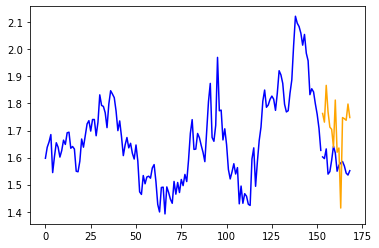

In [86]:
plt.plot(y_train_org, color='blue')
plt.plot(y_test_org, color='blue')
index = pd.Index(range(153,169))
plt.plot(pd.DataFrame(xgb_pred).set_index(index), color='orange')

I finalment tenim la gràfica del XGBoost. El punt inicial és el més acurat dels mètodes generals i la mitjana de valors és més propera a la real, però hi ha molta variància que les dades reals no tenen.

### Mètriques d'avaluació

Un cop presentats els models procedim a evaluar com de bons són i quin és el millor. Les mètriques que s'usaran per evaluar són les següents:
 - **Mean Squared Error (MSE)**: té en compte tant la variància com el biaix.
 - **Mean Absolute Error (MAE)**: usada freqüentment per mesurar l'error a les prediccions de sèries temporals.
 - **Root Mean Squared Error (RMSE)**: la més usada per mesurar les diferències entre les prediccions i els valors reals, ja que és molt sensible a valors erronis.
 - **R Squared (R2)**: valor més informatiu que els anteriors ja que pot assimilar-se a un percentatge (ja que habitualment va entre 0 i 1).

Els resultats sortiran d'una cross-validation K-Fold amb 5 folds. Es mesurarà cada mètrica en cadascun dels folds i es farà la mitjana. La comparació final serà una gran taula amb tots els models i els valors obtinguts en cada mètrica amb la cross-validació.

## Cross-validació

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Inicialitzacions per les cross-validacions

mse = dict()
mae = dict()
rmse = dict()
r2 = dict()
models = ['PyAF','AutoARIMA','Prophet','Linear','RandomForest','XGBoost']
for m in models:
    mse[m] = dict()
    mse[m]['org'] = []
    mse[m]['con'] = []
    mae[m] = dict()
    mae[m]['org'] = []
    mae[m]['con'] = []
    rmse[m] = dict()
    rmse[m]['org'] = []
    rmse[m]['con'] = []
    r2[m] = dict()
    r2[m]['org'] = []
    r2[m]['con'] = []
mse['CatBoost'] = []
mae['CatBoost'] = []
rmse['CatBoost'] = []
r2['CatBoost'] = []

In [69]:
# Cross-validació del model de PyAF

tscv = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tscv.split(data_std_org):
    
    # Definició de totes les particions necessàries per fer correr els models
    
    y_train_org = data_std_org.iloc[train_index]['AveragePrice']
    y_test_org  = data_std_org.iloc[test_index]['AveragePrice']

    y_train_con = data_std_con.iloc[train_index]['AveragePrice']
    y_test_con  = data_std_con.iloc[test_index]['AveragePrice']
    
    train_org = data_std_org.iloc[train_index]
    test_org  = data_std_org.iloc[test_index]

    train_con = data_std_con.iloc[train_index]
    test_con  = data_std_con.iloc[test_index]
    
    ## PyAF
    # Organic
    lEngine = autof.cForecastEngine()
    lEngine.train(train_org, 'Date' , 'AveragePrice', len(test_org))
    df_forecast = lEngine.forecast(iInputDS = train_org, iHorizon = len(test_org))
    pyaf_pred = df_forecast['AveragePrice_Forecast'].iloc[range(-len(test_org), 0)]
    
    mse['PyAF']['org'].append(mean_squared_error(pyaf_pred, y_test_org))
    mae['PyAF']['org'].append(mean_absolute_error(pyaf_pred, y_test_org))
    rmse['PyAF']['org'].append(mean_squared_error(pyaf_pred, y_test_org, squared=False))
    r2['PyAF']['org'].append(r2_score(pyaf_pred, y_test_org))
    
    # Conventional
    lEngine = autof.cForecastEngine()
    lEngine.train(train_con, 'Date' , 'AveragePrice', len(test_con))
    df_forecast = lEngine.forecast(iInputDS = train_con, iHorizon = len(test_con))
    pyaf_pred = df_forecast['AveragePrice_Forecast'].iloc[range(-len(test_con), 0)]
    
    mse['PyAF']['con'].append(mean_squared_error(pyaf_pred, y_test_con))
    mae['PyAF']['con'].append(mean_absolute_error(pyaf_pred, y_test_con))
    rmse['PyAF']['con'].append(mean_squared_error(pyaf_pred, y_test_con, squared=False))
    r2['PyAF']['con'].append(r2_score(pyaf_pred, y_test_con))

INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['AveragePrice'], 'Transformations': [('AveragePrice', 'None', '_', 'T+S+R'), ('AveragePrice', 'None', 'Diff_', 'T+S+R'), ('AveragePrice', 'None', 'RelDiff_', 'T+S+R'), ('AveragePrice', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 4.277, ('SIGNAL_TRAINING', {'Signals': ['AveragePrice'], 'Transformations': [('AveragePrice', 'None', '_', 'T+S+R'), ('AveragePrice', 'None', 'Diff_', 'T+S+R'), ('AveragePrice', 'None', 'RelDiff_', 'T+S+R'), ('AveragePrice', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['AveragePrice'], 'Transformations': [('AveragePrice', [('AveragePrice', 'None', 'CumSum_', 'T+S+R'), ('AveragePrice', 'None', 'Diff_', 'T+S+R'), ('AveragePrice', 'None', 'RelDiff_', 'T+S+R'), ('AveragePrice', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 

INFO:pyaf.timing:('OPERATION_END_ELAPSED', 4.999, ('SIGNAL_TRAINING', {'Signals': ['AveragePrice'], 'Transformations': [('AveragePrice', 'None', '_', 'T+S+R'), ('AveragePrice', 'None', 'Diff_', 'T+S+R'), ('AveragePrice', 'None', 'RelDiff_', 'T+S+R'), ('AveragePrice', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['AveragePrice'], 'Transformations': [('AveragePrice', [('AveragePrice', 'None', 'CumSum_', 'T+S+R'), ('AveragePrice', 'None', 'Diff_', 'T+S+R'), ('AveragePrice', 'None', 'RelDiff_', 'T+S+R'), ('AveragePrice', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 'AveragePrice', 'Transformations': [('AveragePrice', 'None', 'CumSum_', 'T+S+R'), ('AveragePrice', 'None', 'Diff_', 'T+S+R'), ('AveragePrice', 'None', 'RelDiff_', 'T+S+R'), ('AveragePrice', 'None', '_', 'T+S+R')]}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.008, ('MODEL_SELECTION', {'Signal': 'A

INFO:pyaf.timing:('OPERATION_START', ('FINALIZE_TRAINING', {'Signals': ['AveragePrice'], 'Transformations': [('AveragePrice', [('AveragePrice', 'None', 'CumSum_', 'T+S+R'), ('AveragePrice', 'None', 'Diff_', 'T+S+R'), ('AveragePrice', 'None', 'RelDiff_', 'T+S+R'), ('AveragePrice', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 'AveragePrice', 'Transformations': [('AveragePrice', 'None', 'CumSum_', 'T+S+R'), ('AveragePrice', 'None', 'Diff_', 'T+S+R'), ('AveragePrice', 'None', 'RelDiff_', 'T+S+R'), ('AveragePrice', 'None', '_', 'T+S+R')]}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.007, ('MODEL_SELECTION', {'Signal': 'AveragePrice', 'Transformations': [('AveragePrice', 'None', 'CumSum_', 'T+S+R'), ('AveragePrice', 'None', 'Diff_', 'T+S+R'), ('AveragePrice', 'None', 'RelDiff_', 'T+S+R'), ('AveragePrice', 'None', '_', 'T+S+R')]}))
INFO:pyaf.timing:('OPERATION_START', ('UPDATE_BEST_MODEL_PERFS', {'Signal': 'AveragePrice', 'Model

INFO:pyaf.timing:('OPERATION_START', ('MODEL_SELECTION', {'Signal': 'AveragePrice', 'Transformations': [('AveragePrice', 'None', 'CumSum_', 'T+S+R'), ('AveragePrice', 'None', 'Diff_', 'T+S+R'), ('AveragePrice', 'None', 'RelDiff_', 'T+S+R'), ('AveragePrice', 'None', '_', 'T+S+R')]}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.006, ('MODEL_SELECTION', {'Signal': 'AveragePrice', 'Transformations': [('AveragePrice', 'None', 'CumSum_', 'T+S+R'), ('AveragePrice', 'None', 'Diff_', 'T+S+R'), ('AveragePrice', 'None', 'RelDiff_', 'T+S+R'), ('AveragePrice', 'None', '_', 'T+S+R')]}))
INFO:pyaf.timing:('OPERATION_START', ('UPDATE_BEST_MODEL_PERFS', {'Signal': 'AveragePrice', 'Model': '_AveragePrice_Lag1Trend_residue_Seasonal_DayOfMonth_residue_NoAR'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.016, ('UPDATE_BEST_MODEL_PERFS', {'Signal': 'AveragePrice', 'Model': '_AveragePrice_Lag1Trend_residue_Seasonal_DayOfMonth_residue_NoAR'}))
INFO:pyaf.timing:('OPERATION_START', ('COMPUTE_PREDICTION_INTERV

In [70]:
# Cross-validació del model AutoARIMA

tscv = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tscv.split(data_std_org):
    
    # Definició de totes les particions necessàries per fer correr els models
    
    y_train_org = data_std_org.iloc[train_index]['AveragePrice']
    y_test_org  = data_std_org.iloc[test_index]['AveragePrice']

    y_train_con = data_std_con.iloc[train_index]['AveragePrice']
    y_test_con  = data_std_con.iloc[test_index]['AveragePrice']
    
    train_org = data_std_org.iloc[train_index]
    test_org  = data_std_org.iloc[test_index]

    train_con = data_std_con.iloc[train_index]
    test_con  = data_std_con.iloc[test_index]
    
    ## AutoARIMA
    season_length = 4
    horizon = len(test_org)
    models = [
        AutoARIMA(season_length=season_length),
        Naive()
    ]
    
    # Organic
    aux_org = pd.DataFrame()
    aux_org['y'] = train_org['AveragePrice']
    aux_org['ds'] = train_org['Date']
    aux_org['unique_id'] = 1
    model = StatsForecast(
        df=aux_org,
        models=models,
        freq='W',
        n_jobs=-1
    )
    y_pred = model.forecast(horizon).reset_index()
    stf_pred = y_pred['AutoARIMA']
    
    mse['AutoARIMA']['org'].append(mean_squared_error(stf_pred, y_test_org))
    mae['AutoARIMA']['org'].append(mean_absolute_error(stf_pred, y_test_org))
    rmse['AutoARIMA']['org'].append(mean_squared_error(stf_pred, y_test_org, squared=False))
    r2['AutoARIMA']['org'].append(r2_score(stf_pred, y_test_org))
    
    # Conventional
    aux_con = pd.DataFrame()
    aux_con['y'] = train_con['AveragePrice']
    aux_con['ds'] = train_con['Date']
    aux_con['unique_id'] = 1
    model = StatsForecast(
        df=aux_con,
        models=models,
        freq='W',
        n_jobs=-1
    )
    y_pred = model.forecast(horizon).reset_index()
    stf_pred = y_pred['AutoARIMA']
    
    mse['AutoARIMA']['con'].append(mean_squared_error(stf_pred, y_test_con))
    mae['AutoARIMA']['con'].append(mean_absolute_error(stf_pred, y_test_con))
    rmse['AutoARIMA']['con'].append(mean_squared_error(stf_pred, y_test_con, squared=False))
    r2['AutoARIMA']['con'].append(r2_score(stf_pred, y_test_con))

In [71]:
# Cross-validació del model Prophet

tscv = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tscv.split(data_std_org):
    
    # Definició de totes les particions necessàries per fer correr els models

    train_org = data_std_org.iloc[train_index]
    test_org  = data_std_org.iloc[test_index]

    train_con = data_std_con.iloc[train_index]
    test_con  = data_std_con.iloc[test_index]
    
    y_train_org = data_std_org.iloc[train_index]['AveragePrice']
    y_test_org  = data_std_org.iloc[test_index]['AveragePrice']

    y_train_con = data_std_con.iloc[train_index]['AveragePrice']
    y_test_con  = data_std_con.iloc[test_index]['AveragePrice']
    
    ## Prophet
    # Organic
    aux_org = pd.DataFrame()
    aux_org['y'] = train_org['AveragePrice']
    aux_org['ds'] = train_org['Date']
    m = Prophet()
    m.fit(aux_org)
    future = m.make_future_dataframe(periods=len(test_org), freq='W')
    fcst = m.predict(future)
    prt_pred = fcst['yhat'].iloc[range(-len(test_org), 0)]
    
    mse['Prophet']['org'].append(mean_squared_error(prt_pred, y_test_org))
    mae['Prophet']['org'].append(mean_absolute_error(prt_pred, y_test_org))
    rmse['Prophet']['org'].append(mean_squared_error(prt_pred, y_test_org, squared=False))
    r2['Prophet']['org'].append(r2_score(prt_pred, y_test_org))
    
    # Conventional
    aux_con = pd.DataFrame()
    aux_con['y'] = train_con['AveragePrice']
    aux_con['ds'] = train_con['Date']
    m = Prophet()
    m.fit(aux_con)
    future = m.make_future_dataframe(periods=len(test_con), freq='W')
    fcst = m.predict(future)
    prt_pred = fcst['yhat'].iloc[range(-len(test_con), 0)]
    
    mse['Prophet']['con'].append(mean_squared_error(prt_pred, y_test_con))
    mae['Prophet']['con'].append(mean_absolute_error(prt_pred, y_test_con))
    rmse['Prophet']['con'].append(mean_squared_error(prt_pred, y_test_con, squared=False))
    r2['Prophet']['con'].append(r2_score(prt_pred, y_test_con))

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: C:\Users\erics\AppData\Local\Temp\tmpinzzzcrr\kdqr7dq5.json
DEBUG:cmdstanpy:input tempfile: C:\Users\erics\AppData\Local\Temp\tmpinzzzcrr\5atn978v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\erics\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=26337', 'data', 'file=C:\\Users\\erics\\AppData\\Local\\Temp\\tmpinzzzcrr\\kdqr7dq5.json', 'init=C:\\Users\\erics\\AppData\\Local\

DEBUG:cmdstanpy:TBB already found in load path
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\erics\AppData\Local\Temp\tmpinzzzcrr\yrlo4eki.json
DEBUG:cmdstanpy:input tempfile: C:\Users\erics\AppData\Local\Temp\tmpinzzzcrr\lpe8x5lf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\erics\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=70644', 'data', 'file=C:\\Users\\erics\\AppData\\Local\\Temp\\tmpinzzzcrr\\yrlo4eki.json', 'init=C:\\Users\\erics\\AppData\\Local\\Temp\\tmpinzzzcrr\\lpe8x5lf.json', 'output', 'file=C:\\Users\\erics\\AppData\\Local\\Temp\\tmpinzzzcrr\\prophet_modelisww6a45\\prophet_model-20221216211430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:14:30 - 

In [72]:
# Cross-validació del model lineal

tscv = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tscv.split(data_std_org):
    
    # Definició de totes les particions necessàries per fer correr els models

    y_train_org = data_std_org.iloc[train_index]['AveragePrice']
    y_test_org  = data_std_org.iloc[test_index]['AveragePrice']

    y_train_con = data_std_con.iloc[train_index]['AveragePrice']
    y_test_con  = data_std_con.iloc[test_index]['AveragePrice']

    x_std_train_org = x_std_org.iloc[train_index]
    x_std_test_org  = x_std_org.iloc[test_index]

    x_std_train_con = x_std_con.iloc[train_index]
    x_std_test_con  = x_std_con.iloc[test_index]
    
    ## Linear Regression
    # Organic
    reg = LinearRegression().fit(x_std_train_org,y_train_org)
    lin_pred = reg.predict(x_std_test_org)
    
    mse['Linear']['org'].append(mean_squared_error(lin_pred, y_test_org))
    mae['Linear']['org'].append(mean_absolute_error(lin_pred, y_test_org))
    rmse['Linear']['org'].append(mean_squared_error(lin_pred, y_test_org, squared=False))
    r2['Linear']['org'].append(r2_score(lin_pred, y_test_org))
    
    # Conventional
    reg = LinearRegression().fit(x_std_train_con,y_train_con)
    lin_pred = reg.predict(x_std_test_con)
    
    mse['Linear']['con'].append(mean_squared_error(lin_pred, y_test_con))
    mae['Linear']['con'].append(mean_absolute_error(lin_pred, y_test_con))
    rmse['Linear']['con'].append(mean_squared_error(lin_pred, y_test_con, squared=False))
    r2['Linear']['con'].append(r2_score(lin_pred, y_test_con))

In [73]:
# Cross-validació del model Random Forest

tscv = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tscv.split(data_std_org):
    
    # Definició de totes les particions necessàries per fer correr els models

    y_train_org = data_std_org.iloc[train_index]['AveragePrice']
    y_test_org  = data_std_org.iloc[test_index]['AveragePrice']

    y_train_con = data_std_con.iloc[train_index]['AveragePrice']
    y_test_con  = data_std_con.iloc[test_index]['AveragePrice']

    x_std_train_org = x_std_org.iloc[train_index]
    x_std_test_org  = x_std_org.iloc[test_index]

    x_std_train_con = x_std_con.iloc[train_index]
    x_std_test_con  = x_std_con.iloc[test_index]
    
    ## Random Forest
    regr = RandomForestRegressor(random_state=0, bootstrap=True, n_estimators=400, 
                                 max_depth=100, max_features='sqrt', min_samples_leaf=4, 
                                 min_samples_split=2)

    # Organic
    regr.fit(x_std_train_org, y_train_org)
    rf_pred = regr.predict(x_std_test_org)
    
    mse['RandomForest']['org'].append(mean_squared_error(rf_pred, y_test_org))
    mae['RandomForest']['org'].append(mean_absolute_error(rf_pred, y_test_org))
    rmse['RandomForest']['org'].append(mean_squared_error(rf_pred, y_test_org, squared=False))
    r2['RandomForest']['org'].append(r2_score(rf_pred, y_test_org))
    
    # Conventional
    regr.fit(x_std_train_con, y_train_con)
    rf_pred = regr.predict(x_std_test_con)
    
    mse['RandomForest']['con'].append(mean_squared_error(rf_pred, y_test_con))
    mae['RandomForest']['con'].append(mean_absolute_error(rf_pred, y_test_con))
    rmse['RandomForest']['con'].append(mean_squared_error(rf_pred, y_test_con, squared=False))
    r2['RandomForest']['con'].append(r2_score(rf_pred, y_test_con))

In [74]:
# Cross-validació del model CatBoost

tscv = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tscv.split(data_clean):
    
    # Definició de totes les particions necessàries per fer correr els models

    x_train_cat = data_clean.iloc[train_index].drop(['AveragePrice','Date'],axis=1)
    x_test_cat  = data_clean.iloc[test_index].drop(['AveragePrice','Date'],axis=1)

    y_train_cat = data_clean.iloc[train_index]['AveragePrice']
    y_test_cat  = data_clean.iloc[test_index]['AveragePrice']
    
    ## CatBoost
    cb_model = cb.CatBoostRegressor(loss_function='RMSE', depth=4,
                                    l2_leaf_reg=1, iterations=200,
                                    learning_rate=0.1)
    categorical_features_indices = np.where(x_train_cat.dtypes != np.float)[0]
    cb_train = cb.Pool(x_train_cat, y_train_cat, cat_features=categorical_features_indices) 
    cb_test = cb.Pool(x_test_cat, y_test_cat, cat_features=categorical_features_indices)
    cb_model.fit(cb_train)
    cb_pred = cb_model.predict(cb_test)
    
    mse['CatBoost'].append(mean_squared_error(cb_pred, y_test_cat))
    mae['CatBoost'].append(mean_absolute_error(cb_pred, y_test_cat))
    rmse['CatBoost'].append(mean_squared_error(cb_pred, y_test_cat, squared=False))
    r2['CatBoost'].append(r2_score(cb_pred, y_test_cat))

C:\Users\erics\AppData\Local\Temp/ipykernel_8376/3968198699.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(x_train_cat.dtypes != np.float)[0]


0:	learn: 0.3375356	total: 10.1ms	remaining: 2.02s
1:	learn: 0.3173270	total: 19.7ms	remaining: 1.95s
2:	learn: 0.3011414	total: 28.9ms	remaining: 1.9s
3:	learn: 0.2860374	total: 40.5ms	remaining: 1.98s
4:	learn: 0.2717720	total: 51.8ms	remaining: 2.02s
5:	learn: 0.2589346	total: 63.5ms	remaining: 2.05s
6:	learn: 0.2494324	total: 75ms	remaining: 2.07s
7:	learn: 0.2395440	total: 86.1ms	remaining: 2.06s
8:	learn: 0.2305915	total: 97.6ms	remaining: 2.07s
9:	learn: 0.2239046	total: 109ms	remaining: 2.08s
10:	learn: 0.2171823	total: 121ms	remaining: 2.08s
11:	learn: 0.2104763	total: 133ms	remaining: 2.08s
12:	learn: 0.2048481	total: 145ms	remaining: 2.08s
13:	learn: 0.1991990	total: 157ms	remaining: 2.09s
14:	learn: 0.1941623	total: 168ms	remaining: 2.08s
15:	learn: 0.1901430	total: 182ms	remaining: 2.1s
16:	learn: 0.1856965	total: 196ms	remaining: 2.11s
17:	learn: 0.1821385	total: 212ms	remaining: 2.14s
18:	learn: 0.1785014	total: 225ms	remaining: 2.14s
19:	learn: 0.1757429	total: 236ms	re

160:	learn: 0.1138049	total: 2.01s	remaining: 486ms
161:	learn: 0.1135784	total: 2.02s	remaining: 474ms
162:	learn: 0.1134495	total: 2.03s	remaining: 461ms
163:	learn: 0.1133196	total: 2.04s	remaining: 448ms
164:	learn: 0.1130056	total: 2.05s	remaining: 436ms
165:	learn: 0.1127062	total: 2.06s	remaining: 423ms
166:	learn: 0.1126303	total: 2.08s	remaining: 411ms
167:	learn: 0.1125116	total: 2.09s	remaining: 398ms
168:	learn: 0.1123026	total: 2.1s	remaining: 386ms
169:	learn: 0.1122452	total: 2.11s	remaining: 373ms
170:	learn: 0.1120298	total: 2.12s	remaining: 360ms
171:	learn: 0.1118959	total: 2.14s	remaining: 348ms
172:	learn: 0.1117889	total: 2.15s	remaining: 335ms
173:	learn: 0.1114334	total: 2.16s	remaining: 322ms
174:	learn: 0.1113545	total: 2.17s	remaining: 310ms
175:	learn: 0.1110335	total: 2.18s	remaining: 297ms
176:	learn: 0.1109305	total: 2.19s	remaining: 285ms
177:	learn: 0.1107558	total: 2.2s	remaining: 272ms
178:	learn: 0.1106389	total: 2.22s	remaining: 260ms
179:	learn: 0.

C:\Users\erics\AppData\Local\Temp/ipykernel_8376/3968198699.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(x_train_cat.dtypes != np.float)[0]


8:	learn: 0.2447086	total: 106ms	remaining: 2.25s
9:	learn: 0.2369428	total: 119ms	remaining: 2.26s
10:	learn: 0.2307363	total: 132ms	remaining: 2.26s
11:	learn: 0.2257975	total: 143ms	remaining: 2.24s
12:	learn: 0.2211706	total: 155ms	remaining: 2.23s
13:	learn: 0.2169514	total: 167ms	remaining: 2.22s
14:	learn: 0.2133411	total: 182ms	remaining: 2.25s
15:	learn: 0.2088620	total: 194ms	remaining: 2.23s
16:	learn: 0.2048862	total: 206ms	remaining: 2.22s
17:	learn: 0.2018461	total: 218ms	remaining: 2.21s
18:	learn: 0.1986025	total: 230ms	remaining: 2.19s
19:	learn: 0.1964919	total: 242ms	remaining: 2.17s
20:	learn: 0.1943211	total: 254ms	remaining: 2.16s
21:	learn: 0.1921549	total: 265ms	remaining: 2.15s
22:	learn: 0.1905015	total: 277ms	remaining: 2.13s
23:	learn: 0.1885293	total: 289ms	remaining: 2.12s
24:	learn: 0.1870460	total: 303ms	remaining: 2.12s
25:	learn: 0.1860998	total: 315ms	remaining: 2.11s
26:	learn: 0.1850176	total: 327ms	remaining: 2.1s
27:	learn: 0.1839172	total: 339ms	

176:	learn: 0.1319163	total: 2.31s	remaining: 300ms
177:	learn: 0.1318285	total: 2.33s	remaining: 288ms
178:	learn: 0.1317242	total: 2.34s	remaining: 275ms
179:	learn: 0.1316253	total: 2.35s	remaining: 261ms
180:	learn: 0.1316183	total: 2.36s	remaining: 248ms
181:	learn: 0.1315122	total: 2.38s	remaining: 235ms
182:	learn: 0.1314622	total: 2.39s	remaining: 222ms
183:	learn: 0.1311822	total: 2.4s	remaining: 209ms
184:	learn: 0.1309545	total: 2.41s	remaining: 196ms
185:	learn: 0.1308718	total: 2.42s	remaining: 183ms
186:	learn: 0.1306024	total: 2.44s	remaining: 170ms
187:	learn: 0.1304577	total: 2.45s	remaining: 156ms
188:	learn: 0.1303391	total: 2.46s	remaining: 144ms
189:	learn: 0.1302500	total: 2.48s	remaining: 130ms
190:	learn: 0.1301353	total: 2.49s	remaining: 117ms
191:	learn: 0.1299759	total: 2.51s	remaining: 105ms
192:	learn: 0.1298590	total: 2.52s	remaining: 91.6ms
193:	learn: 0.1295793	total: 2.54s	remaining: 78.5ms
194:	learn: 0.1293422	total: 2.55s	remaining: 65.4ms
195:	learn

C:\Users\erics\AppData\Local\Temp/ipykernel_8376/3968198699.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(x_train_cat.dtypes != np.float)[0]


2:	learn: 0.3233284	total: 38.3ms	remaining: 2.52s
3:	learn: 0.3088285	total: 49.3ms	remaining: 2.42s
4:	learn: 0.2958685	total: 62.2ms	remaining: 2.43s
5:	learn: 0.2847167	total: 74.6ms	remaining: 2.41s
6:	learn: 0.2735353	total: 89ms	remaining: 2.45s
7:	learn: 0.2623902	total: 103ms	remaining: 2.47s
8:	learn: 0.2529732	total: 117ms	remaining: 2.49s
9:	learn: 0.2449281	total: 129ms	remaining: 2.46s
10:	learn: 0.2381275	total: 143ms	remaining: 2.45s
11:	learn: 0.2323885	total: 156ms	remaining: 2.44s
12:	learn: 0.2277839	total: 171ms	remaining: 2.46s
13:	learn: 0.2232763	total: 185ms	remaining: 2.45s
14:	learn: 0.2197564	total: 198ms	remaining: 2.45s
15:	learn: 0.2159605	total: 211ms	remaining: 2.43s
16:	learn: 0.2127610	total: 224ms	remaining: 2.41s
17:	learn: 0.2104636	total: 238ms	remaining: 2.4s
18:	learn: 0.2086827	total: 251ms	remaining: 2.39s
19:	learn: 0.2067843	total: 263ms	remaining: 2.37s
20:	learn: 0.2051448	total: 276ms	remaining: 2.35s
21:	learn: 0.2037344	total: 288ms	rem

168:	learn: 0.1487790	total: 2.24s	remaining: 410ms
169:	learn: 0.1485693	total: 2.25s	remaining: 397ms
170:	learn: 0.1483584	total: 2.26s	remaining: 384ms
171:	learn: 0.1482688	total: 2.28s	remaining: 371ms
172:	learn: 0.1480533	total: 2.29s	remaining: 358ms
173:	learn: 0.1480175	total: 2.3s	remaining: 344ms
174:	learn: 0.1479254	total: 2.32s	remaining: 331ms
175:	learn: 0.1477911	total: 2.33s	remaining: 318ms
176:	learn: 0.1476500	total: 2.34s	remaining: 304ms
177:	learn: 0.1473838	total: 2.35s	remaining: 291ms
178:	learn: 0.1472640	total: 2.37s	remaining: 278ms
179:	learn: 0.1471004	total: 2.38s	remaining: 265ms
180:	learn: 0.1468621	total: 2.4s	remaining: 252ms
181:	learn: 0.1467724	total: 2.41s	remaining: 238ms
182:	learn: 0.1466544	total: 2.42s	remaining: 225ms
183:	learn: 0.1465434	total: 2.44s	remaining: 212ms
184:	learn: 0.1462941	total: 2.45s	remaining: 199ms
185:	learn: 0.1461294	total: 2.46s	remaining: 186ms
186:	learn: 0.1460006	total: 2.48s	remaining: 172ms
187:	learn: 0.

C:\Users\erics\AppData\Local\Temp/ipykernel_8376/3968198699.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(x_train_cat.dtypes != np.float)[0]


10:	learn: 0.2581389	total: 148ms	remaining: 2.54s
11:	learn: 0.2524982	total: 163ms	remaining: 2.55s
12:	learn: 0.2477273	total: 179ms	remaining: 2.57s
13:	learn: 0.2440979	total: 193ms	remaining: 2.57s
14:	learn: 0.2407046	total: 207ms	remaining: 2.56s
15:	learn: 0.2377618	total: 221ms	remaining: 2.55s
16:	learn: 0.2350921	total: 238ms	remaining: 2.56s
17:	learn: 0.2328740	total: 253ms	remaining: 2.55s
18:	learn: 0.2309648	total: 270ms	remaining: 2.57s
19:	learn: 0.2295317	total: 287ms	remaining: 2.58s
20:	learn: 0.2278944	total: 305ms	remaining: 2.6s
21:	learn: 0.2265980	total: 319ms	remaining: 2.58s
22:	learn: 0.2252920	total: 332ms	remaining: 2.56s
23:	learn: 0.2238509	total: 348ms	remaining: 2.55s
24:	learn: 0.2218366	total: 362ms	remaining: 2.53s
25:	learn: 0.2205505	total: 375ms	remaining: 2.51s
26:	learn: 0.2194707	total: 389ms	remaining: 2.49s
27:	learn: 0.2185395	total: 402ms	remaining: 2.47s
28:	learn: 0.2174812	total: 415ms	remaining: 2.45s
29:	learn: 0.2165622	total: 428m

170:	learn: 0.1761289	total: 2.35s	remaining: 399ms
171:	learn: 0.1758556	total: 2.37s	remaining: 386ms
172:	learn: 0.1757606	total: 2.38s	remaining: 372ms
173:	learn: 0.1754621	total: 2.4s	remaining: 358ms
174:	learn: 0.1752694	total: 2.41s	remaining: 344ms
175:	learn: 0.1749544	total: 2.42s	remaining: 331ms
176:	learn: 0.1748687	total: 2.44s	remaining: 317ms
177:	learn: 0.1747075	total: 2.45s	remaining: 303ms
178:	learn: 0.1744537	total: 2.46s	remaining: 289ms
179:	learn: 0.1743421	total: 2.48s	remaining: 275ms
180:	learn: 0.1741715	total: 2.49s	remaining: 261ms
181:	learn: 0.1740865	total: 2.5s	remaining: 247ms
182:	learn: 0.1739928	total: 2.51s	remaining: 234ms
183:	learn: 0.1738715	total: 2.53s	remaining: 220ms
184:	learn: 0.1737804	total: 2.54s	remaining: 206ms
185:	learn: 0.1736473	total: 2.56s	remaining: 192ms
186:	learn: 0.1734895	total: 2.57s	remaining: 179ms
187:	learn: 0.1734238	total: 2.58s	remaining: 165ms
188:	learn: 0.1731734	total: 2.59s	remaining: 151ms
189:	learn: 0.

C:\Users\erics\AppData\Local\Temp/ipykernel_8376/3968198699.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(x_train_cat.dtypes != np.float)[0]


9:	learn: 0.2980194	total: 143ms	remaining: 2.71s
10:	learn: 0.2926332	total: 159ms	remaining: 2.73s
11:	learn: 0.2879739	total: 177ms	remaining: 2.77s
12:	learn: 0.2839097	total: 194ms	remaining: 2.79s
13:	learn: 0.2803158	total: 210ms	remaining: 2.78s
14:	learn: 0.2771215	total: 224ms	remaining: 2.77s
15:	learn: 0.2745408	total: 239ms	remaining: 2.75s
16:	learn: 0.2720036	total: 253ms	remaining: 2.73s
17:	learn: 0.2701478	total: 267ms	remaining: 2.69s
18:	learn: 0.2686794	total: 281ms	remaining: 2.67s
19:	learn: 0.2669416	total: 295ms	remaining: 2.65s
20:	learn: 0.2653782	total: 310ms	remaining: 2.64s
21:	learn: 0.2639815	total: 327ms	remaining: 2.64s
22:	learn: 0.2623496	total: 343ms	remaining: 2.64s
23:	learn: 0.2613341	total: 357ms	remaining: 2.62s
24:	learn: 0.2603709	total: 371ms	remaining: 2.6s
25:	learn: 0.2594211	total: 386ms	remaining: 2.59s
26:	learn: 0.2587075	total: 400ms	remaining: 2.56s
27:	learn: 0.2577856	total: 414ms	remaining: 2.54s
28:	learn: 0.2572091	total: 428ms

169:	learn: 0.2169238	total: 2.55s	remaining: 451ms
170:	learn: 0.2167704	total: 2.57s	remaining: 436ms
171:	learn: 0.2165525	total: 2.58s	remaining: 420ms
172:	learn: 0.2162751	total: 2.6s	remaining: 405ms
173:	learn: 0.2160464	total: 2.61s	remaining: 390ms
174:	learn: 0.2157527	total: 2.63s	remaining: 375ms
175:	learn: 0.2155681	total: 2.64s	remaining: 360ms
176:	learn: 0.2154741	total: 2.66s	remaining: 345ms
177:	learn: 0.2151345	total: 2.67s	remaining: 330ms
178:	learn: 0.2149392	total: 2.69s	remaining: 316ms
179:	learn: 0.2147388	total: 2.71s	remaining: 301ms
180:	learn: 0.2145955	total: 2.72s	remaining: 286ms
181:	learn: 0.2144514	total: 2.74s	remaining: 271ms
182:	learn: 0.2142535	total: 2.76s	remaining: 256ms
183:	learn: 0.2139527	total: 2.77s	remaining: 241ms
184:	learn: 0.2139049	total: 2.79s	remaining: 226ms
185:	learn: 0.2136751	total: 2.8s	remaining: 211ms
186:	learn: 0.2133264	total: 2.81s	remaining: 196ms
187:	learn: 0.2131869	total: 2.83s	remaining: 180ms
188:	learn: 0.

In [88]:
# Cross-validació del model XGBoost

tscv = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tscv.split(data_std_org):
    
    # Definició de totes les particions necessàries per fer correr els models

    y_train_org = data_std_org.iloc[train_index]['AveragePrice']
    y_test_org  = data_std_org.iloc[test_index]['AveragePrice']

    y_train_con = data_std_con.iloc[train_index]['AveragePrice']
    y_test_con  = data_std_con.iloc[test_index]['AveragePrice']

    x_std_train_org = x_std_org.iloc[train_index]
    x_std_test_org  = x_std_org.iloc[test_index]

    x_std_train_con = x_std_con.iloc[train_index]
    x_std_test_con  = x_std_con.iloc[test_index]
    
    ## XGBoost
    xgb = XGBRegressor(eta=0.4501368016492837,
                       eval_metric='rmse',
                       learning_rate=0.05,
                       max_depth=6,
                       n_estimators=130,
                       objective='reg:squarederror',
                       tree_method='auto'
    )
    # Organic
    xgb.fit(x_std_train_org, y_train_org)
    xgb_pred = xgb.predict(x_std_test_org)
    
    mse['XGBoost']['org'].append(mean_squared_error(xgb_pred, y_test_org))
    mae['XGBoost']['org'].append(mean_absolute_error(xgb_pred, y_test_org))
    rmse['XGBoost']['org'].append(mean_squared_error(xgb_pred, y_test_org, squared=False))
    r2['XGBoost']['org'].append(r2_score(xgb_pred, y_test_org))
    
    # Conventional
    xgb.fit(x_std_train_con, y_train_con)
    xgb_pred = xgb.predict(x_std_test_con)
    
    mse['XGBoost']['con'].append(mean_squared_error(xgb_pred, y_test_con))
    mae['XGBoost']['con'].append(mean_absolute_error(xgb_pred, y_test_con))
    rmse['XGBoost']['con'].append(mean_squared_error(xgb_pred, y_test_con, squared=False))
    r2['XGBoost']['con'].append(r2_score(xgb_pred, y_test_con))

C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\erics\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

In [89]:
# Imprimim els valors per als alvocats orgànics

models = ['PyAF','AutoARIMA','Prophet','Linear','RandomForest','XGBoost']
print("     Valor de les mètriques a cada model (org)")
print("-------------------------------------------------------")
print("   Model    |   MSE    |    MAE    |   RMSE   |   R2")
print("-------------------------------------------------------")
for m in models:
    print(m," \t", np.round(np.mean(mse[m]['org']),3),"    ", np.round(np.mean(mae[m]['org']),3),"     ",
          np.round(np.mean(rmse[m]['org']),3),"\t", np.round(np.mean(r2[m]['org']),3))
    print("-------------------------------------------------------")
print('CatBoost'," \t", np.round(np.mean(mse['CatBoost']),3),"    ", np.round(np.mean(mae['CatBoost']),3),"     ",
          np.round(np.mean(rmse['CatBoost']),3),"\t", np.round(np.mean(r2['CatBoost']),3))

     Valor de les mètriques a cada model (org)
-------------------------------------------------------
   Model    |   MSE    |    MAE    |   RMSE   |   R2
-------------------------------------------------------
PyAF  	 0.064      0.194       0.219 	 -150.258
-------------------------------------------------------
AutoARIMA  	 0.081      0.212       0.238 	 -102600772673.824
-------------------------------------------------------
Prophet  	 0.071      0.221       0.266 	 -11.362
-------------------------------------------------------
Linear  	 0.07      0.198       0.228 	 -2.775
-------------------------------------------------------
RandomForest  	 0.033      0.146       0.165 	 -32.678
-------------------------------------------------------
XGBoost  	 0.045      0.157       0.184 	 -5.747
-------------------------------------------------------
CatBoost  	 0.083      0.211       0.279 	 0.214


In [90]:
# Imprimim els valors per als alovats convencionals

models = ['PyAF','AutoARIMA','Prophet','Linear','RandomForest','XGBoost']
print("     Valor de les mètriques a cada model (con)")
print("-------------------------------------------------------")
print("   Model    |   MSE    |    MAE    |   RMSE   |   R2")
print("-------------------------------------------------------")
for m in models:
    print(m," \t", np.round(np.mean(mse[m]['con']),3),"    ", np.round(np.mean(mae[m]['con']),3),"     ",
          np.round(np.mean(rmse[m]['con']),3),"\t", np.round(np.mean(r2[m]['con']),3))
    print("-------------------------------------------------------")
print('CatBoost'," \t", np.round(np.mean(mse['CatBoost']),3),"    ", np.round(np.mean(mae['CatBoost']),3),"     ",
          np.round(np.mean(rmse['CatBoost']),3),"\t", np.round(np.mean(r2['CatBoost']),3))

     Valor de les mètriques a cada model (con)
-------------------------------------------------------
   Model    |   MSE    |    MAE    |   RMSE   |   R2
-------------------------------------------------------
PyAF  	 0.081      0.202       0.24 	 -19.707
-------------------------------------------------------
AutoARIMA  	 0.219      0.339       0.37 	 -3340522004497.976
-------------------------------------------------------
Prophet  	 0.039      0.155       0.187 	 -31.622
-------------------------------------------------------
Linear  	 0.025      0.12       0.152 	 -7.574
-------------------------------------------------------
RandomForest  	 0.021      0.114       0.137 	 -41.475
-------------------------------------------------------
XGBoost  	 0.031      0.141       0.164 	 -17.304
-------------------------------------------------------
CatBoost  	 0.083      0.211       0.279 	 0.214


![Taula](taulacv.png "Taula de mètriques")

Observant la taula podem veure que d'acord amb 3 de les 4 mètriques, el model de Random Forest és el més precís, seguit d'aprop dels dos models de gradient boosting. Aquest és un resultat certament curiós, ja que aquests dos estan formats per un ensemble de random trees, cosa que els hauria de fer millors per definició. És possible que l'optimització d'hiperparàmetres amb el Random Forest hagi sigut millor que amb els XGBoost i CatBoost, tot i que s'ha usat el mateix procediment (tècnicament amb el CatBoost s'ha usat una grid search, que hauria de garantir el màxim de les opcions donades).<br>

Un altre fenòmen molt notable és el valor del R2 score. Els resultats mesurats amb aquesta mètrica són terribles, no només són negatius, el que ens indica que el model no està seguint la tendència de la variable a predir, sinó que tenen un valor molt gran, desde 2 fins a 150, sense comptar el ridícul valor de l'AutoARIMA de l'ordre dels bilions (hi deu fallar alguna cosa a l'hora de fer el càlcul però no he sapigut trobar el què).<br>

Sobre els valors en general s'observa que són força baixos, el que ens indica que ho estem fent bé. Però això pot tenir truc, ja que la variable objectiu no s'ha normalitzat, per tant l'ordre de magnitud dels resultats tampoc ho està de normalitzada. Sobre aquesta puntualització; el rang de valors de la variable objectiu era aproximadament [0.5, 3.5], que tampoc és d'un ordre de magnitud molt distant al d'una normal estandaritzada. Per tant els errors semblen correctes, fins que veiem la columna del R2 score. Sincerament em sobta molt que només hi hagi un valor raonable quan tots han seguit el mateix procés de càlcul.<br>

En resum els resultats són sorprenents.

Com podríem millorar els resultats?

El primer pas seria millorar la feature engineering. Tenint en compte que em fet servir models no temporals, la variable ``Date`` no ha servit de res per aquests, quan aquesta variable és potser la més important de totes. Per tant un fet molt important seria crear variables com les següents:
 - Preu la setmana anterior
 - Preu l'any anterior
 - Variable categòrica del mes de l'any
 
Aquesta és una manera d'integrar comportaments temporals a mètodes que no tenen en compte la variable del temps.

El segon pas seria buscar millors models temporals. Els que s'han provat han donat resultats molt pobres, com línies horitzontals (prediccions planes). Aquesta és la pitjor predicció que un model temporal pot donar. He de dir que durant l'entrenament dels models, el de la llibreria PyAF va donar un resultat no pla un cop, amb una predicció amb molt de sentit, però mai més l'ha tornat a donar i no sé ben bé el motiu. El més probable és que aquest motiu desconegut sigui el mateix que estigui afectant les prediccions del model AutoARIMA, però he sigut incapaç de reproduir la bona predicció, totes les dades semblen en ordre. Aquests models temporals també podrien usar la resta de variables del dataset a més del temps, que segur que ajuden a millorar les prediccions, ja que en un mercat no només importen les tendències cícliques, sinó l'oferta i la demanda, representades com el nombre d'alvocats venuts.

Un tercer pas seria afegir models d'aprenentatge profund. He provat algunes xarxes neuronals sense èxit, però el temps se m'ha posat en contra i he descartat aquesta opció.

En definitiva, aquest projecte té molt potencial per explotar, però el tipus de dataset (sèrie temporal, és el primer cop que treballo amb un així i he hagut de cercar molt per internet perquè no disposava d'informació al caronte) i el temps han decidit que quedi així. Estic molt satisfet amb la feina feta tot i que el resultat dels models pot ser una mica decebedor. Si pogués tornar a començar li dedicaria més temps, hauria començat abans a treballar-hi, poder l'he subestimat.